# Prediction of Approval Time of Patents  

## Table of Contents
* [1. Input Data ](#Input_Data)
    * [1.1. Source of Data ](#Data_Source)
    * [1.2. Data Dictionary](#Data_Dictionary)
    * [1.3. Objectives](#Obj)
    * [1.4. Hypothesis](#Hypothesis)
    * [1.5. Approach](#Approach)
       
       
* [2. Import Libararies](#Libs) 


* [3. General Function](#Funcs) 


* [4. Import Data](#Data) 


* [5. Data Cleaning](#Data_cleaning) 
    * [5.1. Data Cleaning, Series I](#Data_cleaningI) 
    * [5.2. Data Cleaning, Series II](#Data_cleaningII) 
    * [5.3. Data Cleaning, Series III](#Data_cleaningIII) 
    * [5.4. Merge Cleaned Data](#Merge_Data) 
    * [5.5. Impute Missing Values](#Impute)
    * [5.6. Remove Outliers](#Outliers)
   
   
* [6. Exploratory Data Analysis](#EDA) 
    * [6.1. Scatter and Box Plot](#Scatter_Box)
    * [6.2. Count Plot](#Count)
    * [6.3. Correlation](#Corr)
    
    
* [7. Feature Eningeering ](#Feng) 
    * [7.1. Multicolinearity](#Mcol)
    * [7.2. Hotencoding Categorical Features](#Enc)
    * [7.3. Scaling Numerical Fetaures](#Scale)
    
       
* [8. Modeling](#Modeling)
    * [8.1. Splitting Dataset, Train/Test Set](#Split)
    * [8.2. Linear regression](#Linear)
        * [8.2.1. Ordinary Least Squares Linear Regression](#OLS)
        * [8.2.2. Ridge Linear Regression](#Ridge)
        * [8.2.3. Lasso Linear Regression](#Lasso)
        * [8.2.4. Elastic Net Regression](#Elastic)
    * [8.3. Random Forest Regression](#RFC)
    * [8.4. XGBoost](#XGB)
    * [8.5. Optimum model](#optimum)
        * [8.5.1. GridSearch](#Gridsearch)
        * [8.5.2. Optimized XGBoost](#Optimumxgb)
        * [8.5.3. Feature Importance](#Feature_Imp)
        * [8.5.4. Save Model](#Save_Model)
        
    

# 1. Input Data <a class="anchor" id="Input_Data"></a>

## 1.1. Source of Data <a class="anchor" id="Data_Source"></a>

Source of the data is  PatentsView.org [https://patentsview.org]. The were collected through API for years 2010-2022, 1000 patents /year. 

## 1.2. Data Dictionary<a class="anchor" id="Data_Dictionary"></a>

**patent_id** : Unique ID of patent 

**patent_type**: There are three types of patents: Utility, Plant, and Design

**patent_year**: Year patent was granted

**patent_abstract**: Abstract of the patent

**patent_detail_desc_length** Length of patent description

**patent_num_total_documents_cited**

**patent_num_us_applications_cited**

**patent_num_us_patents_cited**

**patent_num_foreign_documents_cite**

**patent_processing_days** Days from filing application date to grant date for the patent

**gov_interest_organizations.level_one**:  The top-level U.S. government organization name related to the organization reported in the government interest statement on patents (if available).   ## it is possible it is NAN for most patents##


**patent_uspc_current_mainclass_average_patent_processing_days**   remove because for 2018 all are NAN

**application.filing_date**: Date the patent application was filed (filing date) at the USPTO

**application.application_type**: Patent Application Series Code: 01-17 = Utility application; 29 = Design application; 35 = International Design applications; 60-62 = Provisional application; 90 = Ex parte Reexamination request; 95 = Inter Partes Reexamination request; 96 = Supplemental Examination


**applicants.applicant_type**

**applicants.applicant_organization**

**assignees.assignee_state**: Assignee's state as listed on the patent 

**assignees.assignee_country**: Assignee's country as listed on the patent

**assignees.assignee_type**: Classification of assignee : 2 - US Company or Corporation, 3 - Foreign Company or Corporation, 4 - US Individual, 5 - Foreign Individual, 6 - US Government, 7 - Foreign Government, 8 - Country Government, 9 - State Government (US). Note: A "1" appearing before any of these codes signifies part interest

**attorneys.attorney_organization**

**cpc_at_issue.cpc_class_id** or **cpc_current.cpc_class_id**  A: HUMAN NECESSITIES, B: PERFORMING OPERATIONS; TRANSPORTING, c: CHEMISTRY; METALLURGY, D: TEXTILES; PAPER, E: FIXED CONSTRUCTIONS, F: MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING, G: PHYSICS   ##I suggest consider the sequence 0 only(cpc_sequence': 0##
(https://www.cooperativepatentclassification.org/cpcSchemeAndDefinitions/table)
 
**figures.num_figures**

**inventors.inventor_id**: Unique PatentsView database inventor ID by disambiguation algorithm

**inventors.inventor_country**: Inventor Country At Issue

**inventors.inventor_state**: Inventor state At Issue

**inventors.inventor_sequence** : Order in which inventor is listed on the patent

**ipcr.ipc_section**Highest hierarchical levels of the IPC corresponding to broad technical fields, called "Sections":   
A: HUMAN NECESSITIES, B: PERFORMING OPERATIONS; TRANSPORTING, C: CHEMISTRY; METALLURGY, D: TEXTILES; PAPER, E: FIXED CONSTRUCTIONS, F: MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING, G: PHYSICS, H: ELECTRICITY

##my suggestion is to to look at ipc_sequence=0##

**foreign_priority.foreign_application_id**

**foreign_priority.foreign_country_filed**

**NBER.NBER**: Description of NBER category;
1 = Chemical, 2 = Computers & Communications, 3 = Drugs & Medical, 4 = Electrical & Electronic, 5 = Mechanical, 6 = Others, 7 = Not Classified. 



## 1.3. Objectives<a class="anchor" id="Obj"></a>

- To find the important features(variables) in approval time of patents 
- Predict the approval time of patents 

## 1.4. Hypothesis<a class="anchor" id="Hypothesis"></a>

 -  The information in patentview website are correct for extracted features.

## 1.5. Appraoch<a class="anchor" id="Approach"></a>

- Cleaning the data 
- Exploratory data analysis 
- Feature engineering 
- Implement and evaluate three supervised models 
- Finding the best parameters in potential model 

This code is for cleaning the data including denesting the data in a proper format, removing features with many missing values, filling the missing value for features with less missing values, and choosing the features with most variation with processing time, chossing the patents belong to ipcr group "G": Physic.  

# 2. Import Libraries<a class="anchor" id="Libs"></a>

In [ ]:
import pandas as pd
import numpy as np
import ast

import time
import missingno as msno
import json
from pandas.io.json import json_normalize
# Display plots inline
%matplotlib inline
# Increase cell output 
pd.options.display.max_colwidth = 150

import matplotlib.pyplot  as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost  as xg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 3. General Functions<a class="anchor" id="func"></a>

In [ ]:
 
import ast
def perfectEval(anonstring):
    try:
        ev = ast.literal_eval(anonstring)
        return ev
    except ValueError:
        corrected = "\'" + anonstring + "\'"
        ev = ast.literal_eval(corrected)
        return ev



def extract_embed(data,columns):
    """
    defintion: Function for removing the  "" and convert list to dcitionary in each row
    
    input: 
    data: name of dataframe 
    columns: a single column of dataframe 
    
    output: 
    a new dataframe with obsevration as dictionary
    
    """
    df = pd.DataFrame(data[columns].values.tolist())
    df.rename(columns = {0:columns}, inplace = True)
    df[columns] = df[columns].str.strip('[]')
    df[columns] = df[columns].apply(lambda x:perfectEval(str(x)))
    return df    

In [ ]:
def count_record(data, new_data, columns, count_columns):
    """
    Definition: count the number of record for column
    
    input:
    data: original dataframe
    new_data: new dataframe that have the nested columns as individual columns
    columns: the columns for counting the number of record 
    count_columns: columns for writting the number of record 
    
    output: 
    df1 :  new dataframe that have the nested columns as individual columns and number of record
    """
    new_data[count_columns]= " "
    for i in range(len(data)):
        if (type(data[columns][i])== str):
            new_data[count_columns][i] = np.nan
        elif (type(data[columns][i])== tuple):
            new_data[count_columns][i] =  len(data[columns][i])   
        else : 
            new_data[count_columns][i] =1
    return new_data


In [ ]:
def denest_columns(data,columns,ind):
    """
     defintion: #saving the nested dictionary as seperate columns

     input: 
       data: dataframe that has nested column
       columns" the name of columns for seperating nested columns
       ind: index of one of observation that has dictionary as type(has one record of nested parameters)

     output:
       new_data: the new datframe in which nested dictionary is converted to seperated columns
     """    
    new_data = pd.DataFrame(columns = data[columns][ind].keys()) 
    for i in range(len(data)):
        if (type(data[columns][i])== str):
            new_data.loc[i] = np.nan
        elif (type(data[columns][i])== tuple):
            new_data.loc[i] = data[columns][i][0].values()      
        else: 
            new_data.loc[i] = data[columns][i].values()   
    #converting the None to nan
    for key in data[columns][ind].keys():
        new_data[key] = new_data[key].replace({None: np.nan})          
    return new_data

In [ ]:
   
def ipcr_convert():
    # convert string into list
    df['ipcr'] = df['ipcr'].apply(lambda x:perfectEval(str(x)))
    # 
    df_ = (df['ipcr'].to_frame())
    df_dict = df_.to_dict()
    # 
    df_[['ipcr_section','ipcr_counter']] = None
    # 
    for i in range(len(df_)):
        #
        df_.at[i ,'ipcr_counter'] = (len(df_dict['ipcr'][i]))
        #
        if (len(df_dict['ipcr'][i])) > 0:
            #
            for j in range(len(df_dict['ipcr'][i])):
                #
                a = df_dict['ipcr'][i][j]
                if (a['ipc_sequence']) == 0:
                    df_.at[i, 'ipcr_section'] = (a['ipc_section'])
                    break
    return df_
#
def inventors_convert():
    df['inventors'] = df['inventors'].apply(lambda x:perfectEval(str(x)))
    # 
    df_ = (df['inventors'].to_frame())
    df_dict = df_.to_dict()
    # 
    df_[['inventor_US','inventor_NonUS', 'inventor_counter']] = 0
    # 
    for i in range(len(df_)):
        #
        df_.at[i ,'inventor_counter'] = (len(df_dict['inventors'][i]))
        #
        if (len(df_dict['inventors'][i])) > 0:
            #
            x,y = 0,0
            for j in range(len(df_dict['inventors'][i])):       
                a = df_dict['inventors'][i][j]
                #
                if (a['inventor_state']) == None:
                    x += 1
                else:
                    y += 1
            #    
            df_.at[i, 'inventor_US'] = y
            df_.at[i, 'inventor_NonUS'] = x
    return df_
#
def patent_abstract_counter():
    df_ = (df['patent_abstract'].to_frame())
    df_[['patent_abstract_counter']] = None
    # 
    for i in range(len(df.patent_abstract)):
        df_.at[i ,'patent_abstract_counter'] = (len(df_['patent_abstract'][i]))
    #
    return df_


# 4. Import Data<a class="anchor" id="Data"></a>

In [ ]:
Data = pd.read_csv('patent.csv')

In [ ]:
Data.head()

patent_id patent_type patent_date  patent_year  \
0    7640621     utility  2010-01-05         2010   
1    7640650     utility  2010-01-05         2010   
2    7640672     utility  2010-01-05         2010   
3    7640673     utility  2010-01-05         2010   
4    7640674     utility  2010-01-05         2010   

                                                                                                                                         patent_abstract  \
0  An electrical appliance includes a housing carrying a drive motor, a temperature sensor and a controller. The temperature sensor monitors the oper...   
1  A method of making a magnetoresistive sensor includes defining a track width of a magnetoresistive element stack of the sensor. Further, processes...   
2  The laser reference tool of the invention consists of a base that can be releasably mounted to a surface. A housing is mounted on the base such th...   
3  A method is provided for calibrating a sensor pod of a wheel alignment system, the sensor pod including a housing rotatably mounted on a spindle, ...   
4  An articulated arm portable coordinate measurement machine (PCMM) can be calibrated or recalibrated using a coordinate measurement machine (CMM). ...   

   patent_detail_desc_length  patent_num_foreign_documents_cited  \
0                    10021.0                                   0   
1                    11909.0                                   1   
2                    19484.0                                   0   
3                    33202.0                                   1   
4                    36196.0                                  13   

   patent_num_total_documents_cited  patent_num_us_applications_cited  \
0                                13                                 0   
1                                13                                 6   
2                                43                                 2   
3                                48                                 8   
4                                71                                 2   

   patent_num_us_patents_cited  patent_processing_days  \
0                           13                    1716   
1                            6                     739   
2                           41                     594   
3                           39                     888   
4                           56                     610   

                                            application  \
0  [{'filing_date': '2005-04-25', 'filing_type': '11'}]   
1  [{'filing_date': '2007-12-28', 'filing_type': '11'}]   
2  [{'filing_date': '2008-05-21', 'filing_type': '12'}]   
3  [{'filing_date': '2007-08-01', 'filing_type': '11'}]   
4  [{'filing_date': '2008-05-05', 'filing_type': '12'}]   

                                                                    assignees  \
0  [{'assignee_type': '2', 'assignee_state': 'NJ', 'assignee_country': 'US'}]   
1  [{'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'NL'}]   
2  [{'assignee_type': '2', 'assignee_state': 'NC', 'assignee_country': 'US'}]   
3  [{'assignee_type': '2', 'assignee_state': 'WI', 'assignee_country': 'US'}]   
4  [{'assignee_type': '2', 'assignee_state': 'GA', 'assignee_country': 'US'}]   

                                                                                                                 attorneys  \
0                                                                     [{'attorney_organization': 'King & Schickli, PLLC'}]   
1                                                              [{'attorney_organization': 'Patterson & Sheridan, L.L.P.'}]   
2  [{'attorney_organization': None}, {'attorney_organization': None}, {'attorney_organization': 'Moore & Van Allen PLLC'}]   
3                                                                [{'attorney_organization': 'McDermott Will & Emery LLP'}]   
4                                                         [{'attorney_organiza

In [ ]:
Data.shape

(13000, 20)

# 5. Data Cleaning<a class="anchor" id="Data_cleaning"></a>

## 5.1. Data Cleaning, Series I <a class="anchor" id="Data_cleaningI"></a>


In [ ]:
sub_data = Data[['application','foreign_priority','assignees','patent_year','patent_num_foreign_documents_cited' ,'patent_num_us_patents_cited','applicants']]

In [ ]:
sub_data.head()

application foreign_priority  \
0  [{'filing_date': '2005-04-25', 'filing_type': '11'}]              NaN   
1  [{'filing_date': '2007-12-28', 'filing_type': '11'}]              NaN   
2  [{'filing_date': '2008-05-21', 'filing_type': '12'}]              NaN   
3  [{'filing_date': '2007-08-01', 'filing_type': '11'}]              NaN   
4  [{'filing_date': '2008-05-05', 'filing_type': '12'}]              NaN   

                                                                    assignees  \
0  [{'assignee_type': '2', 'assignee_state': 'NJ', 'assignee_country': 'US'}]   
1  [{'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'NL'}]   
2  [{'assignee_type': '2', 'assignee_state': 'NC', 'assignee_country': 'US'}]   
3  [{'assignee_type': '2', 'assignee_state': 'WI', 'assignee_country': 'US'}]   
4  [{'assignee_type': '2', 'assignee_state': 'GA', 'assignee_country': 'US'}]   

   patent_year  patent_num_foreign_documents_cited  \
0         2010                                   0   
1         2010                                   1   
2         2010                                   0   
3         2010                                   1   
4         2010                                  13   

   patent_num_us_patents_cited applicants  
0                           13        NaN  
1                            6        NaN  
2                           41        NaN  
3                           39        NaN  
4                           56        NaN

In [ ]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   application                         13000 non-null  object
 1   foreign_priority                    148 non-null    object
 2   assignees                           12246 non-null  object
 3   patent_year                         13000 non-null  int64 
 4   patent_num_foreign_documents_cited  13000 non-null  int64 
 5   patent_num_us_patents_cited         13000 non-null  int64 
 6   applicants                          9010 non-null   object
dtypes: int64(3), object(4)
memory usage: 711.1+ KB


### application

In [ ]:
# removing the  "" and convert list to dcitionary in each row 

application = extract_embed(sub_data,'application')

In [ ]:
#Find the first row that does have dictionary type 
for i in range(len(application)):
    if (type(application['application'][i])== dict):
        print(i,type(application['application'][i]))
        print(application['application'][i])

0 <class 'dict'>
{'filing_date': '2005-04-25', 'filing_type': '11'}
1 <class 'dict'>
{'filing_date': '2007-12-28', 'filing_type': '11'}
2 <class 'dict'>
{'filing_date': '2008-05-21', 'filing_type': '12'}
3 <class 'dict'>
{'filing_date': '2007-08-01', 'filing_type': '11'}
4 <class 'dict'>
{'filing_date': '2008-05-05', 'filing_type': '12'}
5 <class 'dict'>
{'filing_date': '2005-04-15', 'filing_type': '11'}
6 <class 'dict'>
{'filing_date': '2007-09-25', 'filing_type': '11'}
7 <class 'dict'>
{'filing_date': '2005-03-25', 'filing_type': '11'}
8 <class 'dict'>
{'filing_date': '2005-11-02', 'filing_type': '11'}
9 <class 'dict'>
{'filing_date': '2007-06-20', 'filing_type': '11'}
10 <class 'dict'>
{'filing_date': '2007-04-27', 'filing_type': '11'}
11 <class 'dict'>
{'filing_date': '2006-01-25', 'filing_type': '11'}
12 <class 'dict'>
{'filing_date': '2006-09-18', 'filing_type': '11'}
13 <class 'dict'>
{'filing_date': '2007-03-28', 'filing_type': '11'}
14 <class 'dict'>
{'filing_date': '2004-02-0

544 <class 'dict'>
{'filing_date': '2007-03-02', 'filing_type': '11'}
545 <class 'dict'>
{'filing_date': '2005-06-30', 'filing_type': '11'}
546 <class 'dict'>
{'filing_date': '2005-04-11', 'filing_type': '11'}
547 <class 'dict'>
{'filing_date': '2006-10-25', 'filing_type': '11'}
548 <class 'dict'>
{'filing_date': '2006-10-30', 'filing_type': '11'}
549 <class 'dict'>
{'filing_date': '2006-10-17', 'filing_type': '11'}
550 <class 'dict'>
{'filing_date': '2006-12-19', 'filing_type': '11'}
551 <class 'dict'>
{'filing_date': '2007-05-31', 'filing_type': '11'}
552 <class 'dict'>
{'filing_date': '2006-06-30', 'filing_type': '11'}
553 <class 'dict'>
{'filing_date': '2007-03-15', 'filing_type': '11'}
554 <class 'dict'>
{'filing_date': '2005-08-11', 'filing_type': '11'}
555 <class 'dict'>
{'filing_date': '2006-10-04', 'filing_type': '11'}
556 <class 'dict'>
{'filing_date': '2006-08-03', 'filing_type': '11'}
557 <class 'dict'>
{'filing_date': '2004-02-20', 'filing_type': '10'}
558 <class 'dict'>
{

{'filing_date': '2004-06-15', 'filing_type': '10'}
878 <class 'dict'>
{'filing_date': '2008-01-07', 'filing_type': '11'}
879 <class 'dict'>
{'filing_date': '2007-12-03', 'filing_type': '11'}
880 <class 'dict'>
{'filing_date': '2003-11-18', 'filing_type': '10'}
881 <class 'dict'>
{'filing_date': '2008-06-23', 'filing_type': '12'}
882 <class 'dict'>
{'filing_date': '2007-05-31', 'filing_type': '11'}
883 <class 'dict'>
{'filing_date': '2009-03-12', 'filing_type': '12'}
884 <class 'dict'>
{'filing_date': '2009-03-12', 'filing_type': '12'}
885 <class 'dict'>
{'filing_date': '2008-03-31', 'filing_type': '12'}
886 <class 'dict'>
{'filing_date': '2007-09-07', 'filing_type': '11'}
887 <class 'dict'>
{'filing_date': '2007-12-11', 'filing_type': '12'}
888 <class 'dict'>
{'filing_date': '2006-11-29', 'filing_type': '11'}
889 <class 'dict'>
{'filing_date': '2009-03-27', 'filing_type': '12'}
890 <class 'dict'>
{'filing_date': '2007-09-19', 'filing_type': '11'}
891 <class 'dict'>
{'filing_date': '200

{'filing_date': '2007-11-27', 'filing_type': '11'}
1211 <class 'dict'>
{'filing_date': '2005-03-22', 'filing_type': '11'}
1212 <class 'dict'>
{'filing_date': '2008-02-04', 'filing_type': '12'}
1213 <class 'dict'>
{'filing_date': '2008-06-17', 'filing_type': '12'}
1214 <class 'dict'>
{'filing_date': '2008-12-29', 'filing_type': '12'}
1215 <class 'dict'>
{'filing_date': '2008-01-23', 'filing_type': '12'}
1216 <class 'dict'>
{'filing_date': '2009-01-06', 'filing_type': '12'}
1217 <class 'dict'>
{'filing_date': '2008-07-21', 'filing_type': '12'}
1218 <class 'dict'>
{'filing_date': '2007-08-13', 'filing_type': '11'}
1219 <class 'dict'>
{'filing_date': '2008-07-28', 'filing_type': '12'}
1220 <class 'dict'>
{'filing_date': '2007-06-04', 'filing_type': '11'}
1221 <class 'dict'>
{'filing_date': '2009-06-12', 'filing_type': '12'}
1222 <class 'dict'>
{'filing_date': '2006-08-30', 'filing_type': '11'}
1223 <class 'dict'>
{'filing_date': '2004-06-23', 'filing_type': '10'}
1224 <class 'dict'>
{'fili

1582 <class 'dict'>
{'filing_date': '2007-07-25', 'filing_type': '11'}
1583 <class 'dict'>
{'filing_date': '2005-10-06', 'filing_type': '11'}
1584 <class 'dict'>
{'filing_date': '2005-11-30', 'filing_type': '11'}
1585 <class 'dict'>
{'filing_date': '2008-02-21', 'filing_type': '12'}
1586 <class 'dict'>
{'filing_date': '2002-09-23', 'filing_type': '10'}
1587 <class 'dict'>
{'filing_date': '2005-11-07', 'filing_type': '11'}
1588 <class 'dict'>
{'filing_date': '2005-11-15', 'filing_type': '11'}
1589 <class 'dict'>
{'filing_date': '2008-04-10', 'filing_type': '12'}
1590 <class 'dict'>
{'filing_date': '2006-05-15', 'filing_type': '11'}
1591 <class 'dict'>
{'filing_date': '2007-07-09', 'filing_type': '11'}
1592 <class 'dict'>
{'filing_date': '2007-01-30', 'filing_type': '11'}
1593 <class 'dict'>
{'filing_date': '2003-09-15', 'filing_type': '10'}
1594 <class 'dict'>
{'filing_date': '2005-04-22', 'filing_type': '11'}
1595 <class 'dict'>
{'filing_date': '2008-10-06', 'filing_type': '12'}
1596 <

1877 <class 'dict'>
{'filing_date': '2009-02-11', 'filing_type': '12'}
1878 <class 'dict'>
{'filing_date': '2006-11-01', 'filing_type': '11'}
1879 <class 'dict'>
{'filing_date': '2006-07-14', 'filing_type': '11'}
1880 <class 'dict'>
{'filing_date': '2007-04-09', 'filing_type': '11'}
1881 <class 'dict'>
{'filing_date': '2007-01-31', 'filing_type': '11'}
1882 <class 'dict'>
{'filing_date': '2009-07-06', 'filing_type': '12'}
1883 <class 'dict'>
{'filing_date': '2008-12-12', 'filing_type': '12'}
1884 <class 'dict'>
{'filing_date': '2004-08-23', 'filing_type': '10'}
1885 <class 'dict'>
{'filing_date': '2008-06-18', 'filing_type': '12'}
1886 <class 'dict'>
{'filing_date': '2008-10-02', 'filing_type': '12'}
1887 <class 'dict'>
{'filing_date': '2008-12-29', 'filing_type': '12'}
1888 <class 'dict'>
{'filing_date': '2008-02-01', 'filing_type': '12'}
1889 <class 'dict'>
{'filing_date': '2007-06-04', 'filing_type': '11'}
1890 <class 'dict'>
{'filing_date': '2008-01-18', 'filing_type': '12'}
1891 <

{'filing_date': '2009-01-21', 'filing_type': '12'}
2217 <class 'dict'>
{'filing_date': '2009-08-18', 'filing_type': '12'}
2218 <class 'dict'>
{'filing_date': '2007-11-26', 'filing_type': '12'}
2219 <class 'dict'>
{'filing_date': '2011-02-16', 'filing_type': '13'}
2220 <class 'dict'>
{'filing_date': '2009-02-18', 'filing_type': '12'}
2221 <class 'dict'>
{'filing_date': '2009-03-11', 'filing_type': '12'}
2222 <class 'dict'>
{'filing_date': '2008-06-09', 'filing_type': '12'}
2223 <class 'dict'>
{'filing_date': '2009-05-17', 'filing_type': '12'}
2224 <class 'dict'>
{'filing_date': '2008-11-19', 'filing_type': '12'}
2225 <class 'dict'>
{'filing_date': '2008-12-26', 'filing_type': '12'}
2226 <class 'dict'>
{'filing_date': '2009-01-21', 'filing_type': '12'}
2227 <class 'dict'>
{'filing_date': '2007-04-25', 'filing_type': '11'}
2228 <class 'dict'>
{'filing_date': '2009-09-14', 'filing_type': '12'}
2229 <class 'dict'>
{'filing_date': '2009-06-02', 'filing_type': '12'}
2230 <class 'dict'>
{'fili

2543 <class 'dict'>
{'filing_date': '2008-02-27', 'filing_type': '12'}
2544 <class 'dict'>
{'filing_date': '2008-03-25', 'filing_type': '12'}
2545 <class 'dict'>
{'filing_date': '2008-08-25', 'filing_type': '12'}
2546 <class 'dict'>
{'filing_date': '2008-09-24', 'filing_type': '12'}
2547 <class 'dict'>
{'filing_date': '2008-12-18', 'filing_type': '12'}
2548 <class 'dict'>
{'filing_date': '2009-05-02', 'filing_type': '12'}
2549 <class 'dict'>
{'filing_date': '2003-08-12', 'filing_type': '10'}
2550 <class 'dict'>
{'filing_date': '2007-02-05', 'filing_type': '11'}
2551 <class 'dict'>
{'filing_date': '2002-05-14', 'filing_type': '10'}
2552 <class 'dict'>
{'filing_date': '2004-01-29', 'filing_type': '10'}
2553 <class 'dict'>
{'filing_date': '2004-12-13', 'filing_type': '11'}
2554 <class 'dict'>
{'filing_date': '2010-08-30', 'filing_type': '12'}
2555 <class 'dict'>
{'filing_date': '2004-02-17', 'filing_type': '10'}
2556 <class 'dict'>
{'filing_date': '2004-06-10', 'filing_type': '10'}
2557 <

{'filing_date': '2008-08-26', 'filing_type': '12'}
2877 <class 'dict'>
{'filing_date': '2008-09-26', 'filing_type': '12'}
2878 <class 'dict'>
{'filing_date': '2008-11-17', 'filing_type': '12'}
2879 <class 'dict'>
{'filing_date': '2009-07-02', 'filing_type': '12'}
2880 <class 'dict'>
{'filing_date': '2010-12-03', 'filing_type': '12'}
2881 <class 'dict'>
{'filing_date': '2008-08-04', 'filing_type': '12'}
2882 <class 'dict'>
{'filing_date': '2007-11-26', 'filing_type': '11'}
2883 <class 'dict'>
{'filing_date': '2008-11-25', 'filing_type': '12'}
2884 <class 'dict'>
{'filing_date': '2009-01-16', 'filing_type': '12'}
2885 <class 'dict'>
{'filing_date': '2009-03-02', 'filing_type': '12'}
2886 <class 'dict'>
{'filing_date': '2007-09-21', 'filing_type': '12'}
2887 <class 'dict'>
{'filing_date': '2008-06-30', 'filing_type': '12'}
2888 <class 'dict'>
{'filing_date': '2008-07-24', 'filing_type': '12'}
2889 <class 'dict'>
{'filing_date': '2010-10-26', 'filing_type': '12'}
2890 <class 'dict'>
{'fili

{'filing_date': '2009-01-20', 'filing_type': '12'}
3210 <class 'dict'>
{'filing_date': '2010-07-26', 'filing_type': '12'}
3211 <class 'dict'>
{'filing_date': '2009-07-24', 'filing_type': '12'}
3212 <class 'dict'>
{'filing_date': '2011-03-16', 'filing_type': '13'}
3213 <class 'dict'>
{'filing_date': '2010-06-04', 'filing_type': '12'}
3214 <class 'dict'>
{'filing_date': '2008-10-02', 'filing_type': '12'}
3215 <class 'dict'>
{'filing_date': '2009-01-14', 'filing_type': '12'}
3216 <class 'dict'>
{'filing_date': '2009-07-13', 'filing_type': '12'}
3217 <class 'dict'>
{'filing_date': '2009-02-20', 'filing_type': '12'}
3218 <class 'dict'>
{'filing_date': '2009-12-21', 'filing_type': '12'}
3219 <class 'dict'>
{'filing_date': '2008-06-05', 'filing_type': '12'}
3220 <class 'dict'>
{'filing_date': '2011-03-18', 'filing_type': '13'}
3221 <class 'dict'>
{'filing_date': '2007-10-30', 'filing_type': '11'}
3222 <class 'dict'>
{'filing_date': '2007-04-13', 'filing_type': '11'}
3223 <class 'dict'>
{'fili

3376 <class 'dict'>
{'filing_date': '2010-08-10', 'filing_type': '12'}
3377 <class 'dict'>
{'filing_date': '2005-12-15', 'filing_type': '11'}
3378 <class 'dict'>
{'filing_date': '2008-07-31', 'filing_type': '12'}
3379 <class 'dict'>
{'filing_date': '2009-09-24', 'filing_type': '12'}
3380 <class 'dict'>
{'filing_date': '2009-12-22', 'filing_type': '12'}
3381 <class 'dict'>
{'filing_date': '2009-06-09', 'filing_type': '12'}
3382 <class 'dict'>
{'filing_date': '2010-06-25', 'filing_type': '12'}
3383 <class 'dict'>
{'filing_date': '2010-06-25', 'filing_type': '12'}
3384 <class 'dict'>
{'filing_date': '2011-06-13', 'filing_type': '13'}
3385 <class 'dict'>
{'filing_date': '2008-04-30', 'filing_type': '12'}
3386 <class 'dict'>
{'filing_date': '2009-05-01', 'filing_type': '12'}
3387 <class 'dict'>
{'filing_date': '2009-09-02', 'filing_type': '12'}
3388 <class 'dict'>
{'filing_date': '2009-02-13', 'filing_type': '12'}
3389 <class 'dict'>
{'filing_date': '2009-05-18', 'filing_type': '12'}
3390 <

3709 <class 'dict'>
{'filing_date': '2011-08-30', 'filing_type': '13'}
3710 <class 'dict'>
{'filing_date': '2011-12-30', 'filing_type': '13'}
3711 <class 'dict'>
{'filing_date': '2006-08-15', 'filing_type': '11'}
3712 <class 'dict'>
{'filing_date': '2006-12-13', 'filing_type': '11'}
3713 <class 'dict'>
{'filing_date': '2009-02-19', 'filing_type': '12'}
3714 <class 'dict'>
{'filing_date': '2010-05-05', 'filing_type': '12'}
3715 <class 'dict'>
{'filing_date': '2011-09-30', 'filing_type': '13'}
3716 <class 'dict'>
{'filing_date': '2009-04-13', 'filing_type': '12'}
3717 <class 'dict'>
{'filing_date': '2009-05-06', 'filing_type': '12'}
3718 <class 'dict'>
{'filing_date': '2005-01-07', 'filing_type': '10'}
3719 <class 'dict'>
{'filing_date': '2006-08-18', 'filing_type': '11'}
3720 <class 'dict'>
{'filing_date': '2006-11-30', 'filing_type': '11'}
3721 <class 'dict'>
{'filing_date': '2008-01-22', 'filing_type': '12'}
3722 <class 'dict'>
{'filing_date': '2008-10-03', 'filing_type': '12'}
3723 <

3904 <class 'dict'>
{'filing_date': '2009-07-10', 'filing_type': '12'}
3905 <class 'dict'>
{'filing_date': '2009-11-30', 'filing_type': '12'}
3906 <class 'dict'>
{'filing_date': '2008-09-26', 'filing_type': '12'}
3907 <class 'dict'>
{'filing_date': '2010-02-24', 'filing_type': '12'}
3908 <class 'dict'>
{'filing_date': '2006-06-27', 'filing_type': '11'}
3909 <class 'dict'>
{'filing_date': '2009-12-16', 'filing_type': '12'}
3910 <class 'dict'>
{'filing_date': '2006-06-30', 'filing_type': '11'}
3911 <class 'dict'>
{'filing_date': '2010-10-29', 'filing_type': '12'}
3912 <class 'dict'>
{'filing_date': '2010-01-05', 'filing_type': '12'}
3913 <class 'dict'>
{'filing_date': '2007-08-20', 'filing_type': '11'}
3914 <class 'dict'>
{'filing_date': '2012-03-30', 'filing_type': '13'}
3915 <class 'dict'>
{'filing_date': '2008-10-17', 'filing_type': '12'}
3916 <class 'dict'>
{'filing_date': '2009-04-01', 'filing_type': '12'}
3917 <class 'dict'>
{'filing_date': '2010-12-22', 'filing_type': '12'}
3918 <

4095 <class 'dict'>
{'filing_date': '2008-05-30', 'filing_type': '12'}
4096 <class 'dict'>
{'filing_date': '2006-10-12', 'filing_type': '11'}
4097 <class 'dict'>
{'filing_date': '2006-09-22', 'filing_type': '11'}
4098 <class 'dict'>
{'filing_date': '2008-05-15', 'filing_type': '12'}
4099 <class 'dict'>
{'filing_date': '2011-12-02', 'filing_type': '13'}
4100 <class 'dict'>
{'filing_date': '2011-11-21', 'filing_type': '13'}
4101 <class 'dict'>
{'filing_date': '2010-11-16', 'filing_type': '12'}
4102 <class 'dict'>
{'filing_date': '2012-09-12', 'filing_type': '13'}
4103 <class 'dict'>
{'filing_date': '2012-09-09', 'filing_type': '13'}
4104 <class 'dict'>
{'filing_date': '2012-09-04', 'filing_type': '13'}
4105 <class 'dict'>
{'filing_date': '2007-01-05', 'filing_type': '11'}
4106 <class 'dict'>
{'filing_date': '2010-08-17', 'filing_type': '12'}
4107 <class 'dict'>
{'filing_date': '2011-09-26', 'filing_type': '13'}
4108 <class 'dict'>
{'filing_date': '2009-06-08', 'filing_type': '12'}
4109 <

4338 <class 'dict'>
{'filing_date': '2006-09-21', 'filing_type': '11'}
4339 <class 'dict'>
{'filing_date': '2010-05-26', 'filing_type': '12'}
4340 <class 'dict'>
{'filing_date': '2009-04-30', 'filing_type': '12'}
4341 <class 'dict'>
{'filing_date': '2007-10-29', 'filing_type': '11'}
4342 <class 'dict'>
{'filing_date': '2009-07-28', 'filing_type': '12'}
4343 <class 'dict'>
{'filing_date': '2011-05-10', 'filing_type': '13'}
4344 <class 'dict'>
{'filing_date': '2008-03-06', 'filing_type': '12'}
4345 <class 'dict'>
{'filing_date': '2011-04-26', 'filing_type': '13'}
4346 <class 'dict'>
{'filing_date': '2007-04-13', 'filing_type': '12'}
4347 <class 'dict'>
{'filing_date': '2011-12-12', 'filing_type': '13'}
4348 <class 'dict'>
{'filing_date': '2011-02-01', 'filing_type': '13'}
4349 <class 'dict'>
{'filing_date': '2011-02-08', 'filing_type': '13'}
4350 <class 'dict'>
{'filing_date': '2009-11-20', 'filing_type': '12'}
4351 <class 'dict'>
{'filing_date': '2011-02-25', 'filing_type': '13'}
4352 <

4542 <class 'dict'>
{'filing_date': '2008-12-31', 'filing_type': '12'}
4543 <class 'dict'>
{'filing_date': '2009-03-26', 'filing_type': '12'}
4544 <class 'dict'>
{'filing_date': '2010-07-30', 'filing_type': '12'}
4545 <class 'dict'>
{'filing_date': '2011-02-27', 'filing_type': '13'}
4546 <class 'dict'>
{'filing_date': '2011-12-09', 'filing_type': '13'}
4547 <class 'dict'>
{'filing_date': '2005-04-25', 'filing_type': '11'}
4548 <class 'dict'>
{'filing_date': '2006-09-26', 'filing_type': '11'}
4549 <class 'dict'>
{'filing_date': '2011-09-07', 'filing_type': '13'}
4550 <class 'dict'>
{'filing_date': '2007-01-24', 'filing_type': '11'}
4551 <class 'dict'>
{'filing_date': '2010-11-10', 'filing_type': '12'}
4552 <class 'dict'>
{'filing_date': '2011-09-12', 'filing_type': '13'}
4553 <class 'dict'>
{'filing_date': '2012-02-15', 'filing_type': '13'}
4554 <class 'dict'>
{'filing_date': '2012-09-10', 'filing_type': '13'}
4555 <class 'dict'>
{'filing_date': '2010-11-05', 'filing_type': '12'}
4556 <

4756 <class 'dict'>
{'filing_date': '2009-02-23', 'filing_type': '12'}
4757 <class 'dict'>
{'filing_date': '2010-09-27', 'filing_type': '12'}
4758 <class 'dict'>
{'filing_date': '2010-10-21', 'filing_type': '12'}
4759 <class 'dict'>
{'filing_date': '2012-04-16', 'filing_type': '13'}
4760 <class 'dict'>
{'filing_date': '2012-05-25', 'filing_type': '13'}
4761 <class 'dict'>
{'filing_date': '2012-09-04', 'filing_type': '13'}
4762 <class 'dict'>
{'filing_date': '2008-01-31', 'filing_type': '12'}
4763 <class 'dict'>
{'filing_date': '2008-03-26', 'filing_type': '12'}
4764 <class 'dict'>
{'filing_date': '2009-12-28', 'filing_type': '12'}
4765 <class 'dict'>
{'filing_date': '2010-04-30', 'filing_type': '12'}
4766 <class 'dict'>
{'filing_date': '2010-05-27', 'filing_type': '12'}
4767 <class 'dict'>
{'filing_date': '2010-09-28', 'filing_type': '12'}
4768 <class 'dict'>
{'filing_date': '2010-10-29', 'filing_type': '12'}
4769 <class 'dict'>
{'filing_date': '2011-01-12', 'filing_type': '13'}
4770 <

{'filing_date': '2012-03-15', 'filing_type': '13'}
5042 <class 'dict'>
{'filing_date': '2013-08-27', 'filing_type': '14'}
5043 <class 'dict'>
{'filing_date': '2014-01-10', 'filing_type': '14'}
5044 <class 'dict'>
{'filing_date': '2014-03-06', 'filing_type': '14'}
5045 <class 'dict'>
{'filing_date': '2012-08-15', 'filing_type': '13'}
5046 <class 'dict'>
{'filing_date': '2012-08-15', 'filing_type': '13'}
5047 <class 'dict'>
{'filing_date': '2013-10-21', 'filing_type': '14'}
5048 <class 'dict'>
{'filing_date': '2014-03-12', 'filing_type': '14'}
5049 <class 'dict'>
{'filing_date': '2006-11-13', 'filing_type': '11'}
5050 <class 'dict'>
{'filing_date': '2012-09-07', 'filing_type': '13'}
5051 <class 'dict'>
{'filing_date': '2013-01-29', 'filing_type': '13'}
5052 <class 'dict'>
{'filing_date': '2013-03-15', 'filing_type': '13'}
5053 <class 'dict'>
{'filing_date': '2013-05-13', 'filing_type': '13'}
5054 <class 'dict'>
{'filing_date': '2013-10-09', 'filing_type': '14'}
5055 <class 'dict'>
{'fili

5235 <class 'dict'>
{'filing_date': '2008-06-13', 'filing_type': '12'}
5236 <class 'dict'>
{'filing_date': '2012-05-04', 'filing_type': '13'}
5237 <class 'dict'>
{'filing_date': '2012-05-30', 'filing_type': '13'}
5238 <class 'dict'>
{'filing_date': '2011-03-03', 'filing_type': '13'}
5239 <class 'dict'>
{'filing_date': '2013-03-15', 'filing_type': '13'}
5240 <class 'dict'>
{'filing_date': '2013-03-14', 'filing_type': '13'}
5241 <class 'dict'>
{'filing_date': '2013-06-14', 'filing_type': '13'}
5242 <class 'dict'>
{'filing_date': '2011-01-10', 'filing_type': '12'}
5243 <class 'dict'>
{'filing_date': '2012-11-20', 'filing_type': '13'}
5244 <class 'dict'>
{'filing_date': '2010-12-22', 'filing_type': '12'}
5245 <class 'dict'>
{'filing_date': '2012-07-12', 'filing_type': '13'}
5246 <class 'dict'>
{'filing_date': '2010-12-30', 'filing_type': '12'}
5247 <class 'dict'>
{'filing_date': '2009-10-20', 'filing_type': '13'}
5248 <class 'dict'>
{'filing_date': '2011-02-08', 'filing_type': '13'}
5249 <

5541 <class 'dict'>
{'filing_date': '2013-04-02', 'filing_type': '13'}
5542 <class 'dict'>
{'filing_date': '2013-05-17', 'filing_type': '13'}
5543 <class 'dict'>
{'filing_date': '2013-06-23', 'filing_type': '13'}
5544 <class 'dict'>
{'filing_date': '2013-09-24', 'filing_type': '14'}
5545 <class 'dict'>
{'filing_date': '2013-01-23', 'filing_type': '13'}
5546 <class 'dict'>
{'filing_date': '2011-08-30', 'filing_type': '13'}
5547 <class 'dict'>
{'filing_date': '2012-12-05', 'filing_type': '13'}
5548 <class 'dict'>
{'filing_date': '2010-06-09', 'filing_type': '12'}
5549 <class 'dict'>
{'filing_date': '2012-11-08', 'filing_type': '13'}
5550 <class 'dict'>
{'filing_date': '2010-11-23', 'filing_type': '12'}
5551 <class 'dict'>
{'filing_date': '2013-03-22', 'filing_type': '13'}
5552 <class 'dict'>
{'filing_date': '2013-11-12', 'filing_type': '14'}
5553 <class 'dict'>
{'filing_date': '2010-03-25', 'filing_type': '12'}
5554 <class 'dict'>
{'filing_date': '2010-12-15', 'filing_type': '12'}
5555 <

5718 <class 'dict'>
{'filing_date': '2009-04-13', 'filing_type': '12'}
5719 <class 'dict'>
{'filing_date': '2012-09-10', 'filing_type': '13'}
5720 <class 'dict'>
{'filing_date': '2012-10-05', 'filing_type': '13'}
5721 <class 'dict'>
{'filing_date': '2006-03-31', 'filing_type': '11'}
5722 <class 'dict'>
{'filing_date': '2013-10-21', 'filing_type': '14'}
5723 <class 'dict'>
{'filing_date': '2012-08-07', 'filing_type': '13'}
5724 <class 'dict'>
{'filing_date': '2011-11-06', 'filing_type': '13'}
5725 <class 'dict'>
{'filing_date': '2011-11-11', 'filing_type': '13'}
5726 <class 'dict'>
{'filing_date': '2012-02-08', 'filing_type': '13'}
5727 <class 'dict'>
{'filing_date': '2012-06-28', 'filing_type': '13'}
5728 <class 'dict'>
{'filing_date': '2012-12-07', 'filing_type': '13'}
5729 <class 'dict'>
{'filing_date': '2011-01-28', 'filing_type': '13'}
5730 <class 'dict'>
{'filing_date': '2012-07-30', 'filing_type': '13'}
5731 <class 'dict'>
{'filing_date': '2012-09-12', 'filing_type': '13'}
5732 <

5945 <class 'dict'>
{'filing_date': '2011-10-03', 'filing_type': '13'}
5946 <class 'dict'>
{'filing_date': '2010-07-02', 'filing_type': '13'}
5947 <class 'dict'>
{'filing_date': '2010-08-18', 'filing_type': '12'}
5948 <class 'dict'>
{'filing_date': '2014-05-05', 'filing_type': '14'}
5949 <class 'dict'>
{'filing_date': '2012-05-31', 'filing_type': '13'}
5950 <class 'dict'>
{'filing_date': '2012-10-18', 'filing_type': '13'}
5951 <class 'dict'>
{'filing_date': '2011-08-15', 'filing_type': '13'}
5952 <class 'dict'>
{'filing_date': '2014-08-21', 'filing_type': '14'}
5953 <class 'dict'>
{'filing_date': '2012-12-06', 'filing_type': '13'}
5954 <class 'dict'>
{'filing_date': '2012-03-05', 'filing_type': '13'}
5955 <class 'dict'>
{'filing_date': '2012-09-12', 'filing_type': '13'}
5956 <class 'dict'>
{'filing_date': '2013-08-30', 'filing_type': '14'}
5957 <class 'dict'>
{'filing_date': '2012-06-14', 'filing_type': '13'}
5958 <class 'dict'>
{'filing_date': '2012-11-20', 'filing_type': '13'}
5959 <

{'filing_date': '2014-10-14', 'filing_type': '14'}
6211 <class 'dict'>
{'filing_date': '2012-08-29', 'filing_type': '13'}
6212 <class 'dict'>
{'filing_date': '2012-11-16', 'filing_type': '13'}
6213 <class 'dict'>
{'filing_date': '2013-03-14', 'filing_type': '13'}
6214 <class 'dict'>
{'filing_date': '2010-08-03', 'filing_type': '13'}
6215 <class 'dict'>
{'filing_date': '2012-08-30', 'filing_type': '14'}
6216 <class 'dict'>
{'filing_date': '2012-01-20', 'filing_type': '13'}
6217 <class 'dict'>
{'filing_date': '2012-12-21', 'filing_type': '13'}
6218 <class 'dict'>
{'filing_date': '2014-08-06', 'filing_type': '14'}
6219 <class 'dict'>
{'filing_date': '2011-10-17', 'filing_type': '13'}
6220 <class 'dict'>
{'filing_date': '2010-12-03', 'filing_type': '13'}
6221 <class 'dict'>
{'filing_date': '2010-11-23', 'filing_type': '13'}
6222 <class 'dict'>
{'filing_date': '2009-09-28', 'filing_type': '13'}
6223 <class 'dict'>
{'filing_date': '2013-03-22', 'filing_type': '13'}
6224 <class 'dict'>
{'fili

{'filing_date': '2010-04-28', 'filing_type': '12'}
6541 <class 'dict'>
{'filing_date': '2012-11-01', 'filing_type': '13'}
6542 <class 'dict'>
{'filing_date': '2013-03-11', 'filing_type': '13'}
6543 <class 'dict'>
{'filing_date': '2013-01-21', 'filing_type': '13'}
6544 <class 'dict'>
{'filing_date': '2009-06-30', 'filing_type': '12'}
6545 <class 'dict'>
{'filing_date': '2012-09-14', 'filing_type': '13'}
6546 <class 'dict'>
{'filing_date': '2011-12-20', 'filing_type': '13'}
6547 <class 'dict'>
{'filing_date': '2013-10-07', 'filing_type': '14'}
6548 <class 'dict'>
{'filing_date': '2013-11-12', 'filing_type': '14'}
6549 <class 'dict'>
{'filing_date': '2014-08-06', 'filing_type': '14'}
6550 <class 'dict'>
{'filing_date': '2013-10-08', 'filing_type': '14'}
6551 <class 'dict'>
{'filing_date': '2009-09-25', 'filing_type': '13'}
6552 <class 'dict'>
{'filing_date': '2013-03-15', 'filing_type': '13'}
6553 <class 'dict'>
{'filing_date': '2013-02-21', 'filing_type': '13'}
6554 <class 'dict'>
{'fili

6874 <class 'dict'>
{'filing_date': '2014-08-18', 'filing_type': '14'}
6875 <class 'dict'>
{'filing_date': '2013-03-12', 'filing_type': '13'}
6876 <class 'dict'>
{'filing_date': '2011-10-31', 'filing_type': '13'}
6877 <class 'dict'>
{'filing_date': '2014-08-21', 'filing_type': '14'}
6878 <class 'dict'>
{'filing_date': '2011-12-20', 'filing_type': '13'}
6879 <class 'dict'>
{'filing_date': '2014-02-27', 'filing_type': '14'}
6880 <class 'dict'>
{'filing_date': '2013-12-04', 'filing_type': '14'}
6881 <class 'dict'>
{'filing_date': '2013-09-11', 'filing_type': '14'}
6882 <class 'dict'>
{'filing_date': '2013-09-11', 'filing_type': '14'}
6883 <class 'dict'>
{'filing_date': '2012-09-05', 'filing_type': '13'}
6884 <class 'dict'>
{'filing_date': '2013-12-20', 'filing_type': '14'}
6885 <class 'dict'>
{'filing_date': '2011-12-13', 'filing_type': '13'}
6886 <class 'dict'>
{'filing_date': '2013-05-23', 'filing_type': '13'}
6887 <class 'dict'>
{'filing_date': '2012-07-30', 'filing_type': '13'}
6888 <

7132 <class 'dict'>
{'filing_date': '2011-04-18', 'filing_type': '13'}
7133 <class 'dict'>
{'filing_date': '2014-03-13', 'filing_type': '14'}
7134 <class 'dict'>
{'filing_date': '2014-01-16', 'filing_type': '14'}
7135 <class 'dict'>
{'filing_date': '2014-07-18', 'filing_type': '14'}
7136 <class 'dict'>
{'filing_date': '2014-06-17', 'filing_type': '14'}
7137 <class 'dict'>
{'filing_date': '2014-09-19', 'filing_type': '14'}
7138 <class 'dict'>
{'filing_date': '2014-02-11', 'filing_type': '14'}
7139 <class 'dict'>
{'filing_date': '2014-09-19', 'filing_type': '14'}
7140 <class 'dict'>
{'filing_date': '2015-01-16', 'filing_type': '14'}
7141 <class 'dict'>
{'filing_date': '2015-04-15', 'filing_type': '14'}
7142 <class 'dict'>
{'filing_date': '2014-02-27', 'filing_type': '14'}
7143 <class 'dict'>
{'filing_date': '2015-02-05', 'filing_type': '14'}
7144 <class 'dict'>
{'filing_date': '2013-03-15', 'filing_type': '13'}
7145 <class 'dict'>
{'filing_date': '2014-10-24', 'filing_type': '14'}
7146 <

{'filing_date': '2012-09-28', 'filing_type': '13'}
7455 <class 'dict'>
{'filing_date': '2016-03-10', 'filing_type': '15'}
7456 <class 'dict'>
{'filing_date': '2011-09-19', 'filing_type': '13'}
7457 <class 'dict'>
{'filing_date': '2015-04-22', 'filing_type': '14'}
7458 <class 'dict'>
{'filing_date': '2015-06-01', 'filing_type': '14'}
7459 <class 'dict'>
{'filing_date': '2015-01-29', 'filing_type': '14'}
7460 <class 'dict'>
{'filing_date': '2005-08-23', 'filing_type': '11'}
7461 <class 'dict'>
{'filing_date': '2015-04-17', 'filing_type': '14'}
7462 <class 'dict'>
{'filing_date': '2014-04-04', 'filing_type': '14'}
7463 <class 'dict'>
{'filing_date': '2016-04-27', 'filing_type': '15'}
7464 <class 'dict'>
{'filing_date': '2004-12-28', 'filing_type': '11'}
7465 <class 'dict'>
{'filing_date': '2014-03-17', 'filing_type': '14'}
7466 <class 'dict'>
{'filing_date': '2014-09-19', 'filing_type': '14'}
7467 <class 'dict'>
{'filing_date': '2014-11-25', 'filing_type': '14'}
7468 <class 'dict'>
{'fili

7867 <class 'dict'>
{'filing_date': '2015-06-28', 'filing_type': '14'}
7868 <class 'dict'>
{'filing_date': '2013-03-05', 'filing_type': '13'}
7869 <class 'dict'>
{'filing_date': '2015-03-31', 'filing_type': '14'}
7870 <class 'dict'>
{'filing_date': '2015-09-14', 'filing_type': '14'}
7871 <class 'dict'>
{'filing_date': '2014-05-16', 'filing_type': '14'}
7872 <class 'dict'>
{'filing_date': '2011-11-14', 'filing_type': '13'}
7873 <class 'dict'>
{'filing_date': '2014-07-17', 'filing_type': '14'}
7874 <class 'dict'>
{'filing_date': '2016-01-29', 'filing_type': '15'}
7875 <class 'dict'>
{'filing_date': '2011-08-30', 'filing_type': '13'}
7876 <class 'dict'>
{'filing_date': '2012-01-13', 'filing_type': '13'}
7877 <class 'dict'>
{'filing_date': '2015-06-29', 'filing_type': '14'}
7878 <class 'dict'>
{'filing_date': '2015-01-23', 'filing_type': '14'}
7879 <class 'dict'>
{'filing_date': '2007-11-02', 'filing_type': '11'}
7880 <class 'dict'>
{'filing_date': '2014-06-30', 'filing_type': '14'}
7881 <

8163 <class 'dict'>
{'filing_date': '2014-10-15', 'filing_type': '14'}
8164 <class 'dict'>
{'filing_date': '2010-03-02', 'filing_type': '13'}
8165 <class 'dict'>
{'filing_date': '2015-12-21', 'filing_type': '14'}
8166 <class 'dict'>
{'filing_date': '2010-06-29', 'filing_type': '12'}
8167 <class 'dict'>
{'filing_date': '2017-10-06', 'filing_type': '15'}
8168 <class 'dict'>
{'filing_date': '2014-05-07', 'filing_type': '14'}
8169 <class 'dict'>
{'filing_date': '2015-03-18', 'filing_type': '14'}
8170 <class 'dict'>
{'filing_date': '2014-06-10', 'filing_type': '14'}
8171 <class 'dict'>
{'filing_date': '2016-02-04', 'filing_type': '15'}
8172 <class 'dict'>
{'filing_date': '2016-03-28', 'filing_type': '15'}
8173 <class 'dict'>
{'filing_date': '2015-03-27', 'filing_type': '14'}
8174 <class 'dict'>
{'filing_date': '2014-08-06', 'filing_type': '14'}
8175 <class 'dict'>
{'filing_date': '2016-08-31', 'filing_type': '15'}
8176 <class 'dict'>
{'filing_date': '2016-11-09', 'filing_type': '15'}
8177 <

{'filing_date': '2015-03-06', 'filing_type': '14'}
8382 <class 'dict'>
{'filing_date': '2016-03-09', 'filing_type': '15'}
8383 <class 'dict'>
{'filing_date': '2016-03-09', 'filing_type': '15'}
8384 <class 'dict'>
{'filing_date': '2016-06-02', 'filing_type': '15'}
8385 <class 'dict'>
{'filing_date': '2017-06-09', 'filing_type': '15'}
8386 <class 'dict'>
{'filing_date': '2016-06-08', 'filing_type': '15'}
8387 <class 'dict'>
{'filing_date': '2015-12-28', 'filing_type': '14'}
8388 <class 'dict'>
{'filing_date': '2014-09-29', 'filing_type': '14'}
8389 <class 'dict'>
{'filing_date': '2013-10-21', 'filing_type': '14'}
8390 <class 'dict'>
{'filing_date': '2013-10-24', 'filing_type': '14'}
8391 <class 'dict'>
{'filing_date': '2015-11-24', 'filing_type': '14'}
8392 <class 'dict'>
{'filing_date': '2015-01-06', 'filing_type': '14'}
8393 <class 'dict'>
{'filing_date': '2015-04-30', 'filing_type': '14'}
8394 <class 'dict'>
{'filing_date': '2017-12-22', 'filing_type': '15'}
8395 <class 'dict'>
{'fili

8706 <class 'dict'>
{'filing_date': '2012-12-20', 'filing_type': '13'}
8707 <class 'dict'>
{'filing_date': '2016-11-07', 'filing_type': '15'}
8708 <class 'dict'>
{'filing_date': '2017-12-01', 'filing_type': '15'}
8709 <class 'dict'>
{'filing_date': '2014-09-30', 'filing_type': '14'}
8710 <class 'dict'>
{'filing_date': '2017-06-12', 'filing_type': '15'}
8711 <class 'dict'>
{'filing_date': '2014-06-30', 'filing_type': '14'}
8712 <class 'dict'>
{'filing_date': '2016-10-17', 'filing_type': '15'}
8713 <class 'dict'>
{'filing_date': '2016-10-18', 'filing_type': '15'}
8714 <class 'dict'>
{'filing_date': '2015-11-13', 'filing_type': '14'}
8715 <class 'dict'>
{'filing_date': '2015-06-08', 'filing_type': '15'}
8716 <class 'dict'>
{'filing_date': '2014-10-29', 'filing_type': '14'}
8717 <class 'dict'>
{'filing_date': '2017-02-24', 'filing_type': '15'}
8718 <class 'dict'>
{'filing_date': '2017-02-23', 'filing_type': '15'}
8719 <class 'dict'>
{'filing_date': '2014-10-28', 'filing_type': '14'}
8720 <

9039 <class 'dict'>
{'filing_date': '2018-03-13', 'filing_type': '15'}
9040 <class 'dict'>
{'filing_date': '2018-09-28', 'filing_type': '16'}
9041 <class 'dict'>
{'filing_date': '2016-12-05', 'filing_type': '15'}
9042 <class 'dict'>
{'filing_date': '2016-10-13', 'filing_type': '15'}
9043 <class 'dict'>
{'filing_date': '2015-07-10', 'filing_type': '15'}
9044 <class 'dict'>
{'filing_date': '2017-07-05', 'filing_type': '15'}
9045 <class 'dict'>
{'filing_date': '2015-10-28', 'filing_type': '14'}
9046 <class 'dict'>
{'filing_date': '2015-03-13', 'filing_type': '14'}
9047 <class 'dict'>
{'filing_date': '2018-02-14', 'filing_type': '15'}
9048 <class 'dict'>
{'filing_date': '2016-09-02', 'filing_type': '15'}
9049 <class 'dict'>
{'filing_date': '2017-02-24', 'filing_type': '15'}
9050 <class 'dict'>
{'filing_date': '2017-11-27', 'filing_type': '15'}
9051 <class 'dict'>
{'filing_date': '2016-05-10', 'filing_type': '15'}
9052 <class 'dict'>
{'filing_date': '2018-08-10', 'filing_type': '16'}
9053 <

{'filing_date': '2014-10-02', 'filing_type': '14'}
9373 <class 'dict'>
{'filing_date': '2016-08-10', 'filing_type': '15'}
9374 <class 'dict'>
{'filing_date': '2015-11-02', 'filing_type': '14'}
9375 <class 'dict'>
{'filing_date': '2016-07-29', 'filing_type': '15'}
9376 <class 'dict'>
{'filing_date': '2015-06-15', 'filing_type': '14'}
9377 <class 'dict'>
{'filing_date': '2014-03-10', 'filing_type': '14'}
9378 <class 'dict'>
{'filing_date': '2016-07-13', 'filing_type': '15'}
9379 <class 'dict'>
{'filing_date': '2017-05-16', 'filing_type': '15'}
9380 <class 'dict'>
{'filing_date': '2016-02-05', 'filing_type': '15'}
9381 <class 'dict'>
{'filing_date': '2015-11-20', 'filing_type': '15'}
9382 <class 'dict'>
{'filing_date': '2016-03-18', 'filing_type': '15'}
9383 <class 'dict'>
{'filing_date': '2016-12-01', 'filing_type': '15'}
9384 <class 'dict'>
{'filing_date': '2016-10-14', 'filing_type': '15'}
9385 <class 'dict'>
{'filing_date': '2016-06-23', 'filing_type': '15'}
9386 <class 'dict'>
{'fili

{'filing_date': '2015-04-23', 'filing_type': '14'}
9706 <class 'dict'>
{'filing_date': '2016-11-08', 'filing_type': '15'}
9707 <class 'dict'>
{'filing_date': '2016-09-27', 'filing_type': '15'}
9708 <class 'dict'>
{'filing_date': '2017-08-04', 'filing_type': '15'}
9709 <class 'dict'>
{'filing_date': '2016-05-03', 'filing_type': '15'}
9710 <class 'dict'>
{'filing_date': '2015-09-23', 'filing_type': '14'}
9711 <class 'dict'>
{'filing_date': '2017-02-09', 'filing_type': '15'}
9712 <class 'dict'>
{'filing_date': '2015-05-22', 'filing_type': '14'}
9713 <class 'dict'>
{'filing_date': '2015-08-11', 'filing_type': '14'}
9714 <class 'dict'>
{'filing_date': '2016-05-12', 'filing_type': '15'}
9715 <class 'dict'>
{'filing_date': '2016-07-26', 'filing_type': '15'}
9716 <class 'dict'>
{'filing_date': '2017-01-29', 'filing_type': '15'}
9717 <class 'dict'>
{'filing_date': '2017-05-16', 'filing_type': '15'}
9718 <class 'dict'>
{'filing_date': '2018-07-20', 'filing_type': '16'}
9719 <class 'dict'>
{'fili

9946 <class 'dict'>
{'filing_date': '2016-01-07', 'filing_type': '14'}
9947 <class 'dict'>
{'filing_date': '2016-04-13', 'filing_type': '15'}
9948 <class 'dict'>
{'filing_date': '2017-06-26', 'filing_type': '15'}
9949 <class 'dict'>
{'filing_date': '2017-08-31', 'filing_type': '15'}
9950 <class 'dict'>
{'filing_date': '2015-06-02', 'filing_type': '14'}
9951 <class 'dict'>
{'filing_date': '2015-12-28', 'filing_type': '14'}
9952 <class 'dict'>
{'filing_date': '2017-10-19', 'filing_type': '15'}
9953 <class 'dict'>
{'filing_date': '2015-06-18', 'filing_type': '14'}
9954 <class 'dict'>
{'filing_date': '2016-09-27', 'filing_type': '15'}
9955 <class 'dict'>
{'filing_date': '2017-11-07', 'filing_type': '15'}
9956 <class 'dict'>
{'filing_date': '2016-11-09', 'filing_type': '15'}
9957 <class 'dict'>
{'filing_date': '2014-09-17', 'filing_type': '14'}
9958 <class 'dict'>
{'filing_date': '2015-06-24', 'filing_type': '14'}
9959 <class 'dict'>
{'filing_date': '2015-08-13', 'filing_type': '14'}
9960 <

10310 <class 'dict'>
{'filing_date': '2015-12-16', 'filing_type': '14'}
10311 <class 'dict'>
{'filing_date': '2017-09-28', 'filing_type': '15'}
10312 <class 'dict'>
{'filing_date': '2019-04-10', 'filing_type': '16'}
10313 <class 'dict'>
{'filing_date': '2019-02-19', 'filing_type': '16'}
10314 <class 'dict'>
{'filing_date': '2018-05-16', 'filing_type': '15'}
10315 <class 'dict'>
{'filing_date': '2017-06-06', 'filing_type': '15'}
10316 <class 'dict'>
{'filing_date': '2017-07-10', 'filing_type': '15'}
10317 <class 'dict'>
{'filing_date': '2019-05-16', 'filing_type': '16'}
10318 <class 'dict'>
{'filing_date': '2015-08-04', 'filing_type': '14'}
10319 <class 'dict'>
{'filing_date': '2017-12-18', 'filing_type': '15'}
10320 <class 'dict'>
{'filing_date': '2016-06-03', 'filing_type': '15'}
10321 <class 'dict'>
{'filing_date': '2017-12-19', 'filing_type': '15'}
10322 <class 'dict'>
{'filing_date': '2018-07-05', 'filing_type': '16'}
10323 <class 'dict'>
{'filing_date': '2016-07-05', 'filing_type'

{'filing_date': '2015-08-28', 'filing_type': '14'}
10653 <class 'dict'>
{'filing_date': '2017-02-09', 'filing_type': '15'}
10654 <class 'dict'>
{'filing_date': '2014-05-19', 'filing_type': '14'}
10655 <class 'dict'>
{'filing_date': '2018-01-22', 'filing_type': '15'}
10656 <class 'dict'>
{'filing_date': '2016-09-30', 'filing_type': '15'}
10657 <class 'dict'>
{'filing_date': '2016-07-01', 'filing_type': '15'}
10658 <class 'dict'>
{'filing_date': '2015-11-19', 'filing_type': '14'}
10659 <class 'dict'>
{'filing_date': '2016-08-24', 'filing_type': '15'}
10660 <class 'dict'>
{'filing_date': '2017-06-28', 'filing_type': '15'}
10661 <class 'dict'>
{'filing_date': '2017-05-22', 'filing_type': '15'}
10662 <class 'dict'>
{'filing_date': '2015-09-11', 'filing_type': '14'}
10663 <class 'dict'>
{'filing_date': '2016-03-25', 'filing_type': '15'}
10664 <class 'dict'>
{'filing_date': '2017-03-31', 'filing_type': '15'}
10665 <class 'dict'>
{'filing_date': '2017-09-25', 'filing_type': '15'}
10666 <class 

{'filing_date': '2016-03-23', 'filing_type': '15'}
10916 <class 'dict'>
{'filing_date': '2018-08-31', 'filing_type': '16'}
10917 <class 'dict'>
{'filing_date': '2018-03-22', 'filing_type': '15'}
10918 <class 'dict'>
{'filing_date': '2014-05-16', 'filing_type': '14'}
10919 <class 'dict'>
{'filing_date': '2015-10-16', 'filing_type': '14'}
10920 <class 'dict'>
{'filing_date': '2019-02-12', 'filing_type': '16'}
10921 <class 'dict'>
{'filing_date': '2019-04-30', 'filing_type': '16'}
10922 <class 'dict'>
{'filing_date': '2013-04-15', 'filing_type': '13'}
10923 <class 'dict'>
{'filing_date': '2015-03-31', 'filing_type': '14'}
10924 <class 'dict'>
{'filing_date': '2016-10-23', 'filing_type': '15'}
10925 <class 'dict'>
{'filing_date': '2015-05-29', 'filing_type': '14'}
10926 <class 'dict'>
{'filing_date': '2016-03-21', 'filing_type': '15'}
10927 <class 'dict'>
{'filing_date': '2013-03-14', 'filing_type': '13'}
10928 <class 'dict'>
{'filing_date': '2018-06-05', 'filing_type': '15'}
10929 <class 

11214 <class 'dict'>
{'filing_date': '2017-07-12', 'filing_type': '15'}
11215 <class 'dict'>
{'filing_date': '2019-04-02', 'filing_type': '16'}
11216 <class 'dict'>
{'filing_date': '2018-06-04', 'filing_type': '15'}
11217 <class 'dict'>
{'filing_date': '2018-06-11', 'filing_type': '16'}
11218 <class 'dict'>
{'filing_date': '2019-08-07', 'filing_type': '16'}
11219 <class 'dict'>
{'filing_date': '2019-05-31', 'filing_type': '16'}
11220 <class 'dict'>
{'filing_date': '2018-07-16', 'filing_type': '16'}
11221 <class 'dict'>
{'filing_date': '2019-09-17', 'filing_type': '16'}
11222 <class 'dict'>
{'filing_date': '2015-09-08', 'filing_type': '14'}
11223 <class 'dict'>
{'filing_date': '2018-09-24', 'filing_type': '16'}
11224 <class 'dict'>
{'filing_date': '2020-03-07', 'filing_type': '16'}
11225 <class 'dict'>
{'filing_date': '2019-06-05', 'filing_type': '16'}
11226 <class 'dict'>
{'filing_date': '2019-06-27', 'filing_type': '16'}
11227 <class 'dict'>
{'filing_date': '2019-10-11', 'filing_type'

11538 <class 'dict'>
{'filing_date': '2019-08-29', 'filing_type': '16'}
11539 <class 'dict'>
{'filing_date': '2019-12-09', 'filing_type': '16'}
11540 <class 'dict'>
{'filing_date': '2019-07-10', 'filing_type': '16'}
11541 <class 'dict'>
{'filing_date': '2020-02-26', 'filing_type': '16'}
11542 <class 'dict'>
{'filing_date': '2019-06-27', 'filing_type': '16'}
11543 <class 'dict'>
{'filing_date': '2018-07-02', 'filing_type': '16'}
11544 <class 'dict'>
{'filing_date': '2016-03-02', 'filing_type': '15'}
11545 <class 'dict'>
{'filing_date': '2020-05-15', 'filing_type': '16'}
11546 <class 'dict'>
{'filing_date': '2019-04-09', 'filing_type': '16'}
11547 <class 'dict'>
{'filing_date': '2017-10-27', 'filing_type': '15'}
11548 <class 'dict'>
{'filing_date': '2018-10-04', 'filing_type': '16'}
11549 <class 'dict'>
{'filing_date': '2018-06-26', 'filing_type': '16'}
11550 <class 'dict'>
{'filing_date': '2020-05-11', 'filing_type': '16'}
11551 <class 'dict'>
{'filing_date': '2018-08-28', 'filing_type'

11833 <class 'dict'>
{'filing_date': '2018-03-01', 'filing_type': '15'}
11834 <class 'dict'>
{'filing_date': '2018-09-19', 'filing_type': '16'}
11835 <class 'dict'>
{'filing_date': '2018-10-16', 'filing_type': '16'}
11836 <class 'dict'>
{'filing_date': '2018-11-13', 'filing_type': '16'}
11837 <class 'dict'>
{'filing_date': '2017-10-20', 'filing_type': '15'}
11838 <class 'dict'>
{'filing_date': '2017-05-22', 'filing_type': '15'}
11839 <class 'dict'>
{'filing_date': '2018-05-10', 'filing_type': '15'}
11840 <class 'dict'>
{'filing_date': '2017-10-24', 'filing_type': '15'}
11841 <class 'dict'>
{'filing_date': '2018-02-12', 'filing_type': '15'}
11842 <class 'dict'>
{'filing_date': '2016-04-29', 'filing_type': '16'}
11843 <class 'dict'>
{'filing_date': '2018-09-21', 'filing_type': '16'}
11844 <class 'dict'>
{'filing_date': '2016-09-26', 'filing_type': '16'}
11845 <class 'dict'>
{'filing_date': '2018-09-06', 'filing_type': '16'}
11846 <class 'dict'>
{'filing_date': '2018-08-31', 'filing_type'

12072 <class 'dict'>
{'filing_date': '2018-01-10', 'filing_type': '15'}
12073 <class 'dict'>
{'filing_date': '2018-05-16', 'filing_type': '16'}
12074 <class 'dict'>
{'filing_date': '2016-08-11', 'filing_type': '15'}
12075 <class 'dict'>
{'filing_date': '2019-01-04', 'filing_type': '16'}
12076 <class 'dict'>
{'filing_date': '2018-12-27', 'filing_type': '16'}
12077 <class 'dict'>
{'filing_date': '2019-07-08', 'filing_type': '16'}
12078 <class 'dict'>
{'filing_date': '2017-01-31', 'filing_type': '15'}
12079 <class 'dict'>
{'filing_date': '2017-12-19', 'filing_type': '15'}
12080 <class 'dict'>
{'filing_date': '2019-10-09', 'filing_type': '16'}
12081 <class 'dict'>
{'filing_date': '2019-04-03', 'filing_type': '16'}
12082 <class 'dict'>
{'filing_date': '2015-12-04', 'filing_type': '15'}
12083 <class 'dict'>
{'filing_date': '2019-03-21', 'filing_type': '16'}
12084 <class 'dict'>
{'filing_date': '2019-01-29', 'filing_type': '16'}
12085 <class 'dict'>
{'filing_date': '2018-11-02', 'filing_type'

12371 <class 'dict'>
{'filing_date': '2019-12-20', 'filing_type': '16'}
12372 <class 'dict'>
{'filing_date': '2019-11-20', 'filing_type': '16'}
12373 <class 'dict'>
{'filing_date': '2020-03-13', 'filing_type': '16'}
12374 <class 'dict'>
{'filing_date': '2020-10-06', 'filing_type': '17'}
12375 <class 'dict'>
{'filing_date': '2021-04-12', 'filing_type': '17'}
12376 <class 'dict'>
{'filing_date': '2019-06-20', 'filing_type': '16'}
12377 <class 'dict'>
{'filing_date': '2020-08-25', 'filing_type': '17'}
12378 <class 'dict'>
{'filing_date': '2021-02-05', 'filing_type': '17'}
12379 <class 'dict'>
{'filing_date': '2021-01-06', 'filing_type': '17'}
12380 <class 'dict'>
{'filing_date': '2017-05-30', 'filing_type': '15'}
12381 <class 'dict'>
{'filing_date': '2019-06-10', 'filing_type': '16'}
12382 <class 'dict'>
{'filing_date': '2020-03-18', 'filing_type': '16'}
12383 <class 'dict'>
{'filing_date': '2019-01-29', 'filing_type': '16'}
12384 <class 'dict'>
{'filing_date': '2021-07-08', 'filing_type'

12589 <class 'dict'>
{'filing_date': '2018-08-03', 'filing_type': '16'}
12590 <class 'dict'>
{'filing_date': '2019-07-16', 'filing_type': '16'}
12591 <class 'dict'>
{'filing_date': '2019-04-10', 'filing_type': '16'}
12592 <class 'dict'>
{'filing_date': '2017-02-28', 'filing_type': '15'}
12593 <class 'dict'>
{'filing_date': '2017-07-28', 'filing_type': '15'}
12594 <class 'dict'>
{'filing_date': '2017-12-08', 'filing_type': '15'}
12595 <class 'dict'>
{'filing_date': '2018-06-08', 'filing_type': '16'}
12596 <class 'dict'>
{'filing_date': '2018-07-31', 'filing_type': '16'}
12597 <class 'dict'>
{'filing_date': '2019-05-23', 'filing_type': '16'}
12598 <class 'dict'>
{'filing_date': '2019-07-30', 'filing_type': '16'}
12599 <class 'dict'>
{'filing_date': '2019-10-29', 'filing_type': '16'}
12600 <class 'dict'>
{'filing_date': '2019-11-07', 'filing_type': '16'}
12601 <class 'dict'>
{'filing_date': '2020-03-05', 'filing_type': '16'}
12602 <class 'dict'>
{'filing_date': '2019-01-18', 'filing_type'

12721 <class 'dict'>
{'filing_date': '2019-10-18', 'filing_type': '16'}
12722 <class 'dict'>
{'filing_date': '2021-02-23', 'filing_type': '17'}
12723 <class 'dict'>
{'filing_date': '2019-06-28', 'filing_type': '16'}
12724 <class 'dict'>
{'filing_date': '2019-07-10', 'filing_type': '16'}
12725 <class 'dict'>
{'filing_date': '2016-05-11', 'filing_type': '15'}
12726 <class 'dict'>
{'filing_date': '2017-08-23', 'filing_type': '15'}
12727 <class 'dict'>
{'filing_date': '2018-07-11', 'filing_type': '16'}
12728 <class 'dict'>
{'filing_date': '2015-06-26', 'filing_type': '14'}
12729 <class 'dict'>
{'filing_date': '2017-01-23', 'filing_type': '16'}
12730 <class 'dict'>
{'filing_date': '2019-09-13', 'filing_type': '16'}
12731 <class 'dict'>
{'filing_date': '2019-07-12', 'filing_type': '16'}
12732 <class 'dict'>
{'filing_date': '2021-05-28', 'filing_type': '17'}
12733 <class 'dict'>
{'filing_date': '2018-06-22', 'filing_type': '16'}
12734 <class 'dict'>
{'filing_date': '2019-03-01', 'filing_type'

In [ ]:
#find the info in patent that have more than one assignees
j = 0
for i in range(len(application)):
    if (type(application['application'][i])== tuple):
        print(i,type(application['application'][i]))
        print(application['application'][i])
        j = j+1
print(j)
        

0


There is no more than one entry for application 

In [ ]:
#finding rows with nan as str
j = 0
for i in range(len(application)):
    if (type(application['application'][i])== str):
        print(i,type(application['application'][i]))
        print(application['application'][i])
        j = j+1
print(j)

0


There is No nan value for application 

In [ ]:
#saving the nested dictionary as seperate columns
application_1 = denest_columns(application,'application',0)

In [ ]:
application_1.head()

filing_date filing_type
0  2005-04-25          11
1  2007-12-28          11
2  2008-05-21          12
3  2007-08-01          11
4  2008-05-05          12

In [ ]:
application_1['filing_type'].unique()

array(['11', '12', '10', '09', '08', '13', '14', '15', '16', '17'],
      dtype=object)

In [ ]:
application_1['filing_type'].nunique()

10

In [ ]:
#saving the cleaned applications in a new dataframe, called sub_data_cl 
sub_data_cl = application_1

In [ ]:
sub_data_cl.shape

(13000, 2)

### assignees

In [ ]:
# removing the  "" and convert list to dcitionary in each row 

assignees = extract_embed(sub_data,'assignees')

In [ ]:
#Find the first row that does have dictionary type 
for i in range(len(assignees)):
    if (type(assignees['assignees'][i])== dict):
        print(i,type(assignees['assignees'][i]))

0 <class 'dict'>
1 <class 'dict'>
2 <class 'dict'>
3 <class 'dict'>
4 <class 'dict'>
5 <class 'dict'>
6 <class 'dict'>
7 <class 'dict'>
8 <class 'dict'>
9 <class 'dict'>
10 <class 'dict'>
11 <class 'dict'>
12 <class 'dict'>
13 <class 'dict'>
15 <class 'dict'>
16 <class 'dict'>
18 <class 'dict'>
19 <class 'dict'>
20 <class 'dict'>
21 <class 'dict'>
22 <class 'dict'>
23 <class 'dict'>
24 <class 'dict'>
25 <class 'dict'>
26 <class 'dict'>
27 <class 'dict'>
28 <class 'dict'>
31 <class 'dict'>
32 <class 'dict'>
33 <class 'dict'>
34 <class 'dict'>
35 <class 'dict'>
36 <class 'dict'>
37 <class 'dict'>
38 <class 'dict'>
39 <class 'dict'>
40 <class 'dict'>
41 <class 'dict'>
42 <class 'dict'>
43 <class 'dict'>
45 <class 'dict'>
46 <class 'dict'>
47 <class 'dict'>
48 <class 'dict'>
49 <class 'dict'>
50 <class 'dict'>
51 <class 'dict'>
52 <class 'dict'>
53 <class 'dict'>
54 <class 'dict'>
55 <class 'dict'>
56 <class 'dict'>
57 <class 'dict'>
58 <class 'dict'>
59 <class 'dict'>
60 <class 'dict'>
61

856 <class 'dict'>
857 <class 'dict'>
858 <class 'dict'>
859 <class 'dict'>
860 <class 'dict'>
861 <class 'dict'>
862 <class 'dict'>
863 <class 'dict'>
864 <class 'dict'>
865 <class 'dict'>
866 <class 'dict'>
867 <class 'dict'>
868 <class 'dict'>
869 <class 'dict'>
870 <class 'dict'>
871 <class 'dict'>
872 <class 'dict'>
873 <class 'dict'>
874 <class 'dict'>
875 <class 'dict'>
876 <class 'dict'>
877 <class 'dict'>
878 <class 'dict'>
879 <class 'dict'>
880 <class 'dict'>
881 <class 'dict'>
882 <class 'dict'>
883 <class 'dict'>
884 <class 'dict'>
885 <class 'dict'>
886 <class 'dict'>
887 <class 'dict'>
888 <class 'dict'>
889 <class 'dict'>
891 <class 'dict'>
892 <class 'dict'>
893 <class 'dict'>
894 <class 'dict'>
895 <class 'dict'>
896 <class 'dict'>
897 <class 'dict'>
898 <class 'dict'>
899 <class 'dict'>
900 <class 'dict'>
901 <class 'dict'>
902 <class 'dict'>
903 <class 'dict'>
904 <class 'dict'>
905 <class 'dict'>
906 <class 'dict'>
907 <class 'dict'>
908 <class 'dict'>
910 <class '

1435 <class 'dict'>
1436 <class 'dict'>
1437 <class 'dict'>
1438 <class 'dict'>
1440 <class 'dict'>
1441 <class 'dict'>
1442 <class 'dict'>
1443 <class 'dict'>
1444 <class 'dict'>
1445 <class 'dict'>
1446 <class 'dict'>
1447 <class 'dict'>
1448 <class 'dict'>
1449 <class 'dict'>
1452 <class 'dict'>
1454 <class 'dict'>
1455 <class 'dict'>
1456 <class 'dict'>
1457 <class 'dict'>
1458 <class 'dict'>
1459 <class 'dict'>
1460 <class 'dict'>
1461 <class 'dict'>
1462 <class 'dict'>
1463 <class 'dict'>
1464 <class 'dict'>
1465 <class 'dict'>
1466 <class 'dict'>
1467 <class 'dict'>
1469 <class 'dict'>
1470 <class 'dict'>
1471 <class 'dict'>
1472 <class 'dict'>
1473 <class 'dict'>
1474 <class 'dict'>
1475 <class 'dict'>
1476 <class 'dict'>
1477 <class 'dict'>
1478 <class 'dict'>
1479 <class 'dict'>
1481 <class 'dict'>
1482 <class 'dict'>
1483 <class 'dict'>
1484 <class 'dict'>
1486 <class 'dict'>
1487 <class 'dict'>
1488 <class 'dict'>
1489 <class 'dict'>
1490 <class 'dict'>
1491 <class 'dict'>


1944 <class 'dict'>
1945 <class 'dict'>
1947 <class 'dict'>
1948 <class 'dict'>
1949 <class 'dict'>
1950 <class 'dict'>
1951 <class 'dict'>
1952 <class 'dict'>
1953 <class 'dict'>
1954 <class 'dict'>
1955 <class 'dict'>
1956 <class 'dict'>
1957 <class 'dict'>
1958 <class 'dict'>
1959 <class 'dict'>
1960 <class 'dict'>
1961 <class 'dict'>
1962 <class 'dict'>
1963 <class 'dict'>
1964 <class 'dict'>
1965 <class 'dict'>
1966 <class 'dict'>
1967 <class 'dict'>
1970 <class 'dict'>
1971 <class 'dict'>
1973 <class 'dict'>
1974 <class 'dict'>
1975 <class 'dict'>
1976 <class 'dict'>
1977 <class 'dict'>
1978 <class 'dict'>
1979 <class 'dict'>
1980 <class 'dict'>
1981 <class 'dict'>
1982 <class 'dict'>
1983 <class 'dict'>
1984 <class 'dict'>
1985 <class 'dict'>
1986 <class 'dict'>
1987 <class 'dict'>
1988 <class 'dict'>
1989 <class 'dict'>
1990 <class 'dict'>
1991 <class 'dict'>
1992 <class 'dict'>
1993 <class 'dict'>
1995 <class 'dict'>
1996 <class 'dict'>
1997 <class 'dict'>
1998 <class 'dict'>


2508 <class 'dict'>
2509 <class 'dict'>
2510 <class 'dict'>
2511 <class 'dict'>
2512 <class 'dict'>
2513 <class 'dict'>
2514 <class 'dict'>
2515 <class 'dict'>
2516 <class 'dict'>
2517 <class 'dict'>
2518 <class 'dict'>
2519 <class 'dict'>
2520 <class 'dict'>
2521 <class 'dict'>
2522 <class 'dict'>
2523 <class 'dict'>
2524 <class 'dict'>
2525 <class 'dict'>
2526 <class 'dict'>
2527 <class 'dict'>
2528 <class 'dict'>
2529 <class 'dict'>
2530 <class 'dict'>
2531 <class 'dict'>
2532 <class 'dict'>
2533 <class 'dict'>
2534 <class 'dict'>
2535 <class 'dict'>
2536 <class 'dict'>
2537 <class 'dict'>
2538 <class 'dict'>
2539 <class 'dict'>
2540 <class 'dict'>
2541 <class 'dict'>
2542 <class 'dict'>
2543 <class 'dict'>
2544 <class 'dict'>
2545 <class 'dict'>
2546 <class 'dict'>
2547 <class 'dict'>
2548 <class 'dict'>
2549 <class 'dict'>
2550 <class 'dict'>
2551 <class 'dict'>
2552 <class 'dict'>
2553 <class 'dict'>
2554 <class 'dict'>
2555 <class 'dict'>
2556 <class 'dict'>
2557 <class 'dict'>


3067 <class 'dict'>
3068 <class 'dict'>
3069 <class 'dict'>
3070 <class 'dict'>
3071 <class 'dict'>
3072 <class 'dict'>
3073 <class 'dict'>
3074 <class 'dict'>
3075 <class 'dict'>
3077 <class 'dict'>
3078 <class 'dict'>
3080 <class 'dict'>
3081 <class 'dict'>
3082 <class 'dict'>
3083 <class 'dict'>
3084 <class 'dict'>
3085 <class 'dict'>
3086 <class 'dict'>
3087 <class 'dict'>
3088 <class 'dict'>
3089 <class 'dict'>
3090 <class 'dict'>
3091 <class 'dict'>
3092 <class 'dict'>
3093 <class 'dict'>
3094 <class 'dict'>
3095 <class 'dict'>
3096 <class 'dict'>
3097 <class 'dict'>
3098 <class 'dict'>
3100 <class 'dict'>
3101 <class 'dict'>
3102 <class 'dict'>
3104 <class 'dict'>
3105 <class 'dict'>
3106 <class 'dict'>
3107 <class 'dict'>
3109 <class 'dict'>
3110 <class 'dict'>
3116 <class 'dict'>
3117 <class 'dict'>
3119 <class 'dict'>
3120 <class 'dict'>
3121 <class 'dict'>
3122 <class 'dict'>
3124 <class 'dict'>
3125 <class 'dict'>
3126 <class 'dict'>
3127 <class 'dict'>
3128 <class 'dict'>


3608 <class 'dict'>
3609 <class 'dict'>
3610 <class 'dict'>
3611 <class 'dict'>
3612 <class 'dict'>
3613 <class 'dict'>
3614 <class 'dict'>
3615 <class 'dict'>
3617 <class 'dict'>
3618 <class 'dict'>
3619 <class 'dict'>
3620 <class 'dict'>
3621 <class 'dict'>
3622 <class 'dict'>
3623 <class 'dict'>
3624 <class 'dict'>
3625 <class 'dict'>
3626 <class 'dict'>
3627 <class 'dict'>
3628 <class 'dict'>
3630 <class 'dict'>
3631 <class 'dict'>
3632 <class 'dict'>
3633 <class 'dict'>
3634 <class 'dict'>
3635 <class 'dict'>
3636 <class 'dict'>
3638 <class 'dict'>
3639 <class 'dict'>
3640 <class 'dict'>
3641 <class 'dict'>
3642 <class 'dict'>
3643 <class 'dict'>
3644 <class 'dict'>
3645 <class 'dict'>
3646 <class 'dict'>
3647 <class 'dict'>
3648 <class 'dict'>
3649 <class 'dict'>
3650 <class 'dict'>
3651 <class 'dict'>
3652 <class 'dict'>
3653 <class 'dict'>
3654 <class 'dict'>
3655 <class 'dict'>
3656 <class 'dict'>
3658 <class 'dict'>
3659 <class 'dict'>
3660 <class 'dict'>
3661 <class 'dict'>


4148 <class 'dict'>
4149 <class 'dict'>
4150 <class 'dict'>
4151 <class 'dict'>
4152 <class 'dict'>
4153 <class 'dict'>
4154 <class 'dict'>
4155 <class 'dict'>
4156 <class 'dict'>
4157 <class 'dict'>
4158 <class 'dict'>
4160 <class 'dict'>
4161 <class 'dict'>
4162 <class 'dict'>
4163 <class 'dict'>
4164 <class 'dict'>
4165 <class 'dict'>
4166 <class 'dict'>
4167 <class 'dict'>
4168 <class 'dict'>
4169 <class 'dict'>
4170 <class 'dict'>
4171 <class 'dict'>
4172 <class 'dict'>
4173 <class 'dict'>
4174 <class 'dict'>
4175 <class 'dict'>
4176 <class 'dict'>
4177 <class 'dict'>
4178 <class 'dict'>
4179 <class 'dict'>
4180 <class 'dict'>
4181 <class 'dict'>
4182 <class 'dict'>
4183 <class 'dict'>
4184 <class 'dict'>
4187 <class 'dict'>
4188 <class 'dict'>
4189 <class 'dict'>
4190 <class 'dict'>
4191 <class 'dict'>
4195 <class 'dict'>
4196 <class 'dict'>
4197 <class 'dict'>
4198 <class 'dict'>
4199 <class 'dict'>
4200 <class 'dict'>
4201 <class 'dict'>
4202 <class 'dict'>
4203 <class 'dict'>


4683 <class 'dict'>
4684 <class 'dict'>
4685 <class 'dict'>
4686 <class 'dict'>
4687 <class 'dict'>
4688 <class 'dict'>
4689 <class 'dict'>
4690 <class 'dict'>
4692 <class 'dict'>
4693 <class 'dict'>
4694 <class 'dict'>
4695 <class 'dict'>
4696 <class 'dict'>
4697 <class 'dict'>
4698 <class 'dict'>
4699 <class 'dict'>
4700 <class 'dict'>
4701 <class 'dict'>
4703 <class 'dict'>
4704 <class 'dict'>
4706 <class 'dict'>
4707 <class 'dict'>
4708 <class 'dict'>
4709 <class 'dict'>
4710 <class 'dict'>
4711 <class 'dict'>
4712 <class 'dict'>
4713 <class 'dict'>
4714 <class 'dict'>
4715 <class 'dict'>
4716 <class 'dict'>
4717 <class 'dict'>
4718 <class 'dict'>
4719 <class 'dict'>
4720 <class 'dict'>
4721 <class 'dict'>
4722 <class 'dict'>
4724 <class 'dict'>
4725 <class 'dict'>
4726 <class 'dict'>
4727 <class 'dict'>
4728 <class 'dict'>
4729 <class 'dict'>
4730 <class 'dict'>
4731 <class 'dict'>
4732 <class 'dict'>
4733 <class 'dict'>
4734 <class 'dict'>
4735 <class 'dict'>
4736 <class 'dict'>


5230 <class 'dict'>
5232 <class 'dict'>
5234 <class 'dict'>
5235 <class 'dict'>
5236 <class 'dict'>
5237 <class 'dict'>
5238 <class 'dict'>
5240 <class 'dict'>
5241 <class 'dict'>
5243 <class 'dict'>
5244 <class 'dict'>
5245 <class 'dict'>
5246 <class 'dict'>
5247 <class 'dict'>
5248 <class 'dict'>
5249 <class 'dict'>
5250 <class 'dict'>
5251 <class 'dict'>
5252 <class 'dict'>
5253 <class 'dict'>
5255 <class 'dict'>
5256 <class 'dict'>
5257 <class 'dict'>
5258 <class 'dict'>
5259 <class 'dict'>
5260 <class 'dict'>
5261 <class 'dict'>
5262 <class 'dict'>
5263 <class 'dict'>
5264 <class 'dict'>
5265 <class 'dict'>
5266 <class 'dict'>
5267 <class 'dict'>
5268 <class 'dict'>
5269 <class 'dict'>
5271 <class 'dict'>
5272 <class 'dict'>
5273 <class 'dict'>
5274 <class 'dict'>
5275 <class 'dict'>
5276 <class 'dict'>
5277 <class 'dict'>
5278 <class 'dict'>
5279 <class 'dict'>
5280 <class 'dict'>
5281 <class 'dict'>
5282 <class 'dict'>
5283 <class 'dict'>
5284 <class 'dict'>
5285 <class 'dict'>


5766 <class 'dict'>
5767 <class 'dict'>
5768 <class 'dict'>
5769 <class 'dict'>
5770 <class 'dict'>
5772 <class 'dict'>
5773 <class 'dict'>
5774 <class 'dict'>
5775 <class 'dict'>
5776 <class 'dict'>
5777 <class 'dict'>
5778 <class 'dict'>
5779 <class 'dict'>
5780 <class 'dict'>
5781 <class 'dict'>
5783 <class 'dict'>
5784 <class 'dict'>
5785 <class 'dict'>
5786 <class 'dict'>
5787 <class 'dict'>
5788 <class 'dict'>
5789 <class 'dict'>
5790 <class 'dict'>
5791 <class 'dict'>
5792 <class 'dict'>
5793 <class 'dict'>
5794 <class 'dict'>
5795 <class 'dict'>
5796 <class 'dict'>
5797 <class 'dict'>
5798 <class 'dict'>
5799 <class 'dict'>
5801 <class 'dict'>
5802 <class 'dict'>
5803 <class 'dict'>
5804 <class 'dict'>
5805 <class 'dict'>
5806 <class 'dict'>
5807 <class 'dict'>
5808 <class 'dict'>
5809 <class 'dict'>
5810 <class 'dict'>
5811 <class 'dict'>
5812 <class 'dict'>
5813 <class 'dict'>
5814 <class 'dict'>
5815 <class 'dict'>
5816 <class 'dict'>
5817 <class 'dict'>
5818 <class 'dict'>


6560 <class 'dict'>
6561 <class 'dict'>
6562 <class 'dict'>
6564 <class 'dict'>
6565 <class 'dict'>
6566 <class 'dict'>
6567 <class 'dict'>
6568 <class 'dict'>
6569 <class 'dict'>
6570 <class 'dict'>
6571 <class 'dict'>
6573 <class 'dict'>
6574 <class 'dict'>
6575 <class 'dict'>
6576 <class 'dict'>
6577 <class 'dict'>
6578 <class 'dict'>
6579 <class 'dict'>
6580 <class 'dict'>
6581 <class 'dict'>
6582 <class 'dict'>
6583 <class 'dict'>
6585 <class 'dict'>
6586 <class 'dict'>
6587 <class 'dict'>
6588 <class 'dict'>
6589 <class 'dict'>
6590 <class 'dict'>
6591 <class 'dict'>
6592 <class 'dict'>
6593 <class 'dict'>
6594 <class 'dict'>
6595 <class 'dict'>
6596 <class 'dict'>
6597 <class 'dict'>
6598 <class 'dict'>
6599 <class 'dict'>
6600 <class 'dict'>
6601 <class 'dict'>
6602 <class 'dict'>
6603 <class 'dict'>
6604 <class 'dict'>
6605 <class 'dict'>
6606 <class 'dict'>
6607 <class 'dict'>
6608 <class 'dict'>
6609 <class 'dict'>
6611 <class 'dict'>
6612 <class 'dict'>
6613 <class 'dict'>


7106 <class 'dict'>
7107 <class 'dict'>
7109 <class 'dict'>
7110 <class 'dict'>
7112 <class 'dict'>
7114 <class 'dict'>
7115 <class 'dict'>
7116 <class 'dict'>
7117 <class 'dict'>
7118 <class 'dict'>
7119 <class 'dict'>
7120 <class 'dict'>
7121 <class 'dict'>
7122 <class 'dict'>
7123 <class 'dict'>
7124 <class 'dict'>
7125 <class 'dict'>
7126 <class 'dict'>
7127 <class 'dict'>
7129 <class 'dict'>
7130 <class 'dict'>
7131 <class 'dict'>
7132 <class 'dict'>
7133 <class 'dict'>
7134 <class 'dict'>
7135 <class 'dict'>
7136 <class 'dict'>
7137 <class 'dict'>
7138 <class 'dict'>
7139 <class 'dict'>
7140 <class 'dict'>
7141 <class 'dict'>
7142 <class 'dict'>
7144 <class 'dict'>
7145 <class 'dict'>
7146 <class 'dict'>
7148 <class 'dict'>
7149 <class 'dict'>
7150 <class 'dict'>
7151 <class 'dict'>
7153 <class 'dict'>
7155 <class 'dict'>
7156 <class 'dict'>
7157 <class 'dict'>
7158 <class 'dict'>
7159 <class 'dict'>
7160 <class 'dict'>
7161 <class 'dict'>
7162 <class 'dict'>
7163 <class 'dict'>


7908 <class 'dict'>
7909 <class 'dict'>
7910 <class 'dict'>
7911 <class 'dict'>
7912 <class 'dict'>
7913 <class 'dict'>
7914 <class 'dict'>
7915 <class 'dict'>
7916 <class 'dict'>
7917 <class 'dict'>
7918 <class 'dict'>
7919 <class 'dict'>
7920 <class 'dict'>
7921 <class 'dict'>
7922 <class 'dict'>
7923 <class 'dict'>
7924 <class 'dict'>
7925 <class 'dict'>
7926 <class 'dict'>
7927 <class 'dict'>
7928 <class 'dict'>
7929 <class 'dict'>
7930 <class 'dict'>
7931 <class 'dict'>
7932 <class 'dict'>
7933 <class 'dict'>
7934 <class 'dict'>
7936 <class 'dict'>
7937 <class 'dict'>
7938 <class 'dict'>
7939 <class 'dict'>
7940 <class 'dict'>
7942 <class 'dict'>
7943 <class 'dict'>
7944 <class 'dict'>
7945 <class 'dict'>
7946 <class 'dict'>
7947 <class 'dict'>
7949 <class 'dict'>
7950 <class 'dict'>
7952 <class 'dict'>
7953 <class 'dict'>
7955 <class 'dict'>
7956 <class 'dict'>
7957 <class 'dict'>
7958 <class 'dict'>
7959 <class 'dict'>
7960 <class 'dict'>
7961 <class 'dict'>
7962 <class 'dict'>


8445 <class 'dict'>
8447 <class 'dict'>
8448 <class 'dict'>
8449 <class 'dict'>
8450 <class 'dict'>
8451 <class 'dict'>
8452 <class 'dict'>
8453 <class 'dict'>
8454 <class 'dict'>
8455 <class 'dict'>
8456 <class 'dict'>
8457 <class 'dict'>
8458 <class 'dict'>
8459 <class 'dict'>
8460 <class 'dict'>
8461 <class 'dict'>
8462 <class 'dict'>
8463 <class 'dict'>
8464 <class 'dict'>
8465 <class 'dict'>
8466 <class 'dict'>
8467 <class 'dict'>
8468 <class 'dict'>
8469 <class 'dict'>
8471 <class 'dict'>
8472 <class 'dict'>
8473 <class 'dict'>
8474 <class 'dict'>
8475 <class 'dict'>
8476 <class 'dict'>
8477 <class 'dict'>
8478 <class 'dict'>
8479 <class 'dict'>
8480 <class 'dict'>
8481 <class 'dict'>
8482 <class 'dict'>
8483 <class 'dict'>
8484 <class 'dict'>
8485 <class 'dict'>
8486 <class 'dict'>
8487 <class 'dict'>
8488 <class 'dict'>
8489 <class 'dict'>
8490 <class 'dict'>
8491 <class 'dict'>
8492 <class 'dict'>
8493 <class 'dict'>
8494 <class 'dict'>
8495 <class 'dict'>
8497 <class 'dict'>


8981 <class 'dict'>
8982 <class 'dict'>
8983 <class 'dict'>
8984 <class 'dict'>
8985 <class 'dict'>
8986 <class 'dict'>
8987 <class 'dict'>
8988 <class 'dict'>
8989 <class 'dict'>
8990 <class 'dict'>
8992 <class 'dict'>
8993 <class 'dict'>
8994 <class 'dict'>
8995 <class 'dict'>
8996 <class 'dict'>
8997 <class 'dict'>
8998 <class 'dict'>
8999 <class 'dict'>
9000 <class 'dict'>
9001 <class 'dict'>
9002 <class 'dict'>
9003 <class 'dict'>
9004 <class 'dict'>
9005 <class 'dict'>
9006 <class 'dict'>
9010 <class 'dict'>
9011 <class 'dict'>
9013 <class 'dict'>
9014 <class 'dict'>
9015 <class 'dict'>
9016 <class 'dict'>
9017 <class 'dict'>
9018 <class 'dict'>
9020 <class 'dict'>
9021 <class 'dict'>
9022 <class 'dict'>
9023 <class 'dict'>
9024 <class 'dict'>
9025 <class 'dict'>
9026 <class 'dict'>
9027 <class 'dict'>
9028 <class 'dict'>
9029 <class 'dict'>
9030 <class 'dict'>
9031 <class 'dict'>
9032 <class 'dict'>
9033 <class 'dict'>
9034 <class 'dict'>
9035 <class 'dict'>
9036 <class 'dict'>


9788 <class 'dict'>
9789 <class 'dict'>
9790 <class 'dict'>
9791 <class 'dict'>
9792 <class 'dict'>
9793 <class 'dict'>
9794 <class 'dict'>
9795 <class 'dict'>
9796 <class 'dict'>
9798 <class 'dict'>
9799 <class 'dict'>
9800 <class 'dict'>
9801 <class 'dict'>
9802 <class 'dict'>
9803 <class 'dict'>
9804 <class 'dict'>
9805 <class 'dict'>
9806 <class 'dict'>
9807 <class 'dict'>
9808 <class 'dict'>
9809 <class 'dict'>
9810 <class 'dict'>
9811 <class 'dict'>
9812 <class 'dict'>
9813 <class 'dict'>
9814 <class 'dict'>
9815 <class 'dict'>
9816 <class 'dict'>
9817 <class 'dict'>
9818 <class 'dict'>
9819 <class 'dict'>
9820 <class 'dict'>
9821 <class 'dict'>
9822 <class 'dict'>
9823 <class 'dict'>
9824 <class 'dict'>
9825 <class 'dict'>
9826 <class 'dict'>
9827 <class 'dict'>
9828 <class 'dict'>
9829 <class 'dict'>
9830 <class 'dict'>
9831 <class 'dict'>
9832 <class 'dict'>
9833 <class 'dict'>
9834 <class 'dict'>
9835 <class 'dict'>
9836 <class 'dict'>
9837 <class 'dict'>
9838 <class 'dict'>


10486 <class 'dict'>
10487 <class 'dict'>
10488 <class 'dict'>
10489 <class 'dict'>
10490 <class 'dict'>
10491 <class 'dict'>
10492 <class 'dict'>
10493 <class 'dict'>
10494 <class 'dict'>
10495 <class 'dict'>
10496 <class 'dict'>
10497 <class 'dict'>
10498 <class 'dict'>
10499 <class 'dict'>
10500 <class 'dict'>
10501 <class 'dict'>
10502 <class 'dict'>
10503 <class 'dict'>
10504 <class 'dict'>
10505 <class 'dict'>
10506 <class 'dict'>
10507 <class 'dict'>
10509 <class 'dict'>
10510 <class 'dict'>
10511 <class 'dict'>
10512 <class 'dict'>
10513 <class 'dict'>
10514 <class 'dict'>
10515 <class 'dict'>
10516 <class 'dict'>
10517 <class 'dict'>
10518 <class 'dict'>
10519 <class 'dict'>
10520 <class 'dict'>
10521 <class 'dict'>
10522 <class 'dict'>
10523 <class 'dict'>
10524 <class 'dict'>
10525 <class 'dict'>
10526 <class 'dict'>
10527 <class 'dict'>
10528 <class 'dict'>
10529 <class 'dict'>
10530 <class 'dict'>
10533 <class 'dict'>
10534 <class 'dict'>
10535 <class 'dict'>
10536 <class 

11079 <class 'dict'>
11080 <class 'dict'>
11081 <class 'dict'>
11082 <class 'dict'>
11083 <class 'dict'>
11084 <class 'dict'>
11085 <class 'dict'>
11086 <class 'dict'>
11087 <class 'dict'>
11088 <class 'dict'>
11089 <class 'dict'>
11090 <class 'dict'>
11091 <class 'dict'>
11092 <class 'dict'>
11093 <class 'dict'>
11094 <class 'dict'>
11095 <class 'dict'>
11096 <class 'dict'>
11097 <class 'dict'>
11098 <class 'dict'>
11099 <class 'dict'>
11100 <class 'dict'>
11101 <class 'dict'>
11102 <class 'dict'>
11103 <class 'dict'>
11104 <class 'dict'>
11105 <class 'dict'>
11107 <class 'dict'>
11108 <class 'dict'>
11110 <class 'dict'>
11111 <class 'dict'>
11112 <class 'dict'>
11113 <class 'dict'>
11114 <class 'dict'>
11115 <class 'dict'>
11116 <class 'dict'>
11117 <class 'dict'>
11118 <class 'dict'>
11119 <class 'dict'>
11121 <class 'dict'>
11122 <class 'dict'>
11124 <class 'dict'>
11125 <class 'dict'>
11126 <class 'dict'>
11127 <class 'dict'>
11128 <class 'dict'>
11129 <class 'dict'>
11130 <class 

11670 <class 'dict'>
11671 <class 'dict'>
11672 <class 'dict'>
11673 <class 'dict'>
11674 <class 'dict'>
11675 <class 'dict'>
11676 <class 'dict'>
11677 <class 'dict'>
11678 <class 'dict'>
11679 <class 'dict'>
11680 <class 'dict'>
11681 <class 'dict'>
11682 <class 'dict'>
11683 <class 'dict'>
11684 <class 'dict'>
11685 <class 'dict'>
11686 <class 'dict'>
11687 <class 'dict'>
11688 <class 'dict'>
11689 <class 'dict'>
11690 <class 'dict'>
11691 <class 'dict'>
11692 <class 'dict'>
11693 <class 'dict'>
11694 <class 'dict'>
11695 <class 'dict'>
11696 <class 'dict'>
11697 <class 'dict'>
11698 <class 'dict'>
11699 <class 'dict'>
11700 <class 'dict'>
11701 <class 'dict'>
11702 <class 'dict'>
11703 <class 'dict'>
11704 <class 'dict'>
11705 <class 'dict'>
11706 <class 'dict'>
11707 <class 'dict'>
11708 <class 'dict'>
11709 <class 'dict'>
11710 <class 'dict'>
11711 <class 'dict'>
11712 <class 'dict'>
11713 <class 'dict'>
11714 <class 'dict'>
11715 <class 'dict'>
11716 <class 'dict'>
11717 <class 

12392 <class 'dict'>
12393 <class 'dict'>
12394 <class 'dict'>
12395 <class 'dict'>
12396 <class 'dict'>
12397 <class 'dict'>
12398 <class 'dict'>
12399 <class 'dict'>
12400 <class 'dict'>
12401 <class 'dict'>
12402 <class 'dict'>
12403 <class 'dict'>
12404 <class 'dict'>
12405 <class 'dict'>
12406 <class 'dict'>
12407 <class 'dict'>
12408 <class 'dict'>
12409 <class 'dict'>
12410 <class 'dict'>
12411 <class 'dict'>
12412 <class 'dict'>
12413 <class 'dict'>
12414 <class 'dict'>
12415 <class 'dict'>
12416 <class 'dict'>
12417 <class 'dict'>
12418 <class 'dict'>
12419 <class 'dict'>
12420 <class 'dict'>
12421 <class 'dict'>
12422 <class 'dict'>
12423 <class 'dict'>
12424 <class 'dict'>
12425 <class 'dict'>
12426 <class 'dict'>
12427 <class 'dict'>
12428 <class 'dict'>
12429 <class 'dict'>
12430 <class 'dict'>
12431 <class 'dict'>
12432 <class 'dict'>
12433 <class 'dict'>
12434 <class 'dict'>
12435 <class 'dict'>
12436 <class 'dict'>
12437 <class 'dict'>
12438 <class 'dict'>
12439 <class 

12861 <class 'dict'>
12862 <class 'dict'>
12863 <class 'dict'>
12864 <class 'dict'>
12865 <class 'dict'>
12866 <class 'dict'>
12867 <class 'dict'>
12868 <class 'dict'>
12869 <class 'dict'>
12870 <class 'dict'>
12871 <class 'dict'>
12872 <class 'dict'>
12873 <class 'dict'>
12874 <class 'dict'>
12875 <class 'dict'>
12876 <class 'dict'>
12877 <class 'dict'>
12878 <class 'dict'>
12879 <class 'dict'>
12880 <class 'dict'>
12881 <class 'dict'>
12882 <class 'dict'>
12883 <class 'dict'>
12885 <class 'dict'>
12886 <class 'dict'>
12887 <class 'dict'>
12888 <class 'dict'>
12889 <class 'dict'>
12890 <class 'dict'>
12891 <class 'dict'>
12892 <class 'dict'>
12893 <class 'dict'>
12894 <class 'dict'>
12896 <class 'dict'>
12897 <class 'dict'>
12898 <class 'dict'>
12899 <class 'dict'>
12900 <class 'dict'>
12901 <class 'dict'>
12902 <class 'dict'>
12904 <class 'dict'>
12907 <class 'dict'>
12908 <class 'dict'>
12909 <class 'dict'>
12910 <class 'dict'>
12911 <class 'dict'>
12912 <class 'dict'>
12913 <class 

In [ ]:
#find the info in patent that have more than one assignees
j = 0
for i in range(len(assignees)):
    if (type(assignees['assignees'][i])== tuple):
        print(i,type(assignees['assignees'][i]))
        print(assignees['assignees'][i])
        j = j+1
print(j)
        

14 <class 'tuple'>
({'assignee_type': '2', 'assignee_state': 'ME', 'assignee_country': 'US'}, {'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'CH'})
75 <class 'tuple'>
({'assignee_type': '2', 'assignee_state': 'MD', 'assignee_country': 'US'}, {'assignee_type': '2', 'assignee_state': 'MD', 'assignee_country': 'US'})
101 <class 'tuple'>
({'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'FR'}, {'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'FR'})
155 <class 'tuple'>
({'assignee_type': '2', 'assignee_state': 'NY', 'assignee_country': 'US'}, {'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'JP'})
207 <class 'tuple'>
({'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'NL'}, {'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'NL'})
223 <class 'tuple'>
({'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'JP'}, {'assignee_type': '3', 'assignee_state': None, 'assignee_count

11239 <class 'tuple'>
({'assignee_type': '2', 'assignee_state': 'KY', 'assignee_country': 'US'}, {'assignee_type': '2', 'assignee_state': 'SC', 'assignee_country': 'US'})
11253 <class 'tuple'>
({'assignee_type': '2', 'assignee_state': 'CT', 'assignee_country': 'US'}, {'assignee_type': '2', 'assignee_state': 'MN', 'assignee_country': 'US'})
11260 <class 'tuple'>
({'assignee_type': '4', 'assignee_state': 'NY', 'assignee_country': 'US'}, {'assignee_type': '2', 'assignee_state': 'NY', 'assignee_country': 'US'}, {'assignee_type': '4', 'assignee_state': 'NY', 'assignee_country': 'US'}, {'assignee_type': '4', 'assignee_state': 'NJ', 'assignee_country': 'US'})
11320 <class 'tuple'>
({'assignee_type': '2', 'assignee_state': 'TX', 'assignee_country': 'US'}, {'assignee_type': '2', 'assignee_state': 'MD', 'assignee_country': 'US'})
11412 <class 'tuple'>
({'assignee_type': '3', 'assignee_state': None, 'assignee_country': 'JP'}, {'assignee_type': '2', 'assignee_state': 'MA', 'assignee_country': 'US'

- 19 patnets has more than 2 assignees 
- 206 patents have 2 assignees, some of them have differnt countries and state and type

** I consider the first assignee in the data

In [ ]:
#finding rows with nan as str
j = 0
for i in range(len(assignees)):
    if (type(assignees['assignees'][i])== str):
        print(i,type(assignees['assignees'][i]))
        print(assignees['assignees'][i])
        j = j+1
print(j)

17 <class 'str'>
nan
29 <class 'str'>
nan
30 <class 'str'>
nan
44 <class 'str'>
nan
62 <class 'str'>
nan
80 <class 'str'>
nan
86 <class 'str'>
nan
97 <class 'str'>
nan
119 <class 'str'>
nan
124 <class 'str'>
nan
128 <class 'str'>
nan
129 <class 'str'>
nan
160 <class 'str'>
nan
163 <class 'str'>
nan
174 <class 'str'>
nan
194 <class 'str'>
nan
204 <class 'str'>
nan
208 <class 'str'>
nan
220 <class 'str'>
nan
231 <class 'str'>
nan
242 <class 'str'>
nan
251 <class 'str'>
nan
264 <class 'str'>
nan
265 <class 'str'>
nan
266 <class 'str'>
nan
277 <class 'str'>
nan
320 <class 'str'>
nan
322 <class 'str'>
nan
324 <class 'str'>
nan
396 <class 'str'>
nan
405 <class 'str'>
nan
410 <class 'str'>
nan
419 <class 'str'>
nan
435 <class 'str'>
nan
437 <class 'str'>
nan
485 <class 'str'>
nan
486 <class 'str'>
nan
495 <class 'str'>
nan
540 <class 'str'>
nan
551 <class 'str'>
nan
578 <class 'str'>
nan
608 <class 'str'>
nan
642 <class 'str'>
nan
678 <class 'str'>
nan
679 <class 'str'>
nan
695 <class 'str'>


nan
6610 <class 'str'>
nan
6623 <class 'str'>
nan
6673 <class 'str'>
nan
6687 <class 'str'>
nan
6714 <class 'str'>
nan
6797 <class 'str'>
nan
6799 <class 'str'>
nan
6821 <class 'str'>
nan
6872 <class 'str'>
nan
6874 <class 'str'>
nan
6880 <class 'str'>
nan
6913 <class 'str'>
nan
6934 <class 'str'>
nan
6939 <class 'str'>
nan
6942 <class 'str'>
nan
6944 <class 'str'>
nan
6948 <class 'str'>
nan
6963 <class 'str'>
nan
6964 <class 'str'>
nan
6965 <class 'str'>
nan
6966 <class 'str'>
nan
6967 <class 'str'>
nan
7024 <class 'str'>
nan
7033 <class 'str'>
nan
7037 <class 'str'>
nan
7045 <class 'str'>
nan
7047 <class 'str'>
nan
7049 <class 'str'>
nan
7053 <class 'str'>
nan
7063 <class 'str'>
nan
7066 <class 'str'>
nan
7077 <class 'str'>
nan
7083 <class 'str'>
nan
7086 <class 'str'>
nan
7108 <class 'str'>
nan
7128 <class 'str'>
nan
7143 <class 'str'>
nan
7147 <class 'str'>
nan
7152 <class 'str'>
nan
7154 <class 'str'>
nan
7186 <class 'str'>
nan
7191 <class 'str'>
nan
7211 <class 'str'>
nan
7214 <c

In [ ]:
#saving the nested dictionary as seperate columns
assignees_1 = denest_columns(assignees,'assignees',0)

In [ ]:
# Count the number of assignee for each patent. 
assignees_1 = count_record(assignees, assignees_1, 'assignees', 'n_assignees')

In [ ]:
# unique record for assignee_type
assignees_1['assignee_type'].unique()

array(['2', '3', nan, '6', '4', '5', '14'], dtype=object)

In [ ]:
# unique record for assignee_state
assignees_1['assignee_state'].unique()

array(['NJ', nan, 'NC', 'WI', 'GA', 'CA', 'MN', 'TX', 'OH', 'ME', 'NY',
       'CT', 'MI', 'MS', 'PA', 'IL', 'ON', 'MA', 'CO', 'QC', 'FL', 'WA',
       'NV', 'AL', 'WV', 'MD', 'DE', 'TN', 'KY', 'IN', 'AZ', 'DC', 'OR',
       'VA', 'NH', 'ID', 'KS', 'UT', 'HI', 'RI', 'NM', 'AR', 'SC', 'SD',
       'MO', 'AB', 'OK', 'IA', 'LA', 'NS', 'BC', 'WY', 'NE', 'VT', 'PR',
       'MT', 'ND'], dtype=object)

In [ ]:
# unique record for assignee_country
assignees_1['assignee_country'].unique()

array(['US', 'NL', 'KR', nan, 'CA', 'TW', 'FR', 'SG', 'DE', 'CH', 'JP',
       'KY', 'GB', 'SE', 'BM', 'AU', 'BB', 'NO', 'VG', 'IE', 'DK', 'FI',
       'LU', 'CN', 'ZA', 'SI', 'BE', 'NZ', 'ES', 'IT', 'IN', 'IL', 'GI',
       'BR', 'AT', 'SA', 'HU'], dtype=object)

In [ ]:
countries = ['NL', 'KR','CA', 'TW', 'FR', 'SG', 'DE', 'CH', 'JP',
       'KY', 'GB', 'SE', 'BM', 'AU', 'BB', 'NO', 'VG', 'IE', 'DK', 'FI',
       'LU', 'CN', 'ZA', 'SI', 'BE', 'NZ', 'ES', 'IT', 'IN', 'IL', 'GI',
       'BR', 'AT', 'SA', 'HU']

In [ ]:
assignees_1['assignee_isUS'] = ' '
for i in range(len(assignees_1)):
    if assignees_1['assignee_country'][i] =='US':
        assignees_1['assignee_isUS'][i] = 1
    elif assignees_1['assignee_country'][i] in countries:
        assignees_1['assignee_isUS'][i] = 0
    else : 
        assignees_1['assignee_isUS'][i] = assignees_1['assignee_country'][i]

In [ ]:
#number of non us countries for assignees
assignees_1[assignees_1['assignee_isUS']== 0]['assignee_isUS'].count()

930

In [ ]:
assignees_1.columns

Index(['assignee_type', 'assignee_state', 'assignee_country', 'n_assignees',
       'assignee_isUS'],
      dtype='object')

In [ ]:
#Merging the cleaned assignees to the cleaned dataframe 
#df3 = df1.append(df2, ignore_index=True)
sub_data_cl = pd.concat([sub_data_cl,assignees_1],axis =1)

In [ ]:
sub_data_cl.head()

filing_date filing_type assignee_type assignee_state assignee_country  \
0  2005-04-25          11             2             NJ               US   
1  2007-12-28          11             3            NaN               NL   
2  2008-05-21          12             2             NC               US   
3  2007-08-01          11             2             WI               US   
4  2008-05-05          12             2             GA               US   

  n_assignees assignee_isUS  
0           1             1  
1           1             0  
2           1             1  
3           1             1  
4           1             1

In [ ]:
sub_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filing_date       13000 non-null  object
 1   filing_type       13000 non-null  object
 2   assignee_type     12185 non-null  object
 3   assignee_state    11291 non-null  object
 4   assignee_country  12170 non-null  object
 5   n_assignees       12246 non-null  object
 6   assignee_isUS     12170 non-null  object
dtypes: object(7)
memory usage: 812.5+ KB


In [ ]:
sub_data_cl.shape

(13000, 7)

### applicants

In [ ]:
# removing the  "" and convert list to dcitionary in each row 
applicants = extract_embed(sub_data,'applicants')

In [ ]:
#finding rows with nan as str
j = 0
for i in range(len(applicants)):
    if (type(applicants['applicants'][i])== str):
        print(i,type(applicants['applicants'][i]))
        print(applicants['applicants'][i])
        j = j+1
print(j)

0 <class 'str'>
nan
1 <class 'str'>
nan
2 <class 'str'>
nan
3 <class 'str'>
nan
4 <class 'str'>
nan
5 <class 'str'>
nan
6 <class 'str'>
nan
7 <class 'str'>
nan
8 <class 'str'>
nan
9 <class 'str'>
nan
10 <class 'str'>
nan
11 <class 'str'>
nan
12 <class 'str'>
nan
13 <class 'str'>
nan
14 <class 'str'>
nan
15 <class 'str'>
nan
16 <class 'str'>
nan
17 <class 'str'>
nan
18 <class 'str'>
nan
19 <class 'str'>
nan
20 <class 'str'>
nan
21 <class 'str'>
nan
22 <class 'str'>
nan
23 <class 'str'>
nan
24 <class 'str'>
nan
25 <class 'str'>
nan
26 <class 'str'>
nan
27 <class 'str'>
nan
28 <class 'str'>
nan
29 <class 'str'>
nan
30 <class 'str'>
nan
31 <class 'str'>
nan
32 <class 'str'>
nan
33 <class 'str'>
nan
34 <class 'str'>
nan
35 <class 'str'>
nan
36 <class 'str'>
nan
37 <class 'str'>
nan
38 <class 'str'>
nan
39 <class 'str'>
nan
40 <class 'str'>
nan
41 <class 'str'>
nan
42 <class 'str'>
nan
43 <class 'str'>
nan
44 <class 'str'>
nan
45 <class 'str'>
nan
46 <class 'str'>
nan
47 <class 'str'>
nan
48

nan
478 <class 'str'>
nan
479 <class 'str'>
nan
480 <class 'str'>
nan
481 <class 'str'>
nan
482 <class 'str'>
nan
483 <class 'str'>
nan
484 <class 'str'>
nan
485 <class 'str'>
nan
486 <class 'str'>
nan
487 <class 'str'>
nan
488 <class 'str'>
nan
489 <class 'str'>
nan
490 <class 'str'>
nan
491 <class 'str'>
nan
492 <class 'str'>
nan
493 <class 'str'>
nan
494 <class 'str'>
nan
495 <class 'str'>
nan
496 <class 'str'>
nan
497 <class 'str'>
nan
498 <class 'str'>
nan
499 <class 'str'>
nan
500 <class 'str'>
nan
501 <class 'str'>
nan
502 <class 'str'>
nan
503 <class 'str'>
nan
504 <class 'str'>
nan
505 <class 'str'>
nan
506 <class 'str'>
nan
507 <class 'str'>
nan
508 <class 'str'>
nan
509 <class 'str'>
nan
510 <class 'str'>
nan
511 <class 'str'>
nan
512 <class 'str'>
nan
513 <class 'str'>
nan
514 <class 'str'>
nan
515 <class 'str'>
nan
516 <class 'str'>
nan
517 <class 'str'>
nan
518 <class 'str'>
nan
519 <class 'str'>
nan
520 <class 'str'>
nan
521 <class 'str'>
nan
522 <class 'str'>
nan
523 <c

1145 <class 'str'>
nan
1146 <class 'str'>
nan
1147 <class 'str'>
nan
1148 <class 'str'>
nan
1149 <class 'str'>
nan
1150 <class 'str'>
nan
1151 <class 'str'>
nan
1152 <class 'str'>
nan
1153 <class 'str'>
nan
1154 <class 'str'>
nan
1155 <class 'str'>
nan
1156 <class 'str'>
nan
1157 <class 'str'>
nan
1158 <class 'str'>
nan
1159 <class 'str'>
nan
1160 <class 'str'>
nan
1161 <class 'str'>
nan
1162 <class 'str'>
nan
1163 <class 'str'>
nan
1164 <class 'str'>
nan
1165 <class 'str'>
nan
1166 <class 'str'>
nan
1167 <class 'str'>
nan
1168 <class 'str'>
nan
1169 <class 'str'>
nan
1170 <class 'str'>
nan
1171 <class 'str'>
nan
1172 <class 'str'>
nan
1173 <class 'str'>
nan
1174 <class 'str'>
nan
1175 <class 'str'>
nan
1176 <class 'str'>
nan
1177 <class 'str'>
nan
1178 <class 'str'>
nan
1179 <class 'str'>
nan
1180 <class 'str'>
nan
1181 <class 'str'>
nan
1182 <class 'str'>
nan
1183 <class 'str'>
nan
1184 <class 'str'>
nan
1185 <class 'str'>
nan
1186 <class 'str'>
nan
1187 <class 'str'>
nan
1188 <class

1815 <class 'str'>
nan
1816 <class 'str'>
nan
1817 <class 'str'>
nan
1818 <class 'str'>
nan
1819 <class 'str'>
nan
1820 <class 'str'>
nan
1821 <class 'str'>
nan
1822 <class 'str'>
nan
1823 <class 'str'>
nan
1824 <class 'str'>
nan
1825 <class 'str'>
nan
1826 <class 'str'>
nan
1827 <class 'str'>
nan
1828 <class 'str'>
nan
1829 <class 'str'>
nan
1830 <class 'str'>
nan
1831 <class 'str'>
nan
1832 <class 'str'>
nan
1833 <class 'str'>
nan
1834 <class 'str'>
nan
1835 <class 'str'>
nan
1836 <class 'str'>
nan
1837 <class 'str'>
nan
1838 <class 'str'>
nan
1839 <class 'str'>
nan
1840 <class 'str'>
nan
1841 <class 'str'>
nan
1842 <class 'str'>
nan
1843 <class 'str'>
nan
1844 <class 'str'>
nan
1845 <class 'str'>
nan
1846 <class 'str'>
nan
1847 <class 'str'>
nan
1848 <class 'str'>
nan
1849 <class 'str'>
nan
1850 <class 'str'>
nan
1851 <class 'str'>
nan
1852 <class 'str'>
nan
1853 <class 'str'>
nan
1854 <class 'str'>
nan
1855 <class 'str'>
nan
1856 <class 'str'>
nan
1857 <class 'str'>
nan
1858 <class

nan
2316 <class 'str'>
nan
2317 <class 'str'>
nan
2318 <class 'str'>
nan
2319 <class 'str'>
nan
2320 <class 'str'>
nan
2321 <class 'str'>
nan
2322 <class 'str'>
nan
2323 <class 'str'>
nan
2324 <class 'str'>
nan
2325 <class 'str'>
nan
2326 <class 'str'>
nan
2327 <class 'str'>
nan
2328 <class 'str'>
nan
2329 <class 'str'>
nan
2330 <class 'str'>
nan
2331 <class 'str'>
nan
2332 <class 'str'>
nan
2333 <class 'str'>
nan
2334 <class 'str'>
nan
2335 <class 'str'>
nan
2336 <class 'str'>
nan
2337 <class 'str'>
nan
2338 <class 'str'>
nan
2339 <class 'str'>
nan
2340 <class 'str'>
nan
2341 <class 'str'>
nan
2342 <class 'str'>
nan
2343 <class 'str'>
nan
2344 <class 'str'>
nan
2345 <class 'str'>
nan
2346 <class 'str'>
nan
2347 <class 'str'>
nan
2348 <class 'str'>
nan
2349 <class 'str'>
nan
2350 <class 'str'>
nan
2351 <class 'str'>
nan
2352 <class 'str'>
nan
2353 <class 'str'>
nan
2354 <class 'str'>
nan
2355 <class 'str'>
nan
2356 <class 'str'>
nan
2357 <class 'str'>
nan
2358 <class 'str'>
nan
2359 <c

2815 <class 'str'>
nan
2816 <class 'str'>
nan
2817 <class 'str'>
nan
2818 <class 'str'>
nan
2819 <class 'str'>
nan
2820 <class 'str'>
nan
2821 <class 'str'>
nan
2822 <class 'str'>
nan
2823 <class 'str'>
nan
2824 <class 'str'>
nan
2825 <class 'str'>
nan
2826 <class 'str'>
nan
2827 <class 'str'>
nan
2828 <class 'str'>
nan
2829 <class 'str'>
nan
2830 <class 'str'>
nan
2831 <class 'str'>
nan
2832 <class 'str'>
nan
2833 <class 'str'>
nan
2834 <class 'str'>
nan
2835 <class 'str'>
nan
2836 <class 'str'>
nan
2837 <class 'str'>
nan
2838 <class 'str'>
nan
2839 <class 'str'>
nan
2840 <class 'str'>
nan
2841 <class 'str'>
nan
2842 <class 'str'>
nan
2843 <class 'str'>
nan
2844 <class 'str'>
nan
2845 <class 'str'>
nan
2846 <class 'str'>
nan
2847 <class 'str'>
nan
2848 <class 'str'>
nan
2849 <class 'str'>
nan
2850 <class 'str'>
nan
2851 <class 'str'>
nan
2852 <class 'str'>
nan
2853 <class 'str'>
nan
2854 <class 'str'>
nan
2855 <class 'str'>
nan
2856 <class 'str'>
nan
2857 <class 'str'>
nan
2858 <class

3369 <class 'str'>
nan
3370 <class 'str'>
nan
3371 <class 'str'>
nan
3372 <class 'str'>
nan
3374 <class 'str'>
nan
3375 <class 'str'>
nan
3376 <class 'str'>
nan
3377 <class 'str'>
nan
3378 <class 'str'>
nan
3379 <class 'str'>
nan
3380 <class 'str'>
nan
3381 <class 'str'>
nan
3382 <class 'str'>
nan
3383 <class 'str'>
nan
3384 <class 'str'>
nan
3385 <class 'str'>
nan
3386 <class 'str'>
nan
3387 <class 'str'>
nan
3388 <class 'str'>
nan
3389 <class 'str'>
nan
3390 <class 'str'>
nan
3391 <class 'str'>
nan
3392 <class 'str'>
nan
3393 <class 'str'>
nan
3394 <class 'str'>
nan
3395 <class 'str'>
nan
3396 <class 'str'>
nan
3397 <class 'str'>
nan
3398 <class 'str'>
nan
3399 <class 'str'>
nan
3400 <class 'str'>
nan
3401 <class 'str'>
nan
3402 <class 'str'>
nan
3403 <class 'str'>
nan
3404 <class 'str'>
nan
3405 <class 'str'>
nan
3406 <class 'str'>
nan
3407 <class 'str'>
nan
3408 <class 'str'>
nan
3409 <class 'str'>
nan
3410 <class 'str'>
nan
3411 <class 'str'>
nan
3412 <class 'str'>
nan
3413 <class

3944 <class 'str'>
nan
3945 <class 'str'>
nan
3946 <class 'str'>
nan
3947 <class 'str'>
nan
3948 <class 'str'>
nan
3949 <class 'str'>
nan
3950 <class 'str'>
nan
3951 <class 'str'>
nan
3952 <class 'str'>
nan
3953 <class 'str'>
nan
3954 <class 'str'>
nan
3955 <class 'str'>
nan
3956 <class 'str'>
nan
3957 <class 'str'>
nan
3958 <class 'str'>
nan
3959 <class 'str'>
nan
3960 <class 'str'>
nan
3961 <class 'str'>
nan
3962 <class 'str'>
nan
3963 <class 'str'>
nan
3964 <class 'str'>
nan
3965 <class 'str'>
nan
3966 <class 'str'>
nan
3967 <class 'str'>
nan
3968 <class 'str'>
nan
3969 <class 'str'>
nan
3970 <class 'str'>
nan
3971 <class 'str'>
nan
3972 <class 'str'>
nan
3973 <class 'str'>
nan
3974 <class 'str'>
nan
3975 <class 'str'>
nan
3976 <class 'str'>
nan
3977 <class 'str'>
nan
3978 <class 'str'>
nan
3979 <class 'str'>
nan
3980 <class 'str'>
nan
3981 <class 'str'>
nan
3982 <class 'str'>
nan
3983 <class 'str'>
nan
3984 <class 'str'>
nan
3985 <class 'str'>
nan
3986 <class 'str'>
nan
3987 <class

In [ ]:
#Find the first row that does have dictionary type 
j = j+1
for i in range(len(applicants)):
    if (type(applicants['applicants'][i])== dict):
        print(i,type(applicants['applicants'][i]))
        print(applicants['applicants'][i])
        j = j+1
print(j)

933 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
1204 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
1611 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
1741 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
2158 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
2997 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
3108 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
3356 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
3373 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4001 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4003 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4007 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'appli

{'applicant_organization': None, 'applicant_type': 'applicant'}
4425 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4427 <class 'dict'>
{'applicant_organization': 'KeyMe, Inc.', 'applicant_type': 'applicant'}
4428 <class 'dict'>
{'applicant_organization': 'NCR Corporation', 'applicant_type': 'applicant'}
4431 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4433 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4435 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4437 <class 'dict'>
{'applicant_organization': 'General Electric Company', 'applicant_type': 'applicant'}
4444 <class 'dict'>
{'applicant_organization': 'Honda Motor Co., Ltd.', 'applicant_type': 'applicant'}
4446 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4448 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
4457 <class 'dict'>
{'applicant_o

{'applicant_organization': None, 'applicant_type': 'applicant'}
5075 <class 'dict'>
{'applicant_organization': 'ADC Telecommunications, Inc.', 'applicant_type': 'applicant'}
5076 <class 'dict'>
{'applicant_organization': 'Intel Corporation', 'applicant_type': 'applicant'}
5077 <class 'dict'>
{'applicant_organization': 'Avago Technologies General IP (Singapore) Pte. Ltd.', 'applicant_type': 'applicant'}
5079 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5080 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5081 <class 'dict'>
{'applicant_organization': 'SIMNEXT, LLC', 'applicant_type': 'applicant'}
5083 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5084 <class 'dict'>
{'applicant_organization': 'Hallmark Cards, Incorporated', 'applicant_type': 'applicant'}
5085 <class 'dict'>
{'applicant_organization': 'WMS Gaming, Inc.', 'applicant_type': 'applicant'}
5086 <class 'dict'>
{'applicant_organiza

5230 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
5239 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5240 <class 'dict'>
{'applicant_organization': 'Gordon*Howard Associates, Inc.', 'applicant_type': 'applicant'}
5241 <class 'dict'>
{'applicant_organization': 'Advanced Computer and Communications, L.L.C.', 'applicant_type': 'applicant'}
5242 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5243 <class 'dict'>
{'applicant_organization': 'JCJ Inc.', 'applicant_type': 'applicant'}
5250 <class 'dict'>
{'applicant_organization': 'LexisNexis Risk Solutions Inc.', 'applicant_type': 'applicant'}
5253 <class 'dict'>
{'applicant_organization': 'Tektronix, Inc.', 'applicant_type': 'applicant'}
5254 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5256 <class 'dict'>
{'applicant_organization': 'Technology Service Corporation', 'appl

5908 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
5909 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
5911 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5917 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5918 <class 'dict'>
{'applicant_organization': 'Qurio Holdings, Inc', 'applicant_type': 'applicant'}
5919 <class 'dict'>
{'applicant_organization': 'Microsoft Corporation', 'applicant_type': 'applicant'}
5921 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5923 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
5924 <class 'dict'>
{'applicant_organization': 'QUALCOMM Incorporated', 'applicant_type': 'applicant'}
5926 <class 'dict'>
{'applicant_organization': 'KE2 Therm Solutions, Inc.', 'applicant_type': 'applicant'}


{'applicant_organization': 'Hill-Rom Services, Inc.', 'applicant_type': 'applicant'}
6166 <class 'dict'>
{'applicant_organization': 'General Electric Company', 'applicant_type': 'applicant'}
6168 <class 'dict'>
{'applicant_organization': 'PD-LD, Inc.', 'applicant_type': 'applicant'}
6169 <class 'dict'>
{'applicant_organization': 'TELEDYNE SCIENTIFIC & IMAGING, LLC', 'applicant_type': 'applicant'}
6172 <class 'dict'>
{'applicant_organization': 'Tornado Spectral Systems Inc.', 'applicant_type': 'applicant'}
6173 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
6175 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
6176 <class 'dict'>
{'applicant_organization': 'Nokia Corporation', 'applicant_type': 'applicant'}
6177 <class 'dict'>
{'applicant_organization': 'Google Inc.', 'applicant_type': 'applicant'}
6178 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
6179 <class 'dict'>
{'applicant_organization'

{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
6592 <class 'dict'>
{'applicant_organization': 'Microsoft Technology Licensing, LLC', 'applicant_type': 'applicant'}
6596 <class 'dict'>
{'applicant_organization': 'Semantic Compaction Systems', 'applicant_type': 'applicant'}
6597 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
6598 <class 'dict'>
{'applicant_organization': 'WOLFRAM ALPHA LLC', 'applicant_type': 'applicant'}
6599 <class 'dict'>
{'applicant_organization': 'NULU, INC.', 'applicant_type': 'applicant'}
6601 <class 'dict'>
{'applicant_organization': 'General Electric Company', 'applicant_type': 'applicant'}
6602 <class 'dict'>
{'applicant_organization': 'INTERNATIONAL BUSINESS MACHINES CORPORATION', 'applicant_type': 'applicant'}
6605 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant

6786 <class 'dict'>
{'applicant_organization': 'Palo Alto Research Center Incorporated', 'applicant_type': 'applicant'}
6787 <class 'dict'>
{'applicant_organization': 'Worcester Polytechnic Institute', 'applicant_type': 'applicant'}
6794 <class 'dict'>
{'applicant_organization': 'GeoPRI, LLC', 'applicant_type': 'applicant'}
6795 <class 'dict'>
{'applicant_organization': 'Telogis, Inc.', 'applicant_type': 'applicant'}
6797 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
6798 <class 'dict'>
{'applicant_organization': 'Accenture Global Services Limited', 'applicant_type': 'applicant'}
6799 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
6806 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
6807 <class 'dict'>
{'applicant_organization': 'United Services Automobile Association (USAA)', 'applicant_type': 'applicant'}
6808 <class 'dict'>
{'applicant_organization': 'Diebold, Incorporated', 'applicant_ty

7053 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
7054 <class 'dict'>
{'applicant_organization': 'LAWRENCE LIVERMORE NATIONAL SECURITY, LLC', 'applicant_type': 'applicant'}
7055 <class 'dict'>
{'applicant_organization': 'Microfabrica Inc.', 'applicant_type': 'applicant'}
7056 <class 'dict'>
{'applicant_organization': 'Norgren Automation Solutions, LLC', 'applicant_type': 'applicant'}
7057 <class 'dict'>
{'applicant_organization': 'Sarcos LC', 'applicant_type': 'applicant'}
7058 <class 'dict'>
{'applicant_organization': 'Brain Corporation', 'applicant_type': 'applicant'}
7060 <class 'dict'>
{'applicant_organization': 'Nanonex Corporation', 'applicant_type': 'applicant'}
7061 <class 'dict'>
{'applicant_organization': 'Electronic Imaging Services, Inc.', 'applicant_type': 'applicant'}
7062 <class 'dict'>
{'applicant_organization': 'Sekuworks, LLC', 'applicant_type': 'applicant'}
7063 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'appli

{'applicant_organization': 'Motorola Mobility LLC', 'applicant_type': 'applicant'}
7294 <class 'dict'>
{'applicant_organization': 'General Electric Company', 'applicant_type': 'applicant'}
7295 <class 'dict'>
{'applicant_organization': 'General Electric Company', 'applicant_type': 'applicant'}
7296 <class 'dict'>
{'applicant_organization': 'KONINKLIJKE PHILIPS N.V.', 'applicant_type': 'applicant'}
7297 <class 'dict'>
{'applicant_organization': 'CGG SERVICES SA', 'applicant_type': 'applicant'}
7298 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
7299 <class 'dict'>
{'applicant_organization': 'CGG SERVICES SA', 'applicant_type': 'applicant'}
7300 <class 'dict'>
{'applicant_organization': 'ION Geophysical Corporation', 'applicant_type': 'applicant'}
7301 <class 'dict'>
{'applicant_organization': 'Schlumberger Technology Corporation', 'applicant_type': 'applicant'}
7302 <class 'dict'>
{'applicant_organization': 'ANALOGIC CORPORATION', 'applicant_type': 'appli

7700 <class 'dict'>
{'applicant_organization': 'LinkedIn Corporation', 'applicant_type': 'applicant'}
7701 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
7703 <class 'dict'>
{'applicant_organization': 'Google Inc.', 'applicant_type': 'applicant'}
7704 <class 'dict'>
{'applicant_organization': 'Microsoft Corporation', 'applicant_type': 'applicant'}
7705 <class 'dict'>
{'applicant_organization': 'Microsoft Technology Licensing, LLC', 'applicant_type': 'applicant'}
7706 <class 'dict'>
{'applicant_organization': 'Microsoft Technology Licensing, LLC', 'applicant_type': 'applicant'}
7707 <class 'dict'>
{'applicant_organization': 'Google Inc.', 'applicant_type': 'applicant'}
7711 <class 'dict'>
{'applicant_organization': 'Google Inc.', 'applicant_type': 'applicant'}
7713 <class 'dict'>
{'applicant_organization': 'Google Inc.', 'applicant_type': 'applicant'}
7714 <class 'dict'>
{'applicant_organization': 'Align Technology, Inc.', 'applicant_type': 'applicant'}
7

{'applicant_organization': 'Sy Kessler Sales, Inc.', 'applicant_type': 'applicant'}
8126 <class 'dict'>
{'applicant_organization': 'XENOTECH LLC', 'applicant_type': 'applicant'}
8127 <class 'dict'>
{'applicant_organization': 'Rensselaer Polytechnic Institute', 'applicant_type': 'applicant'}
8128 <class 'dict'>
{'applicant_organization': 'The Regents of the University of California', 'applicant_type': 'applicant'}
8130 <class 'dict'>
{'applicant_organization': 'The Regents of the University of California', 'applicant_type': 'applicant'}
8132 <class 'dict'>
{'applicant_organization': 'MicroPoint Bioscience Inc.', 'applicant_type': 'applicant'}
8133 <class 'dict'>
{'applicant_organization': 'Quidel Corporation', 'applicant_type': 'applicant'}
8135 <class 'dict'>
{'applicant_organization': 'Sanford Health', 'applicant_type': 'applicant'}
8136 <class 'dict'>
{'applicant_organization': 'The Regents of the University of California', 'applicant_type': 'applicant'}
8138 <class 'dict'>
{'applica

8484 <class 'dict'>
{'applicant_organization': 'BIO-key International, Inc.', 'applicant_type': 'applicant'}
8485 <class 'dict'>
{'applicant_organization': 'Newman H-R Computer Design, LLC', 'applicant_type': 'applicant'}
8486 <class 'dict'>
{'applicant_organization': 'NXP B.V.', 'applicant_type': 'applicant'}
8487 <class 'dict'>
{'applicant_organization': 'Amazon Technologies, Inc.', 'applicant_type': 'applicant'}
8488 <class 'dict'>
{'applicant_organization': 'BANK OF AMERICA CORPORATION', 'applicant_type': 'applicant'}
8489 <class 'dict'>
{'applicant_organization': 'The Trustees of Columbia University in the City of New York', 'applicant_type': 'applicant'}
8490 <class 'dict'>
{'applicant_organization': 'CrowdStrike, Inc.', 'applicant_type': 'applicant'}
8491 <class 'dict'>
{'applicant_organization': 'FireEye, Inc.', 'applicant_type': 'applicant'}
8492 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
8493 <class 

8705 <class 'dict'>
{'applicant_organization': 'Seagate Technology LLC', 'applicant_type': 'applicant'}
8706 <class 'dict'>
{'applicant_organization': 'Seagate Technology LLC', 'applicant_type': 'applicant'}
8707 <class 'dict'>
{'applicant_organization': 'SENWORTH, INC.', 'applicant_type': 'applicant'}
8709 <class 'dict'>
{'applicant_organization': 'VIACOM INTERNATIONAL INC.', 'applicant_type': 'applicant'}
8710 <class 'dict'>
{'applicant_organization': 'United Services Automobile Association (USAA)', 'applicant_type': 'applicant'}
8711 <class 'dict'>
{'applicant_organization': 'Microsoft Corporation', 'applicant_type': 'applicant'}
8712 <class 'dict'>
{'applicant_organization': 'GOPRO, INC.', 'applicant_type': 'applicant'}
8713 <class 'dict'>
{'applicant_organization': 'FACEBOOK, INC.', 'applicant_type': 'applicant'}
8714 <class 'dict'>
{'applicant_organization': 'Amazon Technologies, Inc.', 'applicant_type': 'applicant'}
8715 <class 'dict'>
{'applicant_organization': 'entrotech, inc.

9039 <class 'dict'>
{'applicant_organization': 'Corcept Therapeutics, Inc.', 'applicant_type': 'applicant'}
9040 <class 'dict'>
{'applicant_organization': 'Corcept Therapeutics, Inc.', 'applicant_type': 'applicant'}
9042 <class 'dict'>
{'applicant_organization': 'THE TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA', 'applicant_type': 'applicant'}
9043 <class 'dict'>
{'applicant_organization': 'REGENTS OF THE UNIVERSITY OF MINNESOTA', 'applicant_type': 'applicant'}
9044 <class 'dict'>
{'applicant_organization': 'LIFE TECHNOLOGIES CORPORATION', 'applicant_type': 'applicant'}
9045 <class 'dict'>
{'applicant_organization': 'Sensor Electronic Technology, Inc.', 'applicant_type': 'applicant'}
9046 <class 'dict'>
{'applicant_organization': 'Bayer Medical Care Inc.', 'applicant_type': 'applicant'}
9047 <class 'dict'>
{'applicant_organization': 'Medtronic MiniMed, Inc.', 'applicant_type': 'applicant'}
9048 <class 'dict'>
{'applicant_organization': 'Mallinckrodt Hospital Products IP Limited', 'applic

9381 <class 'dict'>
{'applicant_organization': 'HEWLETT-PACKARD DEVELOPMENT COMPANY, L.P.', 'applicant_type': 'applicant'}
9382 <class 'dict'>
{'applicant_organization': 'Dell Products L.P.', 'applicant_type': 'applicant'}
9383 <class 'dict'>
{'applicant_organization': 'Intel Corporation', 'applicant_type': 'applicant'}
9384 <class 'dict'>
{'applicant_organization': 'Dell Products L.P.', 'applicant_type': 'applicant'}
9385 <class 'dict'>
{'applicant_organization': 'QUALCOMM INCORPORATED', 'applicant_type': 'applicant'}
9386 <class 'dict'>
{'applicant_organization': 'LENOVO Enterprise Solutions (Singapore) PTE. LTD.', 'applicant_type': 'applicant'}
9387 <class 'dict'>
{'applicant_organization': 'Microsoft Technology Licensing, LLC', 'applicant_type': 'applicant'}
9388 <class 'dict'>
{'applicant_organization': 'Intel Corporation', 'applicant_type': 'applicant'}
9389 <class 'dict'>
{'applicant_organization': 'Intel Corporation', 'applicant_type': 'applicant'}
9390 <class 'dict'>
{'applica

{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9603 <class 'dict'>
{'applicant_organization': 'CLEVERSAFE, INC.', 'applicant_type': 'applicant'}
9604 <class 'dict'>
{'applicant_organization': 'Commvault Systems, Inc.', 'applicant_type': 'applicant'}
9605 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9606 <class 'dict'>
{'applicant_organization': 'Beijing Chuangxin Journey Network Technology Co, Ltd', 'applicant_type': 'applicant'}
9607 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9608 <class 'dict'>
{'applicant_organization': 'CISCO TECHNOLOGY, INC.', 'applicant_type': 'applicant'}
9609 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
9610 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applica

9818 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9820 <class 'dict'>
{'applicant_organization': 'Cadence Design Systems, Inc.', 'applicant_type': 'applicant'}
9821 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9822 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9823 <class 'dict'>
{'applicant_organization': 'Synopsys, Inc.', 'applicant_type': 'applicant'}
9824 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9825 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
9826 <class 'dict'>
{'applicant_organization': 'INTERNATIONAL BUSINESS MACHINES CORPORATION', 'applicant_type': 'applicant'}
9827 <class 'dict'>
{'applicant_organization

10021 <class 'dict'>
{'applicant_organization': 'OHIO STATE INNOVATION FOUNDATION', 'applicant_type': 'applicant'}
10022 <class 'dict'>
{'applicant_organization': 'Duke University', 'applicant_type': 'applicant'}
10023 <class 'dict'>
{'applicant_organization': 'Facense Ltd.', 'applicant_type': 'applicant'}
10024 <class 'dict'>
{'applicant_organization': 'MASIMO CORPORATION', 'applicant_type': 'applicant'}
10025 <class 'dict'>
{'applicant_organization': 'INTERNATIONAL BUSINESS MACHINES CORPORATION', 'applicant_type': 'applicant'}
10026 <class 'dict'>
{'applicant_organization': 'NANTHEALTH, INC.', 'applicant_type': 'applicant'}
10027 <class 'dict'>
{'applicant_organization': 'Arizona Board of Regents for the University of Arizona', 'applicant_type': 'applicant'}
10028 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
10029 <class 'dict'>
{'applicant_organization': 'MAVEN MACHINES, INC.', 'applicant_type': 'applicant'}
10030 <class 'dict'>
{'applicant_organiza

10286 <class 'dict'>
{'applicant_organization': 'CALIFORNIA INSTITUTE OF TECHNOLOGY', 'applicant_type': 'applicant'}
10287 <class 'dict'>
{'applicant_organization': 'CERNER INNOVATION, INC.', 'applicant_type': 'applicant'}
10288 <class 'dict'>
{'applicant_organization': 'Beckman Coulter, Inc.', 'applicant_type': 'applicant'}
10289 <class 'dict'>
{'applicant_organization': 'FormFactor, Inc.', 'applicant_type': 'applicant'}
10290 <class 'dict'>
{'applicant_organization': 'Keysight Technologies, Inc.', 'applicant_type': 'applicant'}
10291 <class 'dict'>
{'applicant_organization': 'FORD GLOBAL TECHNOLOGIES, LLC', 'applicant_type': 'applicant'}
10292 <class 'dict'>
{'applicant_organization': 'Vishay-Siliconix', 'applicant_type': 'applicant'}
10293 <class 'dict'>
{'applicant_organization': 'Rockwell Automation Technologies, Inc.', 'applicant_type': 'applicant'}
10294 <class 'dict'>
{'applicant_organization': 'AVO Multi-Amp Corporation', 'applicant_type': 'applicant'}
10295 <class 'dict'>
{'a

10481 <class 'dict'>
{'applicant_organization': 'CIRQUE CORPORATION', 'applicant_type': 'applicant'}
10482 <class 'dict'>
{'applicant_organization': 'Tactual Labs Co.', 'applicant_type': 'applicant'}
10483 <class 'dict'>
{'applicant_organization': 'Rovi Guides, Inc.', 'applicant_type': 'applicant'}
10484 <class 'dict'>
{'applicant_organization': 'DDC TECHNOLOGY, LLC', 'applicant_type': 'applicant'}
10485 <class 'dict'>
{'applicant_organization': 'Tactual Labs Co.', 'applicant_type': 'applicant'}
10486 <class 'dict'>
{'applicant_organization': 'Samsung Display Co., Ltd.', 'applicant_type': 'applicant'}
10487 <class 'dict'>
{'applicant_organization': 'Facebook, Inc.', 'applicant_type': 'applicant'}
10488 <class 'dict'>
{'applicant_organization': 'Lenovo Enterprise Solutions (Singapore) PTE. LTD.', 'applicant_type': 'applicant'}
10489 <class 'dict'>
{'applicant_organization': 'salesforce.com, inc.', 'applicant_type': 'applicant'}
10490 <class 'dict'>
{'applicant_organization': 'GOOGLE LLC

10758 <class 'dict'>
{'applicant_organization': 'Synopsys, Inc.', 'applicant_type': 'applicant'}
10760 <class 'dict'>
{'applicant_organization': 'Cadence Design Systems, Inc.', 'applicant_type': 'applicant'}
10761 <class 'dict'>
{'applicant_organization': 'Synopsys, Inc.', 'applicant_type': 'applicant'}
10762 <class 'dict'>
{'applicant_organization': 'Synopsys, Inc.', 'applicant_type': 'applicant'}
10763 <class 'dict'>
{'applicant_organization': 'JOEBOTICS INCORPORATED', 'applicant_type': 'applicant'}
10764 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
10765 <class 'dict'>
{'applicant_organization': 'Synopsys, Inc.', 'applicant_type': 'applicant'}
10766 <class 'dict'>
{'applicant_organization': 'Xilinx, Inc.', 'applicant_type': 'applicant'}
10767 <class 'dict'>
{'applicant_organization': 'Rockwell Automation Technologies, Inc.', 'applicant_type': 'applicant'}
10769 <class 'dict'>
{'applicant_organization': 'Inter

10948 <class 'dict'>
{'applicant_organization': 'OnePIN, Inc.', 'applicant_type': 'applicant'}
10949 <class 'dict'>
{'applicant_organization': 'INMAR—YOUTECH, LLC', 'applicant_type': 'applicant'}
10950 <class 'dict'>
{'applicant_organization': 'OpenMail LLC', 'applicant_type': 'applicant'}
10951 <class 'dict'>
{'applicant_organization': 'Amazon Technologies, Inc.', 'applicant_type': 'applicant'}
10952 <class 'dict'>
{'applicant_organization': 'JPMorgan Chase Bank, N.A.', 'applicant_type': 'applicant'}
10953 <class 'dict'>
{'applicant_organization': 'AT&T Intellectual Property I, L.P.', 'applicant_type': 'applicant'}
10954 <class 'dict'>
{'applicant_organization': 'Adobe Inc.', 'applicant_type': 'applicant'}
10955 <class 'dict'>
{'applicant_organization': 'Facebook, Inc.', 'applicant_type': 'applicant'}
10956 <class 'dict'>
{'applicant_organization': 'Facebook, Inc.', 'applicant_type': 'applicant'}
10957 <class 'dict'>
{'applicant_organization': 'Kaptivating Technology LLC', 'applicant_

{'applicant_organization': 'INTERNATIONAL BUSINESS MACHINES CORPORATION', 'applicant_type': 'applicant'}
11091 <class 'dict'>
{'applicant_organization': 'Carbon, Inc.', 'applicant_type': 'applicant'}
11092 <class 'dict'>
{'applicant_organization': 'CGTech', 'applicant_type': 'applicant'}
11093 <class 'dict'>
{'applicant_organization': 'VIAVI SOLUTIONS INC.', 'applicant_type': 'applicant'}
11094 <class 'dict'>
{'applicant_organization': 'Evolve Additive Solutions, Inc.', 'applicant_type': 'applicant'}
11096 <class 'dict'>
{'applicant_organization': 'Xerox Corporation', 'applicant_type': 'applicant'}
11097 <class 'dict'>
{'applicant_organization': 'Xevo Inc.', 'applicant_type': 'applicant'}
11098 <class 'dict'>
{'applicant_organization': 'Invently Automotive Inc.', 'applicant_type': 'applicant'}
11099 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
11100 <class 'dict'>
{'applicant_organization': 'Ford Global Technologies, LLC', 'applicant_type': 'applicant'

11228 <class 'dict'>
{'applicant_organization': 'Illumina, Inc.', 'applicant_type': 'applicant'}
11229 <class 'dict'>
{'applicant_organization': 'United States of America, as represented by the Secretary of the Army', 'applicant_type': 'applicant'}
11230 <class 'dict'>
{'applicant_organization': 'SEMILAB Semiconductor Physics Laboratory Co., Ltd.', 'applicant_type': 'applicant'}
11231 <class 'dict'>
{'applicant_organization': 'Palo Alto Research Center Incorporated', 'applicant_type': 'applicant'}
11232 <class 'dict'>
{'applicant_organization': 'Franklin Fueling Systems, Inc.', 'applicant_type': 'applicant'}
11233 <class 'dict'>
{'applicant_organization': 'Watlow Electric Manufacturing Company', 'applicant_type': 'applicant'}
11234 <class 'dict'>
{'applicant_organization': 'Texas Instruments Incorporated', 'applicant_type': 'applicant'}
11235 <class 'dict'>
{'applicant_organization': 'The Boeing Company', 'applicant_type': 'applicant'}
11237 <class 'dict'>
{'applicant_organization': 'C

11473 <class 'dict'>
{'applicant_organization': 'MICROSOFT TECHNOLOGY LICENSING, LLC', 'applicant_type': 'applicant'}
11474 <class 'dict'>
{'applicant_organization': 'Apple Inc.', 'applicant_type': 'applicant'}
11475 <class 'dict'>
{'applicant_organization': 'Apple Inc.', 'applicant_type': 'applicant'}
11476 <class 'dict'>
{'applicant_organization': 'Blue Nile, Inc.', 'applicant_type': 'applicant'}
11477 <class 'dict'>
{'applicant_organization': 'MICROSOFT TECHNOLOGY LICENSING, LLC', 'applicant_type': 'applicant'}
11478 <class 'dict'>
{'applicant_organization': 'International Business Machines Corporation', 'applicant_type': 'applicant'}
11479 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
11480 <class 'dict'>
{'applicant_organization': 'AMAZON TECHNOLOGIES, INC.', 'applicant_type': 'applicant'}
11482 <class 'dict'>
{'applicant_organization': 'Apple Inc.', 'applicant_type': 'applicant'}
11483 <class 'dict'>
{'applicant_organization': 'Apple Inc.', 'appli

11879 <class 'dict'>
{'applicant_organization': 'INTERNATIONAL BUSINESS MACHINES CORPORATION', 'applicant_type': 'applicant'}
11880 <class 'dict'>
{'applicant_organization': 'X Development LLC', 'applicant_type': 'applicant'}
11881 <class 'dict'>
{'applicant_organization': 'RiskSpan, Inc.', 'applicant_type': 'applicant'}
11882 <class 'dict'>
{'applicant_organization': 'Mixonium Group Holdings, Inc.', 'applicant_type': 'applicant'}
11883 <class 'dict'>
{'applicant_organization': 'Adobe Inc.', 'applicant_type': 'applicant'}
11884 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
11885 <class 'dict'>
{'applicant_organization': 'Microsoft Technology Licensing, LLC', 'applicant_type': 'applicant'}
11886 <class 'dict'>
{'applicant_organization': 'INTERNATIONAL BUSINESS MACHINES CORPORATION', 'applicant_type': 'applicant'}
11887 <class 'dict'>
{'applicant_organization': 'VERIZON MEDIA INC.', 'applicant_type': 'applicant'}
11888 <class 'dict'>
{'applicant_organizat

{'applicant_organization': 'AMGEN INC.', 'applicant_type': 'applicant'}
12051 <class 'dict'>
{'applicant_organization': 'ResMed Pty Ltd', 'applicant_type': 'applicant'}
12052 <class 'dict'>
{'applicant_organization': 'Nihon Kohden OrangeMed, Inc.', 'applicant_type': 'applicant'}
12053 <class 'dict'>
{'applicant_organization': 'The Trustees of the University of Pennsylvania', 'applicant_type': 'applicant'}
12055 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
12056 <class 'dict'>
{'applicant_organization': 'Smart Spine, LLC', 'applicant_type': 'applicant'}
12057 <class 'dict'>
{'applicant_organization': 'Swimmetric, LLC', 'applicant_type': 'applicant'}
12058 <class 'dict'>
{'applicant_organization': 'NIKE, Inc.', 'applicant_type': 'applicant'}
12059 <class 'dict'>
{'applicant_organization': 'Liteboxer Technologies, Inc.', 'applicant_type': 'applicant'}
12060 <class 'dict'>
{'applicant_organization': 'Riddell, Inc.', 'applicant_type': 'applicant'}
12062 <cl

12361 <class 'dict'>
{'applicant_organization': 'Hewlett-Packard Development Company, L.P.', 'applicant_type': 'applicant'}
12362 <class 'dict'>
{'applicant_organization': 'Gigamon Inc.', 'applicant_type': 'applicant'}
12363 <class 'dict'>
{'applicant_organization': 'VERTIV IT SYSTEMS, INC.', 'applicant_type': 'applicant'}
12364 <class 'dict'>
{'applicant_organization': "ZT Group Int'l, Inc.", 'applicant_type': 'applicant'}
12365 <class 'dict'>
{'applicant_organization': 'ADVANCED MICRO DEVICES, INC.', 'applicant_type': 'applicant'}
12366 <class 'dict'>
{'applicant_organization': 'Apple Inc.', 'applicant_type': 'applicant'}
12367 <class 'dict'>
{'applicant_organization': 'Micron Technology, Inc.', 'applicant_type': 'applicant'}
12368 <class 'dict'>
{'applicant_organization': 'Virtual Power Systems, Inc.', 'applicant_type': 'applicant'}
12369 <class 'dict'>
{'applicant_organization': 'LENOVO (Singapore) PTE. LTD.', 'applicant_type': 'applicant'}
12370 <class 'dict'>
{'applicant_organiza

12581 <class 'dict'>
{'applicant_organization': 'Unified Compliance Framework (Network Frontiers)', 'applicant_type': 'applicant'}
12582 <class 'dict'>
{'applicant_organization': 'Evolv Technology Solutions, Inc.', 'applicant_type': 'applicant'}
12583 <class 'dict'>
{'applicant_organization': 'GOOGLE LLC', 'applicant_type': 'applicant'}
12584 <class 'dict'>
{'applicant_organization': 'Adobe Inc.', 'applicant_type': 'applicant'}
12585 <class 'dict'>
{'applicant_organization': 'Shutterstock, Inc.', 'applicant_type': 'applicant'}
12586 <class 'dict'>
{'applicant_organization': 'Gracenote, Inc.', 'applicant_type': 'applicant'}
12587 <class 'dict'>
{'applicant_organization': 'FullContact, Inc.', 'applicant_type': 'applicant'}
12588 <class 'dict'>
{'applicant_organization': 'INTERNATIONAL BUSINESS MACHINES CORPORATION', 'applicant_type': 'applicant'}
12589 <class 'dict'>
{'applicant_organization': 'ASAPP, INC.', 'applicant_type': 'applicant'}
12590 <class 'dict'>
{'applicant_organization': '

{'applicant_organization': 'Altria Client Services LLC', 'applicant_type': 'applicant'}
12752 <class 'dict'>
{'applicant_organization': 'Capital One Services, LLC', 'applicant_type': 'applicant'}
12753 <class 'dict'>
{'applicant_organization': 'Capital One Services, LLC', 'applicant_type': 'applicant'}
12754 <class 'dict'>
{'applicant_organization': 'PAYPAL, INC.', 'applicant_type': 'applicant'}
12755 <class 'dict'>
{'applicant_organization': 'Mastercard International Incorporated', 'applicant_type': 'applicant'}
12756 <class 'dict'>
{'applicant_organization': 'tZERO IP, LLC', 'applicant_type': 'applicant'}
12757 <class 'dict'>
{'applicant_organization': None, 'applicant_type': 'applicant'}
12758 <class 'dict'>
{'applicant_organization': 'ModoPayments, LLC', 'applicant_type': 'applicant'}
12759 <class 'dict'>
{'applicant_organization': 'Capital One Services, LLC', 'applicant_type': 'applicant'}
12760 <class 'dict'>
{'applicant_organization': 'tZERO IP, LLC', 'applicant_type': 'applican

12976 <class 'dict'>
{'applicant_organization': 'Micron Technology, Inc.', 'applicant_type': 'applicant'}
12977 <class 'dict'>
{'applicant_organization': 'WESTERN DIGITAL TECHNOLOGIES, INC.', 'applicant_type': 'applicant'}
12978 <class 'dict'>
{'applicant_organization': 'Micron Technology, Inc.', 'applicant_type': 'applicant'}
12979 <class 'dict'>
{'applicant_organization': 'MICRON TECHNOLOGY, INC.', 'applicant_type': 'applicant'}
12980 <class 'dict'>
{'applicant_organization': 'Micron Technology, Inc.', 'applicant_type': 'applicant'}
12981 <class 'dict'>
{'applicant_organization': 'Micron Technology, Inc.', 'applicant_type': 'applicant'}
12982 <class 'dict'>
{'applicant_organization': 'Micron Technology, Inc.', 'applicant_type': 'applicant'}
12983 <class 'dict'>
{'applicant_organization': 'Zeno Semiconductor, Inc.', 'applicant_type': 'applicant'}
12984 <class 'dict'>
{'applicant_organization': 'Micron Technology, Inc.', 'applicant_type': 'applicant'}
12986 <class 'dict'>
{'applicant_o

In [ ]:
#find the info in patent that have more than one applicants
j = 0
for i in range(len(applicants)):
    if (type(applicants['applicants'][i])== tuple):
        print(i,type(applicants['applicants'][i]))
        print(applicants['applicants'][i])
        j = j+1
print(j)
        

1530 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4000 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4002 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4004 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4005 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4006 <class 'tuple'>
({'applicant_organizatio

({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4267 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4268 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4269 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4271 <class 'tuple'>
({

({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4414 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
44

4649 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4655 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4656 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4657 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4660 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_t

4878 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4879 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4880 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4881 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
4884 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_t

5128 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5130 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5132 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5135 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5136 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_t

5272 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5273 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5280 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5285 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5286 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_t

5877 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5878 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5879 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
5880 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'

({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
6569 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
6572 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
6577 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
6579 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
6

7552 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
7554 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
7566 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
7569 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
7572 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_t

9197 <class 'tuple'>
({'applicant_organization': 'LAWRENCE LIVERMORE NATIONAL SECURITY, LLC', 'applicant_type': 'applicant'}, {'applicant_organization': 'THE CSU, CHICO RESEARCH FOUNDATION', 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
9209 <class 'tuple'>
({'applicant_organization': 'REHABILITATION INSTITUTE OF CHICAGO', 'applicant_type': 'applicant'}, {'applicant_organization': 'NORTHWESTERN UNIVERSITY', 'applicant_type': 'applicant'})
9224 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
9226 <class 'tuple'>
({'applicant_organization': 'Compagnie Generale des Etablissements Michelin', 'applicant_type': 'applicant'}, {'applicant_organization': 'Michelin Recherche et Technique S.A.', 'applicant_type': 'applica

12257 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
12262 <class 'tuple'>
({'applicant_organization': 'National Technology & Engineering Solutions of Sandia, LLC', 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant-inventor'})
12316 <class 'tuple'>
({'applicant_organization': None, 'applicant_type': 'applicant'}, {'applicant_organization': None, 'applicant_type': 'applicant'})
12339 <class 'tuple'>
({'applicant_organization': 'Nissan North America, Inc.', 'applicant_type': 'applicant'}, {'applicant_organization': 'Renault S.A.S.', 'applicant_type': 'applicant'})
12341 <class 'tuple'>
({'applicant_organization': 'Nissan North America, Inc.', 'applicant_type': 'applicant'}, {'applicant_organization': 'The University of Massachusetts', 'applicant_type': 'applicant'}, {'applicant_organization': 'Renault S.A.S.', 'applicant_type': 'applicant'})
1234

In [ ]:
#saving the nested dictionary as seperate columns
applicants_1 = denest_columns(applicants,'applicants',933)

In [ ]:
# Count the number of applicants for each patent. 
applicants_1 = count_record(applicants, applicants_1, 'applicants', 'n_applicants')

In [ ]:
#unique records for applicant_organization
applicants_1['applicant_organization'].unique()

array([nan, 'Intuitive Surgical Operations, Inc.', 'MEI, Inc.', ...,
       'WALGREEN CO.', 'Alixa Rx LLC', 'Intent Solutions, Inc.'],
      dtype=object)

In [ ]:
#number of unique records for applicant_organization
applicants_1['applicant_organization'].nunique()

2578

In [ ]:
#unique records for applicant_type
applicants_1['applicant_type'].unique()

array([nan, 'applicant', 'applicant-inventor'], dtype=object)

In [ ]:
applicants_1[applicants_1['applicant_organization'].isnull()]['applicant_type'].unique()

array([nan, 'applicant', 'applicant-inventor'], dtype=object)

In [ ]:
applicants_1[applicants_1['applicant_organization'].isnull()]['n_applicants'].unique()

array([nan, 1, 2, 3, 4, 7, 5, 6, 9, 8, 11, 10, 15, 16, 13, 12, 14, 17],
      dtype=object)

In [ ]:
applicants_1.head()

applicant_organization applicant_type n_applicants
0                    NaN            NaN          NaN
1                    NaN            NaN          NaN
2                    NaN            NaN          NaN
3                    NaN            NaN          NaN
4                    NaN            NaN          NaN

In [ ]:
applicants_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   applicant_organization  6304 non-null   object
 1   applicant_type          9010 non-null   object
 2   n_applicants            9010 non-null   object
dtypes: object(3)
memory usage: 922.3+ KB


In [ ]:
#Merging the cleaned foreign_priority to the cleaned dataframe 
sub_data_cl = pd.concat([sub_data_cl,applicants_1],axis =1)

In [ ]:
sub_data_cl.head()

filing_date filing_type assignee_type assignee_state assignee_country  \
0  2005-04-25          11             2             NJ               US   
1  2007-12-28          11             3            NaN               NL   
2  2008-05-21          12             2             NC               US   
3  2007-08-01          11             2             WI               US   
4  2008-05-05          12             2             GA               US   

  n_assignees assignee_isUS applicant_organization applicant_type n_applicants  
0           1             1                    NaN            NaN          NaN  
1           1             0                    NaN            NaN          NaN  
2           1             1                    NaN            NaN          NaN  
3           1             1                    NaN            NaN          NaN  
4           1             1                    NaN            NaN          NaN

In [ ]:
sub_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   filing_date             13000 non-null  object
 1   filing_type             13000 non-null  object
 2   assignee_type           12185 non-null  object
 3   assignee_state          11291 non-null  object
 4   assignee_country        12170 non-null  object
 5   n_assignees             12246 non-null  object
 6   assignee_isUS           12170 non-null  object
 7   applicant_organization  6304 non-null   object
 8   applicant_type          9010 non-null   object
 9   n_applicants            9010 non-null   object
dtypes: object(10)
memory usage: 1.1+ MB


In [ ]:
sub_data_cl.shape

(13000, 10)

### foreign_priority

In [ ]:
# removing the  "" and convert list to dcitionary in each row 
foreign_priority = extract_embed(sub_data,'foreign_priority')

In [ ]:
#Find the first row that does have dictionary type 
for i in range(len(foreign_priority)):
    if (type(foreign_priority['foreign_priority'][i])== dict):
        print(i,type(foreign_priority['foreign_priority'][i]))
    

101 <class 'dict'>
194 <class 'dict'>
225 <class 'dict'>
293 <class 'dict'>
628 <class 'dict'>
860 <class 'dict'>
1000 <class 'dict'>
1097 <class 'dict'>
1132 <class 'dict'>
1213 <class 'dict'>
1332 <class 'dict'>
1381 <class 'dict'>
1410 <class 'dict'>
1824 <class 'dict'>
1989 <class 'dict'>
2081 <class 'dict'>
2134 <class 'dict'>
2183 <class 'dict'>
2210 <class 'dict'>
2287 <class 'dict'>
2320 <class 'dict'>
2386 <class 'dict'>
2871 <class 'dict'>
2890 <class 'dict'>
2953 <class 'dict'>
3019 <class 'dict'>
3021 <class 'dict'>
3127 <class 'dict'>
3185 <class 'dict'>
3244 <class 'dict'>
3326 <class 'dict'>
3414 <class 'dict'>
3453 <class 'dict'>
3774 <class 'dict'>
4011 <class 'dict'>
4242 <class 'dict'>
4318 <class 'dict'>
4365 <class 'dict'>
4456 <class 'dict'>
4561 <class 'dict'>
4915 <class 'dict'>
5263 <class 'dict'>
5314 <class 'dict'>
5342 <class 'dict'>
5407 <class 'dict'>
5441 <class 'dict'>
5493 <class 'dict'>
5511 <class 'dict'>
5733 <class 'dict'>
5886 <class 'dict'>
5968 <

In [ ]:
#find the info in patent that have more than one foreign_priority
for i in range(len(foreign_priority)):
    if (type(foreign_priority['foreign_priority'][i])== tuple):
        print(i,type(foreign_priority['foreign_priority'][i]))
        print(foreign_priority['foreign_priority'][i])
        

16 <class 'tuple'>
({'foreign_application_id': '10-2005-0129096', 'foreign_country_filed': 'KR'}, {'foreign_application_id': '10-2006-0113002', 'foreign_country_filed': 'KR'})
288 <class 'tuple'>
({'foreign_application_id': '0401492.4', 'foreign_country_filed': 'GB'}, {'foreign_application_id': '0412037.4', 'foreign_country_filed': 'GB'})
1058 <class 'tuple'>
({'foreign_application_id': '2005905621', 'foreign_country_filed': 'AU'}, {'foreign_application_id': '2005906150', 'foreign_country_filed': 'AU'})
1103 <class 'tuple'>
({'foreign_application_id': '2005-268191', 'foreign_country_filed': 'JP'}, {'foreign_application_id': '2006-179727', 'foreign_country_filed': 'JP'})
1260 <class 'tuple'>
({'foreign_application_id': '0424458.8', 'foreign_country_filed': 'GB'}, {'foreign_application_id': '0501342.0', 'foreign_country_filed': 'GB'}, {'foreign_application_id': '0508964.4', 'foreign_country_filed': 'GB'})
1951 <class 'tuple'>
({'foreign_application_id': '2005-268192', 'foreign_country_fi

- Two patents have more than 2 foreign_priority and all have  same foreign_country_filed ;
- 16 has 2 foreign_priority and both  have  same foreign_country_filed ;
- 1 has 2 foreign_priority with different foreign_country_filed

**Therefore, I made decision to only include the first foreign_priority in final data

In [ ]:
#saving the nested dictionary as seperate columns
foreign_priority_1 = denest_columns(foreign_priority,'foreign_priority',101)


In [ ]:
# Count the number of foreign_priority for each patent. 
foreign_priority_1 = count_record(foreign_priority, foreign_priority_1, 'foreign_priority', 'n_foreign_priority')

In [ ]:
foreign_priority_1.head()

foreign_application_id foreign_country_filed n_foreign_priority
0                    NaN                   NaN                NaN
1                    NaN                   NaN                NaN
2                    NaN                   NaN                NaN
3                    NaN                   NaN                NaN
4                    NaN                   NaN                NaN

In [ ]:
# unique records for foreign_country_filed
foreign_priority_1['foreign_country_filed'].unique()

array([nan, 'KR', 'EP', 'GB', 'JP', 'WO', 'AU', 'DE', 'IN', 'FR', 'TW',
       'CA', 'CN', 'SG', 'ES', 'GR', 'IL', 'RU', 'ZA'], dtype=object)

In [ ]:
foreign_priority_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   foreign_application_id  148 non-null    object
 1   foreign_country_filed   148 non-null    object
 2   n_foreign_priority      148 non-null    object
dtypes: object(3)
memory usage: 922.3+ KB


**There are many null values for foreign_priority

In [ ]:
#Merging the cleaned foreign_priority to the cleaned dataframe 
sub_data_cl = pd.concat([sub_data_cl,foreign_priority_1],axis =1)

In [ ]:
sub_data_cl.head()

filing_date filing_type assignee_type assignee_state assignee_country  \
0  2005-04-25          11             2             NJ               US   
1  2007-12-28          11             3            NaN               NL   
2  2008-05-21          12             2             NC               US   
3  2007-08-01          11             2             WI               US   
4  2008-05-05          12             2             GA               US   

  n_assignees assignee_isUS applicant_organization applicant_type  \
0           1             1                    NaN            NaN   
1           1             0                    NaN            NaN   
2           1             1                    NaN            NaN   
3           1             1                    NaN            NaN   
4           1             1                    NaN            NaN   

  n_applicants foreign_application_id foreign_country_filed n_foreign_priority  
0          NaN                    NaN                   NaN                NaN  
1          NaN                    NaN                   NaN                NaN  
2          NaN                    NaN                   NaN                NaN  
3          NaN                    NaN                   NaN                NaN  
4          NaN                    NaN                   NaN                NaN

In [ ]:
sub_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   filing_date             13000 non-null  object
 1   filing_type             13000 non-null  object
 2   assignee_type           12185 non-null  object
 3   assignee_state          11291 non-null  object
 4   assignee_country        12170 non-null  object
 5   n_assignees             12246 non-null  object
 6   assignee_isUS           12170 non-null  object
 7   applicant_organization  6304 non-null   object
 8   applicant_type          9010 non-null   object
 9   n_applicants            9010 non-null   object
 10  foreign_application_id  148 non-null    object
 11  foreign_country_filed   148 non-null    object
 12  n_foreign_priority      148 non-null    object
dtypes: object(13)
memory usage: 1.4+ MB


In [ ]:
sub_data_cl.shape

(13000, 13)

### patent year

In [ ]:
sub_data['patent_year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13000 entries, 0 to 12999
Series name: patent_year
Non-Null Count  Dtype
--------------  -----
13000 non-null  int64
dtypes: int64(1)
memory usage: 101.7 KB


### patent_num_foreign_documents_cited

In [ ]:
sub_data['patent_num_foreign_documents_cited'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13000 entries, 0 to 12999
Series name: patent_num_foreign_documents_cited
Non-Null Count  Dtype
--------------  -----
13000 non-null  int64
dtypes: int64(1)
memory usage: 101.7 KB


### patent_num_us_patents_cited

In [ ]:
sub_data['patent_num_us_patents_cited'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13000 entries, 0 to 12999
Series name: patent_num_us_patents_cited
Non-Null Count  Dtype
--------------  -----
13000 non-null  int64
dtypes: int64(1)
memory usage: 101.7 KB


### Final  Cleaned Data, Series I 

In [ ]:
#Merging the  non nested columns to the cleaned dataframe 
sub_data_cl = pd.concat([sub_data_cl,sub_data[['patent_year','patent_num_foreign_documents_cited','patent_num_us_patents_cited']]],axis =1)

In [ ]:
sub_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   filing_date                         13000 non-null  object
 1   filing_type                         13000 non-null  object
 2   assignee_type                       12185 non-null  object
 3   assignee_state                      11291 non-null  object
 4   assignee_country                    12170 non-null  object
 5   n_assignees                         12246 non-null  object
 6   assignee_isUS                       12170 non-null  object
 7   applicant_organization              6304 non-null   object
 8   applicant_type                      9010 non-null   object
 9   n_applicants                        9010 non-null   object
 10  foreign_application_id              148 non-null    object
 11  foreign_country_filed               148 non-null    ob

- Remove features from datset that has many missing value including: foreign_country_filed,foreign_application_id,    applicant_type, applicant_organization
- Remove n_foreign_priority, because it has value of 1 only for 148 patents and the rest is zero 
- Remove assignee_state and assignee_country from dataset, instead we add other features if assignee is from US or non-US country

In [ ]:
Data_cl_series1 = sub_data_cl[['filing_date','filing_type','n_assignees','assignee_isUS','assignee_type','n_applicants','patent_num_foreign_documents_cited','patent_num_us_patents_cited','patent_year']]

In [ ]:
Data_cl_series1['filing_date'] = pd.to_datetime(Data_cl_series1['filing_date'])

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_761/755204284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cl_series1['filing_date'] = pd.to_datetime(Data_cl_series1['filing_date'])


In [ ]:
Data_cl_series1.columns

Index(['filing_date', 'filing_type', 'n_assignees', 'assignee_isUS',
       'assignee_type', 'n_applicants', 'patent_num_foreign_documents_cited',
       'patent_num_us_patents_cited', 'patent_year'],
      dtype='object')

In [ ]:
Data_cl_series1.to_csv('Masoumeh_frame.csv',index=False)

## 5.2. Data Cleaning, Series II <a class="anchor" id="Data_cleaningII"></a>

In [ ]:
df = Data 

In [ ]:
df.ipcr.describe()

count                                         13000
unique                                         2678
top       [{'ipc_sequence': 0, 'ipc_section': 'G'}]
freq                                           3760
Name: ipcr, dtype: object

In [ ]:
df.ipcr.isnull().sum()

0

In [ ]:
ipcr = ipcr_convert()
inventors = inventors_convert()
patent_type = df.patent_type.to_frame()
patent_abstract = patent_abstract_counter()
patent_num_foreign_documents_cited = df.patent_num_foreign_documents_cited.to_frame()
patent_processing_days = df.patent_processing_days.to_frame()

In [ ]:
my_frame = pd.concat([ipcr,inventors,patent_type,patent_abstract,patent_processing_days], 
                     axis = 1)

In [ ]:
my_frame.head()

ipcr  \
0                                           [{'ipc_sequence': 0, 'ipc_section': 'A'}, {'ipc_sequence': 1, 'ipc_section': 'G'}]   
1  [{'ipc_sequence': 0, 'ipc_section': 'G'}, {'ipc_sequence': 2, 'ipc_section': 'G'}, {'ipc_sequence': 1, 'ipc_section': 'H'}]   
2                                           [{'ipc_sequence': 0, 'ipc_section': 'G'}, {'ipc_sequence': 1, 'ipc_section': 'G'}]   
3                                                                                    [{'ipc_sequence': 0, 'ipc_section': 'G'}]   
4                                           [{'ipc_sequence': 0, 'ipc_section': 'G'}, {'ipc_sequence': 1, 'ipc_section': 'G'}]   

  ipcr_section ipcr_counter  \
0            A            2   
1            G            3   
2            G            2   
3            G            1   
4            G            2   

                                                                                                                                               inventors  \
0                                                                           [{'inventor_state': 'KY', 'inventor_country': 'US', 'inventor_sequence': 0}]   
1  [{'inventor_state': 'CA', 'inventor_country': 'US', 'inventor_sequence': 0}, {'inventor_state': 'CA', 'inventor_country': 'US', 'inventor_sequence...   
2  [{'inventor_state': 'NC', 'inventor_country': 'US', 'inventor_sequence': 3}, {'inventor_state': 'NC', 'inventor_country': 'US', 'inventor_sequence...   
3  [{'inventor_state': 'CA', 'inventor_country': 'US', 'inventor_sequence': 1}, {'inventor_state': 'WA', 'inventor_country': 'US', 'inventor_sequence...   
4  [{'inventor_state': 'CA', 'inventor_country': 'US', 'inventor_sequence': 1}, {'inventor_state': 'CA', 'inventor_country': 'US', 'inventor_sequence...   

   inventor_US  inventor_NonUS  inventor_counter patent_type  \
0            1               0                 1     utility   
1            4               0                 4     utility   
2            4               0                 4     utility   
3            2               0                 2     utility   
4            2               0                 2     utility   

                                                                                                                                         patent_abstract  \
0  An electrical appliance includes a housing carrying a drive motor, a temperature sensor and a controller. The temperature sensor monitors the oper...   
1  A method of making a magnetoresistive sensor includes defining a track width of a magnetoresistive element stack of the sensor. Further, processes...   
2  The laser reference tool of the invention consists of a base that can be releasably mounted to a surface. A housing is mounted on the base such th...   
3  A method is provided for calibrating a sensor pod of a wheel alignment system, the sensor pod including a housing rotatably mounted on a spindle, ...   
4  An articulated arm portable coordinate measurement machine (PCMM) can be calibrated or recalibrated using a coordinate measurement machine (CMM). ...   

  patent_abstract_counter  patent_processing_days  
0                     381                    1716  
1                     763                     739  
2                     438                     594  
3                     852                     888  
4                     889                     610

In [ ]:
Data_cl_series2 = my_frame

In [ ]:
Data_cl_series2.drop(['ipcr','inventors','patent_abstract'],axis =1, inplace =True)

In [ ]:
Data_cl_series2.head()

ipcr_section ipcr_counter  inventor_US  inventor_NonUS  inventor_counter  \
0            A            2            1               0                 1   
1            G            3            4               0                 4   
2            G            2            4               0                 4   
3            G            1            2               0                 2   
4            G            2            2               0                 2   

  patent_type patent_abstract_counter  patent_processing_days  
0     utility                     381                    1716  
1     utility                     763                     739  
2     utility                     438                     594  
3     utility                     852                     888  
4     utility                     889                     610

In [ ]:
my_frame.to_csv('Erik_frame.csv',index=False)

## 5.3. Data Cleaning, Series III <a class="anchor" id="Data_cleaningIII"></a>

In [ ]:
#data = Data
data = pd.read_csv('patent.csv')

In [ ]:
data.columns

Index(['patent_id', 'patent_type', 'patent_date', 'patent_year',
       'patent_abstract', 'patent_detail_desc_length',
       'patent_num_foreign_documents_cited',
       'patent_num_total_documents_cited', 'patent_num_us_applications_cited',
       'patent_num_us_patents_cited', 'patent_processing_days', 'application',
       'assignees', 'attorneys', 'figures', 'inventors', 'ipcr',
       'foreign_priority', 'gov_interest_organizations', 'applicants'],
      dtype='object')

In [ ]:
# removing columns from df that weren't assigned for me to clean

sub_data = data[['patent_id','patent_date','gov_interest_organizations','patent_detail_desc_length','attorneys','figures']]
sub_data.head()

patent_id patent_date gov_interest_organizations  \
0    7640621  2010-01-05                        NaN   
1    7640650  2010-01-05                        NaN   
2    7640672  2010-01-05                        NaN   
3    7640673  2010-01-05                        NaN   
4    7640674  2010-01-05                        NaN   

   patent_detail_desc_length  \
0                    10021.0   
1                    11909.0   
2                    19484.0   
3                    33202.0   
4                    36196.0   

                                                                                                                 attorneys  \
0                                                                     [{'attorney_organization': 'King & Schickli, PLLC'}]   
1                                                              [{'attorney_organization': 'Patterson & Sheridan, L.L.P.'}]   
2  [{'attorney_organization': None}, {'attorney_organization': None}, {'attorney_organization': 'Moore & Van Allen PLLC'}]   
3                                                                [{'attorney_organization': 'McDermott Will & Emery LLP'}]   
4                                                         [{'attorney_organization': 'Knobbe, Martens, Olson & Bear LLP'}]   

                 figures  
0   [{'num_figures': 3}]  
1  [{'num_figures': 10}]  
2  [{'num_figures': 13}]  
3  [{'num_figures': 10}]  
4  [{'num_figures': 21}]

In [ ]:
# data overview
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patent_id                   13000 non-null  int64  
 1   patent_date                 13000 non-null  object 
 2   gov_interest_organizations  560 non-null    object 
 3   patent_detail_desc_length   11979 non-null  float64
 4   attorneys                   11778 non-null  object 
 5   figures                     12913 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 609.5+ KB


In [ ]:
sub_data.shape

(13000, 6)

In [ ]:
# checking number of null values
sub_data.isnull().sum()

patent_id                         0
patent_date                       0
gov_interest_organizations    12440
patent_detail_desc_length      1021
attorneys                      1222
figures                          87
dtype: int64

<AxesSubplot:>

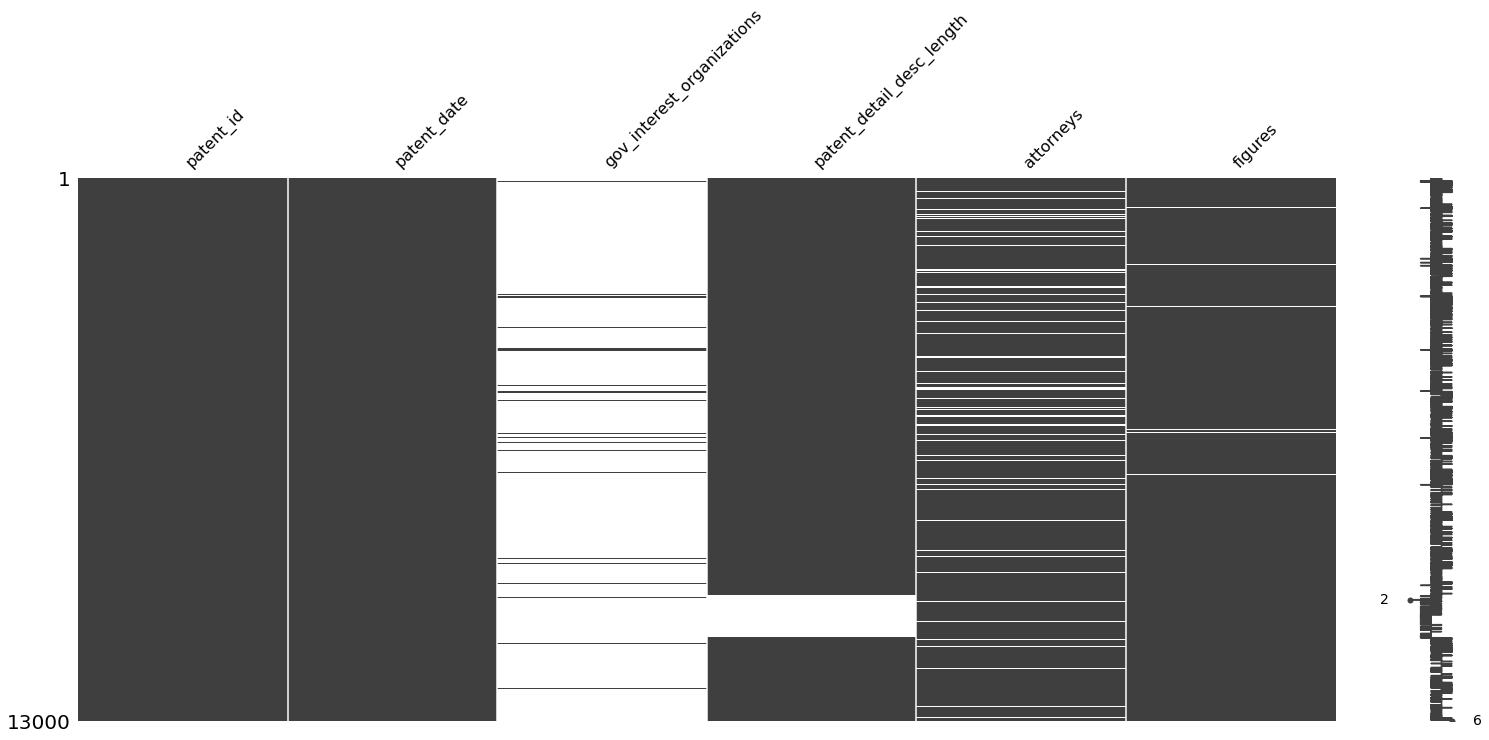

In [ ]:
# visualizing the missing values
msno.matrix(sub_data)

### Patent Date

In [ ]:
sub_data['patent_date'] = sub_data['patent_date'].astype('datetime64')

patent_date_lst = sub_data['patent_date'].tolist()

patent_id_lst = sub_data['patent_id'].tolist()

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_761/668101219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['patent_date'] = sub_data['patent_date'].astype('datetime64')


In [ ]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   patent_id                   13000 non-null  int64         
 1   patent_date                 13000 non-null  datetime64[ns]
 2   gov_interest_organizations  560 non-null    object        
 3   patent_detail_desc_length   11979 non-null  float64       
 4   attorneys                   11778 non-null  object        
 5   figures                     12913 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 609.5+ KB


In [ ]:
clean_df = pd.DataFrame({'patent_id':patent_id_lst, 'patent_date':patent_date_lst})

In [ ]:
clean_df.head()

patent_id patent_date
0    7640621  2010-01-05
1    7640650  2010-01-05
2    7640672  2010-01-05
3    7640673  2010-01-05
4    7640674  2010-01-05

### Government Interest Organizations

In [ ]:
# Looking at non-null rows to see how the data is arranged

gov_org_sub = sub_data[sub_data.gov_interest_organizations.notnull()]
gov_org_sub

patent_id patent_date  \
75       7641780  2010-01-05   
87       7641997  2010-01-05   
98       7642052  2010-01-05   
107      7642082  2010-01-05   
108      7642085  2010-01-05   
...          ...         ...   
12461   11216294  2022-01-04   
12672   11216663  2022-01-04   
12921   11217107  2022-01-04   
12950   11217228  2022-01-04   
12991   11217328  2022-01-04   

                                                                               gov_interest_organizations  \
75     [{'level_one': 'Department of Defense'}, {'level_one': 'Department of Health and Human Services'}]   
87                                                                [{'level_one': 'Department of Energy'}]   
98                                             [{'level_one': 'Department of Health and Human Services'}]   
107                                                           [{'level_one': 'United States Government'}]   
108     [{'level_one': 'Department of Energy'}, {'level_one': 'Department of Health and Human Services'}]   
...                                                                                                   ...   
12461                                                         [{'level_one': 'United States Government'}]   
12672                                                      [{'level_one': 'National Science Foundation'}]   
12921                                    [{'level_one': 'National Aeronautics and Space Administration'}]   
12950                                                            [{'level_one': 'Department of Defense'}]   
12991                                          [{'level_one': 'Department of Health and Human Services'}]   

       patent_detail_desc_length  \
75                       38555.0   
87                       18022.0   
98                       39840.0   
107                      41340.0   
108                     186098.0   
...                          ...   
12461                    37563.0   
12672                   224515.0   
12921                    39396.0   
12950                    68101.0   
12991                    67043.0   

                                                                                                   attorneys  \
75                                        [{'attorney_organization': 'Pillsbury Winthrop Shaw Pittman LLP'}]   
87                                                       [{'attorney_organization': 'Quarles & Brady, LLP'}]   
98                                                         [{'attorney_organization': 'Fenwick & West LLP'}]   
107                                                                        [{'attorney_organization': None}]   
108    [{'attorney_organization': 'Quine Intellectual Property Law Group'}, {'attorney_organization': None}]   
...                                                                                                      ...   
12461                                                                      [{'attorney_organization': None}]   
12672                                               [{'attorney_organization': 'Thomas | Horstemeyer, LLP'}]   
12921                                                      [{'attorney_organization': 'Gates & Cooper LLP'}]   
12950                                                           [{'attorney_organization': 'Moser Taboada'}]   
12991                                                       [{'attorney_organization': 'Umberg Zipser LLP'}]   

                     figures  
75     [{'num_figures': 14}]  
87      [{'num_figures': 5}]  
98      [{'num_figures': 6}]  
107     [{'num_figures': 1}]  
108     [{'num_figures': 9}]  
...                      ...  
12461  [{'num_figures': 18}]  
12672  [{'num_figures': 35}]  
12921   [{'num_figures': 7}]  
12950  [{'num_figures': 11}]  
12991  [{'num_figures': 11}]  

[560 rows x 6 columns]

In [ ]:
sub_data['gov_interest_organizations'].unique()

array([nan,
       "[{'level_one': 'Department of Defense'}, {'level_one': 'Department of Health and Human Services'}]",
       "[{'level_one': 'Department of Energy'}]",
       "[{'level_one': 'Department of Health and Human Services'}]",
       "[{'level_one': 'United States Government'}]",
       "[{'level_one': 'Department of Energy'}, {'level_one': 'Department of Health and Human Services'}]",
       "[{'level_one': 'Department of Defense'}]",
       "[{'level_one': 'National Science Foundation'}, {'level_one': 'Department of Health and Human Services'}]",
       "[{'level_one': 'National Science Foundation'}]",
       "[{'level_one': 'National Aeronautics and Space Administration'}]",
       "[{'level_one': 'National Science Foundation'}, {'level_one': 'Department of Defense'}]",
       "[{'level_one': 'Department of Defense'}, {'level_one': 'Department of Health and Human Services'}, {'level_one': 'Department of Health and Human Services'}]",
       "[{'level_one': 'Department o

In [ ]:
sub_data['gov_interest_organizations'] = sub_data['gov_interest_organizations'].replace(np.nan, \
                                                        "[{'level_one': 'Not a Gov'}]")

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_761/3601182981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['gov_interest_organizations'] = sub_data['gov_interest_organizations'].replace(np.nan, \


In [ ]:
sub_data.head()

patent_id patent_date    gov_interest_organizations  \
0    7640621  2010-01-05  [{'level_one': 'Not a Gov'}]   
1    7640650  2010-01-05  [{'level_one': 'Not a Gov'}]   
2    7640672  2010-01-05  [{'level_one': 'Not a Gov'}]   
3    7640673  2010-01-05  [{'level_one': 'Not a Gov'}]   
4    7640674  2010-01-05  [{'level_one': 'Not a Gov'}]   

   patent_detail_desc_length  \
0                    10021.0   
1                    11909.0   
2                    19484.0   
3                    33202.0   
4                    36196.0   

                                                                                                                 attorneys  \
0                                                                     [{'attorney_organization': 'King & Schickli, PLLC'}]   
1                                                              [{'attorney_organization': 'Patterson & Sheridan, L.L.P.'}]   
2  [{'attorney_organization': None}, {'attorney_organization': None}, {'attorney_organization': 'Moore & Van Allen PLLC'}]   
3                                                                [{'attorney_organization': 'McDermott Will & Emery LLP'}]   
4                                                         [{'attorney_organization': 'Knobbe, Martens, Olson & Bear LLP'}]   

                 figures  
0   [{'num_figures': 3}]  
1  [{'num_figures': 10}]  
2  [{'num_figures': 13}]  
3  [{'num_figures': 10}]  
4  [{'num_figures': 21}]

In [ ]:
result_list = []

for _, row in sub_data.iterrows():
    value = row['gov_interest_organizations']
    
    dict_list = eval(value)
    
    if dict_list[0]['level_one'] == 'Not a Gov':
        result = 0
    else:
        result = len(dict_list)
    
    result_list.append(result)
    
print(result_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from collections import Counter

d = dict(Counter(result_list))

print(d)

{0: 12440, 2: 97, 1: 432, 3: 22, 5: 3, 4: 6}


<b>Of the 560 patents with gov_interest_organizations:</b> 
   
   432 contained 1 govt org \
   97  contained 2 govt orgs \
   22  contained 3 govt orgs \
   6   contained 4 govt orgs \
   3   contained 5 govt orgs 

### Patent Detail Description Length

In [ ]:
sub_data[sub_data['patent_detail_desc_length'].isnull()]

patent_id patent_date    gov_interest_organizations  \
9121    10167625  2019-01-01  [{'level_one': 'Not a Gov'}]   
9183    10168202  2019-01-01  [{'level_one': 'Not a Gov'}]   
9253    10168352  2019-01-01  [{'level_one': 'Not a Gov'}]   
9339    10168644  2019-01-01  [{'level_one': 'Not a Gov'}]   
9347    10168679  2019-01-01  [{'level_one': 'Not a Gov'}]   
...          ...         ...                           ...   
10995   10529034  2020-01-07  [{'level_one': 'Not a Gov'}]   
10996   10529035  2020-01-07  [{'level_one': 'Not a Gov'}]   
10997   10529036  2020-01-07  [{'level_one': 'Not a Gov'}]   
10998   10529037  2020-01-07  [{'level_one': 'Not a Gov'}]   
10999   10529038  2020-01-07  [{'level_one': 'Not a Gov'}]   

       patent_detail_desc_length  \
9121                         NaN   
9183                         NaN   
9253                         NaN   
9339                         NaN   
9347                         NaN   
...                          ...   
10995                        NaN   
10996                        NaN   
10997                        NaN   
10998                        NaN   
10999                        NaN   

                                                                                                attorneys  \
9121                        [{'attorney_organization': "The Law Office of Patrick F. O'Reilly III, LLC"}]   
9183                            [{'attorney_organization': 'Chernoff, Vilhauer, McClung & Stenzel, LLP'}]   
9253                   [{'attorney_organization': None}, {'attorney_organization': 'VLP Law Group, LLP'}]   
9339                                            [{'attorney_organization': 'Thorpe North & Western LLP'}]   
9347                  [{'attorney_organization': 'IDP Patent Services'}, {'attorney_organization': None}]   
...                                                                                                   ...   
10995                                [{'attorney_organization': 'Sheppard Mullin Richter & Hampton LLP'}]   
10996                                     [{'attorney_organization': 'Knobbe Martens Olson & Bear, LLP'}]   
10997  [{'attorney_organization': 'Hickman Palermo Becker Bingham LLP'}, {'attorney_organization': None}]   
10998                                                               [{'attorney_organization': 'NEO IP'}]   
10999                                                                                                 NaN   

                     figures  
9121   [{'num_figures': 16}]  
9183    [{'num_figures': 8}]  
9253    [{'num_figures': 1}]  
9339    [{'num_figures': 2}]  
9347   [{'num_figures': 17}]  
...                      ...  
10995   [{'num_figures': 7}]  
10996   [{'num_figures': 6}]  
10997  [{'num_figures': 10}]  
10998   [{'num_figures': 8}]  
10999  [{'num_figures': 50}]  

[1021 rows x 6 columns]

In [ ]:
# Look at distribution of the data
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sub_data['patent_detail_desc_length'].describe()

count     11979.00
mean      52981.56
std       76593.57
min         641.00
25%       23879.50
50%       37736.00
75%       60229.00
max     3194409.00
Name: patent_detail_desc_length, dtype: float64

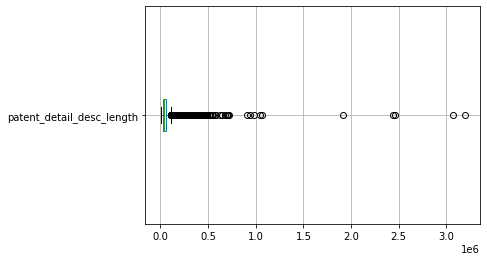

In [ ]:
boxplot = sub_data.boxplot(column=['patent_detail_desc_length'], vert=False)  

In [ ]:
sub_data['patent_detail_desc_length'].describe()

count     11979.00
mean      52981.56
std       76593.57
min         641.00
25%       23879.50
50%       37736.00
75%       60229.00
max     3194409.00
Name: patent_detail_desc_length, dtype: float64

In [ ]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   patent_id                   13000 non-null  int64         
 1   patent_date                 13000 non-null  datetime64[ns]
 2   gov_interest_organizations  13000 non-null  object        
 3   patent_detail_desc_length   11979 non-null  float64       
 4   attorneys                   11778 non-null  object        
 5   figures                     12913 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 609.5+ KB


### Attorneys

In [ ]:
def attorneys_convert():
    sub_data['attorneys'] = sub_data['attorneys'].apply(lambda x:perfectEval(str(x)))
    #     
    df_ = (sub_data['attorneys'].to_frame())
    df_ = df_.replace('nan', np.nan)
    df_dict = df_.to_dict()
    # 
    df_['attorneys_counter'] = 0
    # 
    for i in range(len(df_)):
        #
        if df_.iloc[i,0] is not np.nan:
            df_.at[i ,'attorneys_counter'] = (len(df_dict['attorneys'][i]))
            #
            x = 0
            for j in range(len(df_dict['attorneys'][i])):       
                a = df_dict['attorneys'][i][j]
                #
                if (a['attorney_organization']) is None:
                    x += 0
                else:
                    x += 1
                #    
            df_.at[i ,'attorneys_counter'] = x
    return df_
#

In [ ]:
attorneys = attorneys_convert()

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_761/3357441374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['attorneys'] = sub_data['attorneys'].apply(lambda x:perfectEval(str(x)))


In [ ]:
attorneys.head(20)

attorneys  \
0                                                                      [{'attorney_organization': 'King & Schickli, PLLC'}]   
1                                                               [{'attorney_organization': 'Patterson & Sheridan, L.L.P.'}]   
2   [{'attorney_organization': None}, {'attorney_organization': None}, {'attorney_organization': 'Moore & Van Allen PLLC'}]   
3                                                                 [{'attorney_organization': 'McDermott Will & Emery LLP'}]   
4                                                          [{'attorney_organization': 'Knobbe, Martens, Olson & Bear LLP'}]   
5                                                                          [{'attorney_organization': 'Wolff & Samson PC'}]   
6                                                            [{'attorney_organization': 'Westman, Champlin & Kelly, P.A.'}]   
7                                                                                                                       NaN   
8                                         [{'attorney_organization': 'Conley Rose, P.C.'}, {'attorney_organization': None}]   
9                                                                                         [{'attorney_organization': None}]   
10                                           [{'attorney_organization': 'Kusner & Jaffe'}, {'attorney_organization': None}]   
11                                                                                        [{'attorney_organization': None}]   
12                          [{'attorney_organization': None}, {'attorney_organization': 'Westman, Champlin & Kelly, P.A.'}]   
13                                                               [{'attorney_organization': 'Carmen Patti Law Group, LLC'}]   
14                                       [{'attorney_organization': 'Finnegan, Henderson, Farabow, Garrett & Dunner, LLP'}]   
15                                                                           [{'attorney_organization': 'Zilka-Kotab, PC'}]   
16                                       [{'attorney_organization': 'Darby & Darby P.C.'}, {'attorney_organization': None}]   
17                                         [{'attorney_organization': None}, {'attorney_organization': 'Perkins Coie LLP'}]   
18                                                                      [{'attorney_organization': 'Kinney & Lange, P.A.'}]   
19                  [{'attorney_organization': None}, {'attorney_organization': 'Alleman Hall McCoy Russell & Tuttle LLP'}]   

    attorneys_counter  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
5                   1  
6                   1  
7                   0  
8                   1  
9                   0  
10                  1  
11                  0  
12                  1  
13                  1  
14                  1  
15                  1  
16                  1  
17                  1  
18                  1  
19                  1

In [ ]:
sub_data['attorneys_counter'] = attorneys['attorneys_counter']

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_761/3757381707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['attorneys_counter'] = attorneys['attorneys_counter']


In [ ]:
sub_data.head()

patent_id patent_date    gov_interest_organizations  \
0    7640621  2010-01-05  [{'level_one': 'Not a Gov'}]   
1    7640650  2010-01-05  [{'level_one': 'Not a Gov'}]   
2    7640672  2010-01-05  [{'level_one': 'Not a Gov'}]   
3    7640673  2010-01-05  [{'level_one': 'Not a Gov'}]   
4    7640674  2010-01-05  [{'level_one': 'Not a Gov'}]   

   patent_detail_desc_length  \
0                   10021.00   
1                   11909.00   
2                   19484.00   
3                   33202.00   
4                   36196.00   

                                                                                                                 attorneys  \
0                                                                     [{'attorney_organization': 'King & Schickli, PLLC'}]   
1                                                              [{'attorney_organization': 'Patterson & Sheridan, L.L.P.'}]   
2  [{'attorney_organization': None}, {'attorney_organization': None}, {'attorney_organization': 'Moore & Van Allen PLLC'}]   
3                                                                [{'attorney_organization': 'McDermott Will & Emery LLP'}]   
4                                                         [{'attorney_organization': 'Knobbe, Martens, Olson & Bear LLP'}]   

                 figures  attorneys_counter  
0   [{'num_figures': 3}]                  1  
1  [{'num_figures': 10}]                  1  
2  [{'num_figures': 13}]                  1  
3  [{'num_figures': 10}]                  1  
4  [{'num_figures': 21}]                  1

### Figures

In [ ]:
sub_data.columns

Index(['patent_id', 'patent_date', 'gov_interest_organizations',
       'patent_detail_desc_length', 'attorneys', 'figures',
       'attorneys_counter'],
      dtype='object')

In [ ]:
sub_data['figures'] = sub_data['figures'].fillna(0)

sub_data['figures'] = sub_data['figures'].replace(0, "[{'num_figures': 0}]")

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_761/3751967693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['figures'] = sub_data['figures'].fillna(0)
/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_761/3751967693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['figures'] = sub_data['figures'].replace(0, "[{'num_figures': 0}]")


In [ ]:
df = extract_embed(sub_data, 'figures')

In [ ]:
df1 = denest_columns(df, 'figures', 0)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   num_figures  13000 non-null  int64
dtypes: int64(1)
memory usage: 203.1 KB


In [ ]:
df1.head()

num_figures
0            3
1           10
2           13
3           10
4           21

In [ ]:
num_figure_lst = df1['num_figures'].tolist()

In [ ]:
clean_df = pd.DataFrame({'patent_id': patent_id_lst, 'patent_date': patent_date_lst, 'count_gov_orgs': result_list , \
                         'patent_detail_desc_length': sub_data['patent_detail_desc_length'], 'num_figures': num_figure_lst, \
                        'attorney_count': sub_data['attorneys_counter']})

In [ ]:
clean_df.head()

patent_id patent_date  count_gov_orgs  patent_detail_desc_length  \
0    7640621  2010-01-05               0                   10021.00   
1    7640650  2010-01-05               0                   11909.00   
2    7640672  2010-01-05               0                   19484.00   
3    7640673  2010-01-05               0                   33202.00   
4    7640674  2010-01-05               0                   36196.00   

   num_figures  attorney_count  
0            3               1  
1           10               1  
2           13               1  
3           10               1  
4           21               1

In [ ]:
clean_df.shape

(13000, 6)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   patent_id                  13000 non-null  int64         
 1   patent_date                13000 non-null  datetime64[ns]
 2   count_gov_orgs             13000 non-null  int64         
 3   patent_detail_desc_length  11979 non-null  float64       
 4   num_figures                13000 non-null  int64         
 5   attorney_count             13000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 609.5 KB


In [ ]:
Data_cl_series3 = clean_df

In [ ]:
clean_df.to_csv('Robert_frame.csv',index=False)

In [ ]:
Data_cl_series2.head()

ipcr_section ipcr_counter  inventor_US  inventor_NonUS  inventor_counter  \
0            A            2            1               0                 1   
1            G            3            4               0                 4   
2            G            2            4               0                 4   
3            G            1            2               0                 2   
4            G            2            2               0                 2   

  patent_type patent_abstract_counter  patent_processing_days  
0     utility                     381                    1716  
1     utility                     763                     739  
2     utility                     438                     594  
3     utility                     852                     888  
4     utility                     889                     610

## 5.4. Merge Cleaned Data <a class="anchor" id="Merge_Data"></a>

In [ ]:
Cleaned_data = pd.concat([Data_cl_series1,Data_cl_series2],axis =1)

In [ ]:
Cleaned_data = pd.concat([Data_cl_series3,Cleaned_data],axis =1)

In [ ]:
Cleaned_data.head(2)

patent_id patent_date  count_gov_orgs  patent_detail_desc_length  \
0    7640621  2010-01-05               0                   10021.00   
1    7640650  2010-01-05               0                   11909.00   

   num_figures  attorney_count filing_date filing_type n_assignees  \
0            3               1  2005-04-25          11           1   
1           10               1  2007-12-28          11           1   

  assignee_isUS  ... patent_num_us_patents_cited patent_year  ipcr_section  \
0             1  ...                          13        2010             A   
1             0  ...                           6        2010             G   

   ipcr_counter  inventor_US inventor_NonUS inventor_counter  patent_type  \
0             2            1              0                1      utility   
1             3            4              0                4      utility   

   patent_abstract_counter  patent_processing_days  
0                      381                    1716  
1                      763                     739  

[2 rows x 23 columns]

In [ ]:
Cleaned_data['patent_type'].unique()

array(['utility'], dtype=object)

* All patents are utility type and therefore this columns was removed. 


In [ ]:
Cleaned_data.drop(['patent_type'],axis =1, inplace =True)

In [ ]:
Cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   patent_id                           13000 non-null  int64         
 1   patent_date                         13000 non-null  datetime64[ns]
 2   count_gov_orgs                      13000 non-null  int64         
 3   patent_detail_desc_length           11979 non-null  float64       
 4   num_figures                         13000 non-null  int64         
 5   attorney_count                      13000 non-null  int64         
 6   filing_date                         13000 non-null  datetime64[ns]
 7   filing_type                         13000 non-null  object        
 8   n_assignees                         12246 non-null  object        
 9   assignee_isUS                       12170 non-null  object        
 10  assignee_type         

## 5.5. Impute Missing Values <a class="anchor" id="Impute"></a>

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Select col with missing data
for cols in ['patent_detail_desc_length','n_assignees','assignee_isUS','assignee_type','n_applicants']:
    Cleaned_data[cols]= pd.to_numeric(Cleaned_data[cols])
    Cleaned_data[cols] = imputer.fit_transform(Cleaned_data[cols].values.reshape(-1,1))
    

In [ ]:
for cols in ['patent_abstract_counter','filing_type','ipcr_counter','patent_detail_desc_length','n_assignees','assignee_isUS','assignee_type','n_applicants']:
    Cleaned_data[cols] = Cleaned_data[cols].astype(int)

In [ ]:
Cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   patent_id                           13000 non-null  int64         
 1   patent_date                         13000 non-null  datetime64[ns]
 2   count_gov_orgs                      13000 non-null  int64         
 3   patent_detail_desc_length           13000 non-null  int64         
 4   num_figures                         13000 non-null  int64         
 5   attorney_count                      13000 non-null  int64         
 6   filing_date                         13000 non-null  datetime64[ns]
 7   filing_type                         13000 non-null  int64         
 8   n_assignees                         13000 non-null  int64         
 9   assignee_isUS                       13000 non-null  int64         
 10  assignee_type         

## 5.6. Remove Outliers <a class="anchor" id="Outliers"></a>

In [ ]:
Cleaned_data_orig = Cleaned_data.copy(deep= True)

<AxesSubplot:xlabel='patent_processing_days', ylabel='Count'>

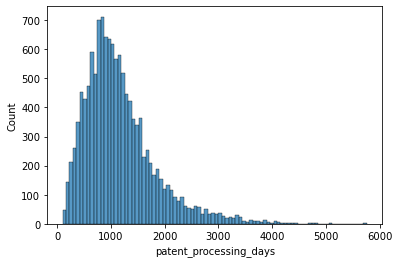

In [ ]:

sns.histplot(data=Cleaned_data, x='patent_processing_days')

In [ ]:
def rm_outlier(data, column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    data = data[(data[column] >= (q1-1.5*IQR)) & (data[column] <= (q3+1.5*IQR))]
    return data 
    

In [ ]:
Cleaned_data = rm_outlier(Cleaned_data, 'patent_processing_days')

In [ ]:
# Removing outlier based on q1 and q3 

<AxesSubplot:xlabel='patent_processing_days', ylabel='Count'>

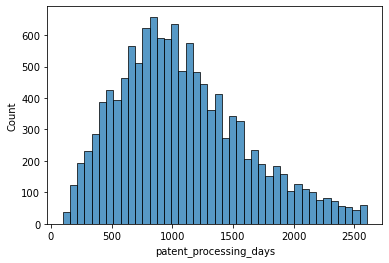

In [ ]:
sns.histplot(data=Cleaned_data, x='patent_processing_days')

In [ ]:
Cleaned_data.shape

(12439, 22)

In [ ]:
Cleaned_data['filing_date'].head(1)

0   2005-04-25
Name: filing_date, dtype: datetime64[ns]

In [ ]:
Cleaned_data['filing_month'] = Cleaned_data['filing_date'].dt.month

In [ ]:
Cleaned_data['filing_year'] = Cleaned_data['filing_date'].dt.year

In [ ]:
Cleaned_data['filing_quarter'] = Cleaned_data['filing_date'].dt.to_period('Q').dt.strftime('q%q')

In [ ]:
Cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12439 entries, 0 to 12999
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   patent_id                           12439 non-null  int64         
 1   patent_date                         12439 non-null  datetime64[ns]
 2   count_gov_orgs                      12439 non-null  int64         
 3   patent_detail_desc_length           12439 non-null  int64         
 4   num_figures                         12439 non-null  int64         
 5   attorney_count                      12439 non-null  int64         
 6   filing_date                         12439 non-null  datetime64[ns]
 7   filing_type                         12439 non-null  int64         
 8   n_assignees                         12439 non-null  int64         
 9   assignee_isUS                       12439 non-null  int64         
 10  assignee_type         

# 6. Exploratory Data Analysis <a class="anchor" id="EDA"></a>

## 6.1. Scatter and Box Plot <a class="anchor" id="Scatter_Box"></a>

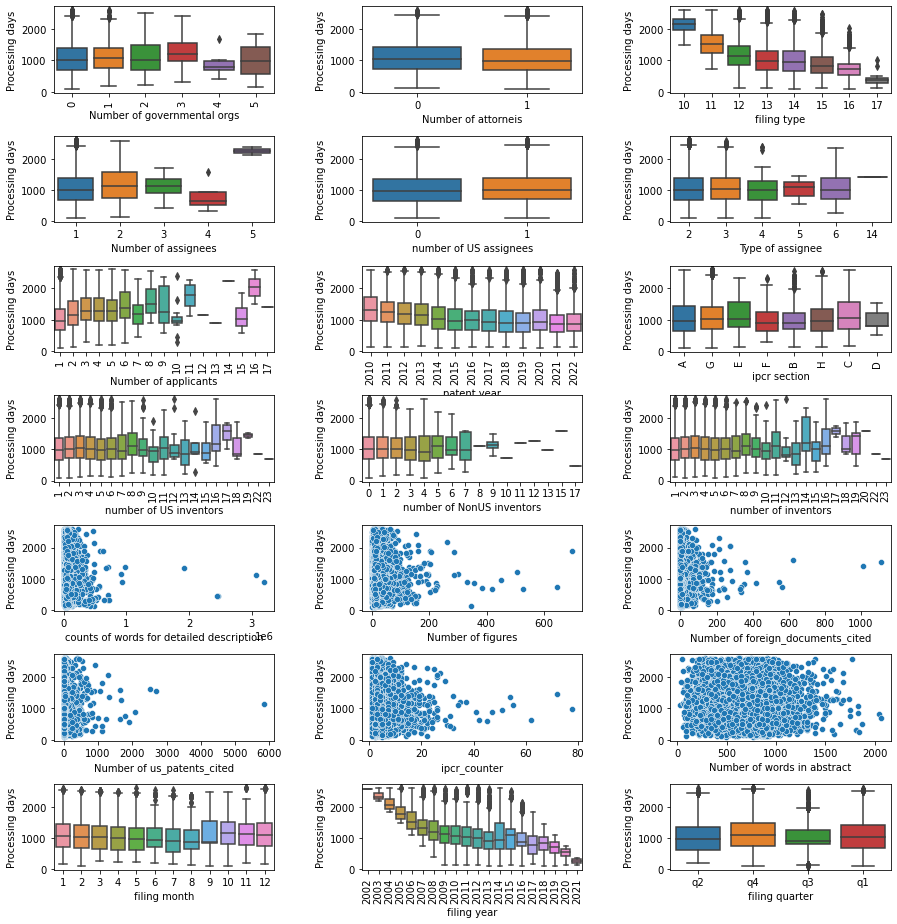

In [ ]:

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15))

#fig.tight_layout() # 

sns.boxplot(data=Cleaned_data, x='count_gov_orgs', y='patent_processing_days', ax=axes[0,0])
axes[0,0].set_xlabel('Number of governmental orgs')
axes[0,0].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='attorney_count', y='patent_processing_days', ax=axes[0,1])
axes[0,1].set_xlabel('Number of attorneis')
axes[0,1].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='filing_type', y='patent_processing_days', ax=axes[0,2])
axes[0,2].set_xlabel('filing type')
axes[0,2].set_ylabel('Processing days')


sns.boxplot(data=Cleaned_data, x='n_assignees', y='patent_processing_days', ax=axes[1,0])
axes[1,0].set_xlabel('Number of assignees')
axes[1,0].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='assignee_isUS', y='patent_processing_days', ax=axes[1,1])
axes[1,1].set_xlabel('number of US assignees')
axes[1,1].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='assignee_type', y='patent_processing_days', ax=axes[1,2])
axes[1,2].set_xlabel('Type of assignee')
axes[1,2].set_ylabel('Processing days')


sns.boxplot(data=Cleaned_data, x='n_applicants', y='patent_processing_days', ax=axes[2,0])
axes[2,0].set_xlabel('Number of applicants')
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(),rotation= 90)
axes[2,0].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='patent_year', y='patent_processing_days', ax=axes[2,1])
axes[2,1].set_xlabel('patent year')
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation= 90)
axes[2,1].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='ipcr_section', y='patent_processing_days', ax=axes[2,2])
axes[2,2].set_xlabel('ipcr section')
axes[2,2].set_xticklabels(axes[2,2].get_xticklabels(),rotation= 90)
axes[2,2].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='inventor_US', y='patent_processing_days', ax=axes[3,0])
axes[3,0].set_xlabel('number of US inventors')
axes[3,0].set_xticklabels(axes[3,0].get_xticklabels(),rotation= 90)
axes[3,0].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='inventor_NonUS', y='patent_processing_days', ax=axes[3,1])
axes[3,1].set_xlabel('number of NonUS inventors')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation= 90)
axes[3,1].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='inventor_counter', y='patent_processing_days', ax=axes[3,2])
axes[3,2].set_xlabel('number of inventors')
axes[3,2].set_xticklabels(axes[3,2].get_xticklabels(),rotation= 90)
axes[3,2].set_ylabel('Processing days')

sns.scatterplot(data=Cleaned_data, x='patent_detail_desc_length', y='patent_processing_days', ax=axes[4,0])
axes[4,0].set_xlabel('counts of words for detailed description')
axes[4,0].set_ylabel('Processing days')


sns.scatterplot(data=Cleaned_data, x='num_figures', y='patent_processing_days', ax=axes[4,1])
axes[4,1].set_xlabel('Number of figures')
axes[4,1].set_ylabel('Processing days')

sns.scatterplot(data=Cleaned_data, x='patent_num_foreign_documents_cited', y='patent_processing_days', ax=axes[4,2])
axes[4,2].set_xlabel('Number of foreign_documents_cited')
axes[4,2].set_ylabel('Processing days')

sns.scatterplot(data=Cleaned_data, x='patent_num_us_patents_cited', y='patent_processing_days', ax=axes[5,0])
axes[5,0].set_xlabel('Number of us_patents_cited')
axes[5,0].set_ylabel('Processing days')


sns.scatterplot(data=Cleaned_data, x='ipcr_counter', y='patent_processing_days', ax=axes[5,1])
axes[5,1].set_xlabel('ipcr_counter')
axes[5,1].set_ylabel('Processing days')

sns.scatterplot(data=Cleaned_data, x='patent_abstract_counter', y='patent_processing_days', ax=axes[5,2])
axes[5,2].set_xlabel('Number of words in abstract')
axes[5,2].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='filing_month', y='patent_processing_days', ax=axes[6,0])
axes[6,0].set_xlabel('filing month')
axes[6,0].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='filing_year', y='patent_processing_days', ax=axes[6,1])
axes[6,1].set_xlabel('filing year')
axes[6,1].set_xticklabels(axes[6,1].get_xticklabels(),rotation= 90)
axes[6,1].set_ylabel('Processing days')

sns.boxplot(data=Cleaned_data, x='filing_quarter', y='patent_processing_days', ax=axes[6,2])
axes[6,2].set_xlabel('filing quarter')
axes[6,2].set_ylabel('Processing days')



plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.5)





## 6.2. Count Plot <a class="anchor" id="Count"></a>

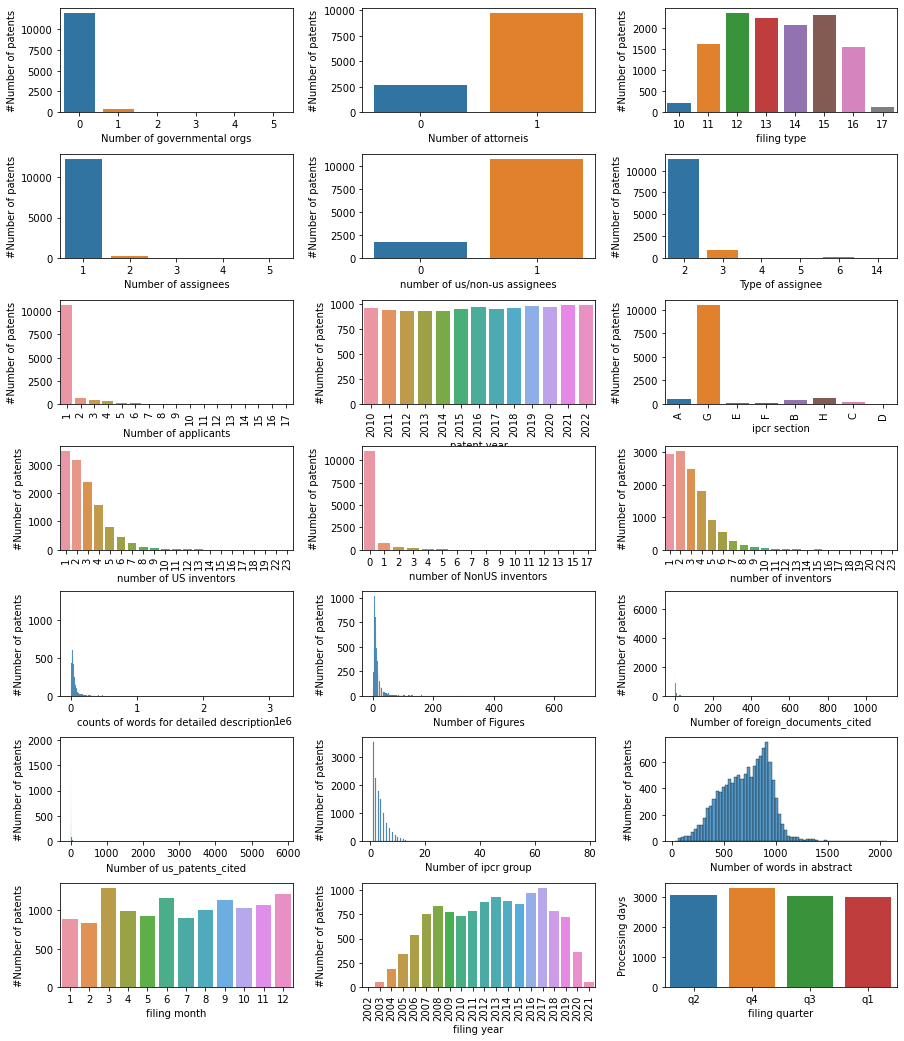

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 17))

#fig.tight_layout() # 

sns.countplot(data=Cleaned_data, x='count_gov_orgs', ax=axes[0,0])
axes[0,0].set_xlabel('Number of governmental orgs')
axes[0,0].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='attorney_count', ax=axes[0,1])
axes[0,1].set_xlabel('Number of attorneis')
axes[0,1].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='filing_type',  ax=axes[0,2])
axes[0,2].set_xlabel('filing type')
axes[0,2].set_ylabel('#Number of patents')


sns.countplot(data=Cleaned_data, x='n_assignees', ax=axes[1,0])
axes[1,0].set_xlabel('Number of assignees')
axes[1,0].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='assignee_isUS', ax=axes[1,1])
axes[1,1].set_xlabel('number of us/non-us assignees')
axes[1,1].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='assignee_type', ax=axes[1,2])
axes[1,2].set_xlabel('Type of assignee')
axes[1,2].set_ylabel('#Number of patents')


sns.countplot(data=Cleaned_data, x='n_applicants',  ax=axes[2,0])
axes[2,0].set_xlabel('Number of applicants')
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(),rotation= 90)
axes[2,0].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='patent_year', ax=axes[2,1])
axes[2,1].set_xlabel('patent year')
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation= 90)
axes[2,1].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='ipcr_section',  ax=axes[2,2])
axes[2,2].set_xlabel('ipcr section')
axes[2,2].set_xticklabels(axes[2,2].get_xticklabels(),rotation= 90)
axes[2,2].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='inventor_US',  ax=axes[3,0])
axes[3,0].set_xlabel('number of US inventors')
axes[3,0].set_xticklabels(axes[3,0].get_xticklabels(),rotation= 90)
axes[3,0].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='inventor_NonUS',  ax=axes[3,1])
axes[3,1].set_xlabel('number of NonUS inventors')
axes[3,1].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='inventor_counter', ax=axes[3,2])
axes[3,2].set_xlabel('number of inventors')
axes[3,2].set_xticklabels(axes[3,2].get_xticklabels(),rotation= 90)
axes[3,2].set_ylabel('#Number of patents')

sns.histplot(data=Cleaned_data, x='patent_detail_desc_length', ax=axes[4,0])
axes[4,0].set_xlabel('counts of words for detailed description')
axes[4,0].set_ylabel('#Number of patents')

sns.histplot(data=Cleaned_data, x='num_figures', ax=axes[4,1])
axes[4,1].set_xlabel('Number of Figures')
axes[4,1].set_ylabel('#Number of patents')

sns.histplot(data=Cleaned_data, x='patent_num_foreign_documents_cited', ax=axes[4,2])
axes[4,2].set_xlabel('Number of foreign_documents_cited')
axes[4,2].set_ylabel('#Number of patents')

sns.histplot(data=Cleaned_data, x='patent_num_us_patents_cited', ax=axes[5,0])
axes[5,0].set_xlabel('Number of us_patents_cited')
axes[5,0].set_ylabel('#Number of patents')

sns.histplot(data=Cleaned_data, x='ipcr_counter', ax=axes[5,1])
axes[5,1].set_xlabel('Number of ipcr group')
axes[5,1].set_ylabel('#Number of patents')

sns.histplot(data=Cleaned_data, x='patent_abstract_counter', ax=axes[5,2])
axes[5,2].set_xlabel('Number of words in abstract')
axes[5,2].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='filing_month',  ax=axes[6,0])
axes[6,0].set_xlabel('filing month')
axes[6,0].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='filing_year',  ax=axes[6,1])
axes[6,1].set_xlabel('filing year')
axes[6,1].set_xticklabels(axes[6,1].get_xticklabels(),rotation= 90)
axes[6,1].set_ylabel('#Number of patents')

sns.countplot(data=Cleaned_data, x='filing_quarter',  ax=axes[6,2])
axes[6,2].set_xlabel('filing quarter')
axes[6,2].set_ylabel('Processing days')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)




## 6.3. Correlation <a class="anchor" id="Corr"></a>

In [ ]:
Cleaned_data_1 = Cleaned_data.copy(deep= True)

In [ ]:
Cleaned_data_1.drop(['patent_id','ipcr_section','filing_quarter'],axis =1, inplace =True)

In [ ]:
for col in list(Cleaned_data_1.columns):
    Cleaned_data_1[col]= pd.to_numeric(Cleaned_data_1[col])
       

<AxesSubplot:>

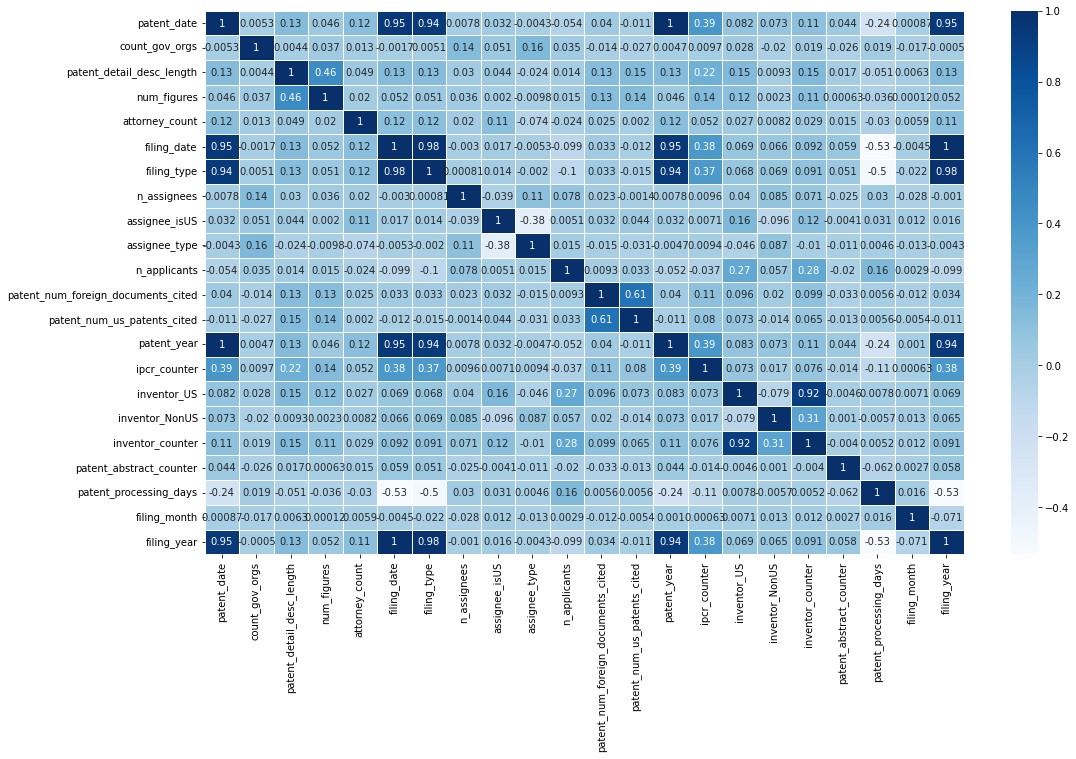

In [ ]:
f, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(Cleaned_data_1.corr(), annot=True, linewidths=.5, ax=ax,cmap='Blues')

# 7. Feature Eningeering <a class="anchor" id="Feng"></a>

## 7.1. Multicolinearity <a class="anchor" id="Mcol"></a>

In [ ]:
Cleaned_data_2 = Cleaned_data.copy(deep= True)

In [ ]:

Cleaned_data_2.drop(['filing_month','filing_date'],axis =1, inplace=True)

In [ ]:
Cleaned_data_2.columns

Index(['patent_id', 'patent_date', 'count_gov_orgs',
       'patent_detail_desc_length', 'num_figures', 'attorney_count',
       'filing_type', 'n_assignees', 'assignee_isUS', 'assignee_type',
       'n_applicants', 'patent_num_foreign_documents_cited',
       'patent_num_us_patents_cited', 'patent_year', 'ipcr_section',
       'ipcr_counter', 'inventor_US', 'inventor_NonUS', 'inventor_counter',
       'patent_abstract_counter', 'patent_processing_days', 'filing_year',
       'filing_quarter'],
      dtype='object')

In [ ]:
Cleaned_data_2['filing_type'].unique()

array([11, 12, 10, 13, 14, 15, 16, 17])

In [ ]:
Cleaned_data_2.filing_type = Cleaned_data_2.filing_type.replace([9,10,17],0)

In [ ]:
Cleaned_data_2['filing_type'].unique()

array([11, 12,  0, 13, 14, 15, 16])

In [ ]:
Cleaned_data_2['filing_type'] = Cleaned_data_2['filing_type'].astype(str)

In [ ]:
Cleaned_data_2['assignee_type'].unique()

array([ 2,  3,  6,  4,  5, 14])

In [ ]:
Cleaned_data_2.assignee_type = Cleaned_data_2.assignee_type.replace([3,4,5,6,14],0)

In [ ]:
Cleaned_data_2['assignee_type'].unique()

array([2, 0])

In [ ]:
Cleaned_data_2['assignee_type'] = Cleaned_data_2['assignee_type'].astype(str)

In [ ]:
Cleaned_data_2['ipcr_section'].unique()

array(['A', 'G', 'E', 'F', 'B', 'H', 'C', 'D'], dtype=object)

In [ ]:
Cleaned_data_2.ipcr_section = Cleaned_data_2.ipcr_section.replace(['A', 'E', 'F', 'B', 'H', 'C', 'D'],'rest')

In [ ]:
Cleaned_data_2['ipcr_section'].unique()

array(['rest', 'G'], dtype=object)

In [ ]:
Cleaned_data_2['assignee_isUS'] = Cleaned_data_2['assignee_isUS'].astype(str)

In [ ]:
# get dummies 

In [ ]:

Dummies_Cleaned_data_2 = pd.get_dummies(Cleaned_data_2[['ipcr_section','filing_quarter','assignee_type','filing_type','assignee_isUS']], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)

In [ ]:
Dummies_Cleaned_data_2.head()

ipcr_section_rest  filing_quarter_q2  filing_quarter_q3  filing_quarter_q4  \
0                  1                  1                  0                  0   
1                  0                  0                  0                  1   
2                  0                  1                  0                  0   
3                  0                  0                  1                  0   
4                  0                  1                  0                  0   

   assignee_type_2  filing_type_11  filing_type_12  filing_type_13  \
0                1               1               0               0   
1                0               1               0               0   
2                1               0               1               0   
3                1               1               0               0   
4                1               0               1               0   

   filing_type_14  filing_type_15  filing_type_16  assignee_isUS_1  
0               0               0               0                1  
1               0               0               0                0  
2               0               0               0                1  
3               0               0               0                1  
4               0               0               0                1

In [ ]:
Cleaned_data_2.drop(['patent_id','filing_type','filing_quarter','assignee_type','ipcr_section','assignee_isUS','patent_date','patent_year'], axis =1, inplace =True)

In [ ]:
Cleaned_data_2.columns

Index(['count_gov_orgs', 'patent_detail_desc_length', 'num_figures',
       'attorney_count', 'n_assignees', 'n_applicants',
       'patent_num_foreign_documents_cited', 'patent_num_us_patents_cited',
       'ipcr_counter', 'inventor_US', 'inventor_NonUS', 'inventor_counter',
       'patent_abstract_counter', 'patent_processing_days', 'filing_year'],
      dtype='object')

In [ ]:
cleaned_data_vif = pd.concat([Cleaned_data_2,Dummies_Cleaned_data_2],axis =1)

In [ ]:
cleaned_data_vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12439 entries, 0 to 12999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   count_gov_orgs                      12439 non-null  int64
 1   patent_detail_desc_length           12439 non-null  int64
 2   num_figures                         12439 non-null  int64
 3   attorney_count                      12439 non-null  int64
 4   n_assignees                         12439 non-null  int64
 5   n_applicants                        12439 non-null  int64
 6   patent_num_foreign_documents_cited  12439 non-null  int64
 7   patent_num_us_patents_cited         12439 non-null  int64
 8   ipcr_counter                        12439 non-null  int64
 9   inventor_US                         12439 non-null  int64
 10  inventor_NonUS                      12439 non-null  int64
 11  inventor_counter                    12439 non-null  int64
 12  pate

In [ ]:
#Implement vif 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
def vid_df(Data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = Data.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(len(Data.columns))]
    print(vif_data)

In [ ]:
vid_df(cleaned_data_vif)

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                               feature    VIF
0                       count_gov_orgs   1.07
1            patent_detail_desc_length   2.04
2                          num_figures   1.87
3                       attorney_count   4.72
4                          n_assignees  44.92
5                         n_applicants   3.38
6   patent_num_foreign_documents_cited   1.69
7          patent_num_us_patents_cited   1.74
8                         ipcr_counter   2.83
9                          inventor_US    inf
10                      inventor_NonUS    inf
11                    inventor_counter    inf
12             patent_abstract_counter  10.13
13              patent_processing_days   7.11
14                         filing_year 123.11
15                   ipcr_section_rest   1.34
16                   filing_quarter_q2   2.03
17                   filing_quarter_q3   2.03
18                   filing_quarter_q4   2.12
19                     assignee_type_2  18.89
20                      filing_typ

In [ ]:
cleaned_data_vif.drop(['patent_processing_days'], axis =1, inplace =True)

In [ ]:
vid_df(cleaned_data_vif)

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                               feature    VIF
0                       count_gov_orgs   1.07
1            patent_detail_desc_length   2.04
2                          num_figures   1.87
3                       attorney_count   4.71
4                          n_assignees  44.91
5                         n_applicants   3.26
6   patent_num_foreign_documents_cited   1.69
7          patent_num_us_patents_cited   1.74
8                         ipcr_counter   2.83
9                          inventor_US    inf
10                      inventor_NonUS    inf
11                    inventor_counter    inf
12             patent_abstract_counter  10.11
13                         filing_year 112.91
14                   ipcr_section_rest   1.34
15                   filing_quarter_q2   2.03
16                   filing_quarter_q3   2.03
17                   filing_quarter_q4   2.12
18                     assignee_type_2  18.87
19                      filing_type_11   5.58
20                      filing_typ

In [ ]:
cleaned_data_vif.drop(['inventor_US','inventor_NonUS'], axis =1, inplace =True)

In [ ]:
vid_df(cleaned_data_vif)

                               feature    VIF
0                       count_gov_orgs   1.07
1            patent_detail_desc_length   2.04
2                          num_figures   1.87
3                       attorney_count   4.71
4                          n_assignees  44.75
5                         n_applicants   3.26
6   patent_num_foreign_documents_cited   1.69
7          patent_num_us_patents_cited   1.74
8                         ipcr_counter   2.83
9                     inventor_counter   3.76
10             patent_abstract_counter  10.11
11                         filing_year 112.91
12                   ipcr_section_rest   1.34
13                   filing_quarter_q2   2.03
14                   filing_quarter_q3   2.03
15                   filing_quarter_q4   2.12
16                     assignee_type_2  18.72
17                      filing_type_11   5.58
18                      filing_type_12   7.72
19                      filing_type_13   7.54
20                      filing_typ

In [ ]:
cleaned_data_vif.drop(['filing_year'], axis =1, inplace =True)
vid_df(cleaned_data_vif)

                               feature   VIF
0                       count_gov_orgs  1.07
1            patent_detail_desc_length  2.04
2                          num_figures  1.87
3                       attorney_count  4.63
4                          n_assignees 25.98
5                         n_applicants  3.26
6   patent_num_foreign_documents_cited  1.69
7          patent_num_us_patents_cited  1.74
8                         ipcr_counter  2.81
9                     inventor_counter  3.74
10             patent_abstract_counter  9.16
11                   ipcr_section_rest  1.34
12                   filing_quarter_q2  1.99
13                   filing_quarter_q3  1.98
14                   filing_quarter_q4  2.07
15                     assignee_type_2 17.27
16                      filing_type_11  4.02
17                      filing_type_12  5.46
18                      filing_type_13  5.43
19                      filing_type_14  5.07
20                      filing_type_15  5.60
21        

In [ ]:
cleaned_data_vif.drop(['n_assignees'], axis =1, inplace =True)

In [ ]:
vid_df(cleaned_data_vif)

                               feature   VIF
0                       count_gov_orgs  1.05
1            patent_detail_desc_length  2.04
2                          num_figures  1.87
3                       attorney_count  4.53
4                         n_applicants  3.22
5   patent_num_foreign_documents_cited  1.69
6          patent_num_us_patents_cited  1.74
7                         ipcr_counter  2.80
8                     inventor_counter  3.69
9              patent_abstract_counter  8.59
10                   ipcr_section_rest  1.33
11                   filing_quarter_q2  1.95
12                   filing_quarter_q3  1.96
13                   filing_quarter_q4  2.04
14                     assignee_type_2 17.05
15                      filing_type_11  2.92
16                      filing_type_12  3.97
17                      filing_type_13  4.11
18                      filing_type_14  3.80
19                      filing_type_15  4.23
20                      filing_type_16  3.22
21        

In [ ]:
cleaned_data_vif.drop(['assignee_type_2'], axis =1, inplace =True)

In [ ]:
vid_df(cleaned_data_vif)

                               feature  VIF
0                       count_gov_orgs 1.05
1            patent_detail_desc_length 2.04
2                          num_figures 1.86
3                       attorney_count 4.53
4                         n_applicants 3.22
5   patent_num_foreign_documents_cited 1.69
6          patent_num_us_patents_cited 1.74
7                         ipcr_counter 2.80
8                     inventor_counter 3.68
9              patent_abstract_counter 8.43
10                   ipcr_section_rest 1.33
11                   filing_quarter_q2 1.95
12                   filing_quarter_q3 1.96
13                   filing_quarter_q4 2.03
14                      filing_type_11 2.72
15                      filing_type_12 3.65
16                      filing_type_13 3.82
17                      filing_type_14 3.54
18                      filing_type_15 3.97
19                      filing_type_16 3.04
20                     assignee_isUS_1 6.93


In [ ]:
cleaned_data_vif.drop(['patent_abstract_counter'], axis =1, inplace =True)

In [ ]:
vid_df(cleaned_data_vif)

                               feature  VIF
0                       count_gov_orgs 1.04
1            patent_detail_desc_length 2.03
2                          num_figures 1.86
3                       attorney_count 4.48
4                         n_applicants 3.22
5   patent_num_foreign_documents_cited 1.68
6          patent_num_us_patents_cited 1.74
7                         ipcr_counter 2.80
8                     inventor_counter 3.67
9                    ipcr_section_rest 1.33
10                   filing_quarter_q2 1.94
11                   filing_quarter_q3 1.94
12                   filing_quarter_q4 2.02
13                      filing_type_11 2.25
14                      filing_type_12 2.91
15                      filing_type_13 3.17
16                      filing_type_14 2.93
17                      filing_type_15 3.24
18                      filing_type_16 2.54
19                     assignee_isUS_1 6.83


In [ ]:
cleaned_data_vif.drop(['assignee_isUS_1'], axis =1, inplace =True)

In [ ]:
vid_df(cleaned_data_vif)

                               feature  VIF
0                       count_gov_orgs 1.04
1            patent_detail_desc_length 2.03
2                          num_figures 1.86
3                       attorney_count 4.32
4                         n_applicants 3.22
5   patent_num_foreign_documents_cited 1.68
6          patent_num_us_patents_cited 1.74
7                         ipcr_counter 2.80
8                     inventor_counter 3.58
9                    ipcr_section_rest 1.33
10                   filing_quarter_q2 1.93
11                   filing_quarter_q3 1.93
12                   filing_quarter_q4 2.00
13                      filing_type_11 1.90
14                      filing_type_12 2.44
15                      filing_type_13 2.68
16                      filing_type_14 2.52
17                      filing_type_15 2.76
18                      filing_type_16 2.26


In [ ]:
# Selecting features 

The threshold put at vif value of 5, So those features that has vif values lower than 5 was selected for modeling. 

In [ ]:
cleaned_data_vif.columns

Index(['count_gov_orgs', 'patent_detail_desc_length', 'num_figures',
       'attorney_count', 'n_applicants', 'patent_num_foreign_documents_cited',
       'patent_num_us_patents_cited', 'ipcr_counter', 'inventor_counter',
       'ipcr_section_rest', 'filing_quarter_q2', 'filing_quarter_q3',
       'filing_quarter_q4', 'filing_type_11', 'filing_type_12',
       'filing_type_13', 'filing_type_14', 'filing_type_15', 'filing_type_16'],
      dtype='object')

In [ ]:
Cleaned_data.columns

Index(['patent_id', 'patent_date', 'count_gov_orgs',
       'patent_detail_desc_length', 'num_figures', 'attorney_count',
       'filing_date', 'filing_type', 'n_assignees', 'assignee_isUS',
       'assignee_type', 'n_applicants', 'patent_num_foreign_documents_cited',
       'patent_num_us_patents_cited', 'patent_year', 'ipcr_section',
       'ipcr_counter', 'inventor_US', 'inventor_NonUS', 'inventor_counter',
       'patent_abstract_counter', 'patent_processing_days', 'filing_month',
       'filing_year', 'filing_quarter'],
      dtype='object')

In [ ]:
Cleaned_data_fs = Cleaned_data[['patent_processing_days','count_gov_orgs','patent_detail_desc_length','num_figures','attorney_count',\
                                'n_applicants','patent_num_foreign_documents_cited','patent_num_us_patents_cited',\
                               'ipcr_counter','inventor_counter','ipcr_section','filing_type','filing_quarter']]

In [ ]:
Cleaned_data_fs.shape

(12439, 13)

In [ ]:
Cleaned_data_fs.to_csv('Cleaned_data_fs_v2.csv',index=False)

In [ ]:
Cleaned_data_fs = pd.read_csv('Cleaned_data_fs_v2.csv')

In [ ]:
Cleaned_data_fs.head()

patent_processing_days  count_gov_orgs  patent_detail_desc_length  \
0                    1716               0                      10021   
1                     739               0                      11909   
2                     594               0                      19484   
3                     888               0                      33202   
4                     610               0                      36196   

   num_figures  attorney_count  n_applicants  \
0            3               1             1   
1           10               1             1   
2           13               1             1   
3           10               1             1   
4           21               1             1   

   patent_num_foreign_documents_cited  patent_num_us_patents_cited  \
0                                   0                           13   
1                                   1                            6   
2                                   0                           41   
3                                   1                           39   
4                                  13                           56   

   ipcr_counter  inventor_counter ipcr_section  filing_type filing_quarter  
0             2                 1            A           11             q2  
1             3                 4            G           11             q4  
2             2                 4            G           12             q2  
3             1                 2            G           11             q3  
4             2                 2            G           12             q2

In [ ]:
Cleaned_data_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12439 entries, 0 to 12438
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   patent_processing_days              12439 non-null  int64 
 1   count_gov_orgs                      12439 non-null  int64 
 2   patent_detail_desc_length           12439 non-null  int64 
 3   num_figures                         12439 non-null  int64 
 4   attorney_count                      12439 non-null  int64 
 5   n_applicants                        12439 non-null  int64 
 6   patent_num_foreign_documents_cited  12439 non-null  int64 
 7   patent_num_us_patents_cited         12439 non-null  int64 
 8   ipcr_counter                        12439 non-null  int64 
 9   inventor_counter                    12439 non-null  int64 
 10  ipcr_section                        12439 non-null  object
 11  filing_type                         12439 non-null  in

## 7.2. Hotencoding Categorical Features  <a class="anchor" id="Enc"></a>

In [ ]:
# Define preprocessing for categorical features (encode the Age column)
categorical_features = Cleaned_data_fs[['ipcr_section','filing_quarter']]  
categorical_features_enc = pd.get_dummies(categorical_features)

In [ ]:
categorical_features_enc.head()

ipcr_section_A  ipcr_section_B  ipcr_section_C  ipcr_section_D  \
0               1               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   ipcr_section_E  ipcr_section_F  ipcr_section_G  ipcr_section_H  \
0               0               0               0               0   
1               0               0               1               0   
2               0               0               1               0   
3               0               0               1               0   
4               0               0               1               0   

   filing_quarter_q1  filing_quarter_q2  filing_quarter_q3  filing_quarter_q4  
0                  0                  1                  0                  0  
1                  0                  0                  0                  1  
2                  0                  1                  0                  0  
3                  0                  0                  1                  0  
4                  0                  1                  0                  0

In [ ]:
categorical_features_enc.shape

(12439, 12)

## 7.3. Scaling Numerical Fetaures  <a class="anchor" id="Scale"></a>

In [ ]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = Cleaned_data_fs[['count_gov_orgs', 'patent_detail_desc_length',\
       'num_figures', 'attorney_count', 'n_applicants','patent_num_foreign_documents_cited',\
        'patent_num_us_patents_cited','ipcr_counter', 'inventor_counter', 'filing_type']]
numeric_features_sc =  StandardScaler().fit_transform(numeric_features)
numeric_features_sc_df = pd.DataFrame(numeric_features_sc, index=numeric_features .index, columns=numeric_features .columns)


In [ ]:
numeric_features_sc_df.shape

(12439, 10)

# 8. Modeling  <a class="anchor" id="Modeling"></a>

## 8.1. Splitting Dataset, Train/Test Set <a class="anchor" id="Split"></a>

In [ ]:
X = pd.concat([numeric_features_sc_df,categorical_features_enc], axis =1)
y = Cleaned_data_fs['patent_processing_days']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

count_gov_orgs  patent_detail_desc_length  num_figures  attorney_count  \
7720           -0.19                      -0.10         1.50            0.53   
5900           -0.19                      -0.46        -0.44            0.53   
2935           -0.19                      -0.62        -0.49           -1.89   
2245           -0.19                      -0.46        -0.44            0.53   
2760           -0.19                      -0.16        -0.31            0.53   

      n_applicants  patent_num_foreign_documents_cited  \
7720         -0.31                                1.01   
5900         -0.31                               -0.16   
2935         -0.31                               -0.20   
2245         -0.31                               -0.20   
2760         -0.31                               -0.20   

      patent_num_us_patents_cited  ipcr_counter  inventor_counter  \
7720                         0.51          0.69             -0.01   
5900                        -0.11         -0.46             -0.01   
2935                         0.09         -0.75             -0.99   
2245                        -0.18         -0.75             -0.01   
2760                        -0.24         -0.46              1.46   

      filing_type  ...  ipcr_section_C  ipcr_section_D  ipcr_section_E  \
7720         0.92  ...               0               0               0   
5900        -0.26  ...               0               0               0   
2935        -0.85  ...               0               0               0   
2245        -0.85  ...               0               0               0   
2760        -0.85  ...               0               0               0   

      ipcr_section_F  ipcr_section_G  ipcr_section_H  filing_quarter_q1  \
7720               0               1               0                  0   
5900               0               1               0                  0   
2935               0               1               0                  0   
2245               0               1               0                  0   
2760               0               1               0                  1   

      filing_quarter_q2  filing_quarter_q3  filing_quarter_q4  
7720                  1                  0                  0  
5900                  1                  0                  0  
2935                  0                  0                  1  
2245                  0                  1                  0  
2760                  0                  0                  0  

[5 rows x 22 columns]

## 8.2. Linear regression<a class="anchor" id="Linear"></a>

### 8.2.1.  Ordinary Least Squares Linear Regression<a class="anchor" id="OLS"></a>

In [ ]:
#create the model for LogisticRegression
lr = linear_model.LinearRegression()
# fit the data on scaled train data 
lr.fit(X_train, y_train)
# fit the data on scaled test data 
y_pred_lr = lr.predict(X_test)

In [ ]:
print('The Training Accuracy is: ', lr.score(X_train, y_train))
print('The Validation Accuracy is: ', lr.score(X_test,y_test))

The Training Accuracy is:  0.271700657979129
The Validation Accuracy is:  0.27585609290541924


### 8.2.2.  Ridge Linear Regression<a class="anchor" id="Ridge"></a>

In [ ]:
Rr = linear_model.Ridge(alpha = 1e-5)
# fit the data on scaled train data 
Rr.fit(X_train, y_train)
# fit the data on scaled test data 
y_pred_Rr = Rr.predict(X_test)


In [ ]:
print('The Training Accuracy is: ', Rr.score(X_train, y_train))
print('The Validation Accuracy is: ', Rr.score(X_test,y_test))

The Training Accuracy is:  0.2717006579791289
The Validation Accuracy is:  0.275856093145745


### 8.2.3.  Lasso Linear Regression<a class="anchor" id="Lasso"></a>

In [ ]:
Lar = linear_model.Lasso(alpha=0.1)
# fit the data on scaled train data 
Lar.fit(X_train, y_train)
# fit the data on scaled test data 
y_pred_Lar = Lar.predict(X_test)

In [ ]:
print('The Training Accuracy is: ', Lar.score(X_train, y_train))
print('The Validation Accuracy is: ', Lar.score(X_test,y_test))

The Training Accuracy is:  0.27168359784787766
The Validation Accuracy is:  0.27601220760587164


### 8.2.4.  Elastic Net Regression<a class="anchor" id="Elastic"></a>

In [ ]:
 
Er = linear_model.ElasticNet(random_state=0)
# fit the data on scaled train data 
Er.fit(X_train, y_train)
# fit the data on scaled test data 
y_pred_Lar = Er.predict(X_test)

In [ ]:
print('The Training Accuracy is: ', Er.score(X_train, y_train))
print('The Validation Accuracy is: ', Er.score(X_test,y_test))

The Training Accuracy is:  0.2336134392676419
The Validation Accuracy is:  0.23885213786853787


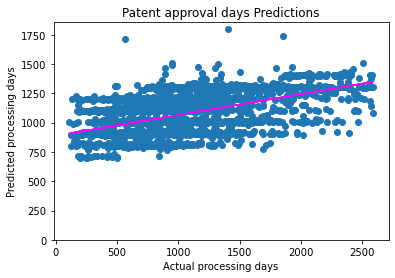

In [ ]:


%matplotlib inline

plt.scatter(y_test,  y_pred_Lar)
plt.xlabel('Actual processing days')
plt.ylabel('Predicted processing days')
plt.title('Patent approval days Predictions')
plt.ylim(ymin=0)
# overlay the regression line
z = np.polyfit(y_test,y_pred_Lar, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred_Lar)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred_Lar)
print("R2:", r2)

MSE: 204370.87074407292
RMSE: 452.0739660100689
R2: 0.23885213786853787


## 8.3. Random Forest Regression<a class="anchor" id="RFC"></a>

In [ ]:
# Create a random forest regressor
rfr = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 42)

# Train the regressor on the training data
rfr.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_rfr = rfr.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred_rfr)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred_rfr)
print("R2:", r2)

MSE: 194586.84180557213
RMSE: 441.1199857244876
R2: 0.27529124820974693


In [ ]:
print('The Training Accuracy is: ', rfr.score(X_train, y_train))
print('The Validation Accuracy is: ', rfr.score(X_test, y_test))

The Training Accuracy is:  0.2797981238101843
The Validation Accuracy is:  0.27529124820974693


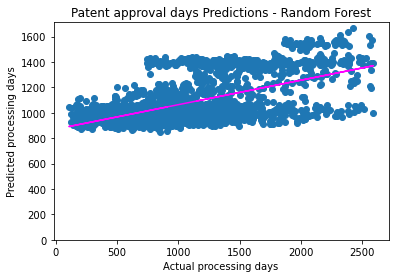

In [ ]:

%matplotlib inline

plt.scatter(y_test,  y_pred_rfr)
plt.xlabel('Actual processing days')
plt.ylabel('Predicted processing days')
plt.title('Patent approval days Predictions - Random Forest')
plt.ylim(ymin=0)
# overlay the regression line
z = np.polyfit(y_test,y_pred_rfr, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


## 8.4. XGBoost <a class="anchor" id="XGB"></a>

In [ ]:
XGBreg = xg.XGBRegressor(random_state=42)

In [ ]:
XGBreg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_pred_XGB = XGBreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred_XGB)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred_XGB)
print("R2:", r2)

MSE: 160289.75462993115
RMSE: 400.3620294557554
R2: 0.40302547220180573


In [ ]:
print('The Training Accuracy is: ', XGBreg.score(X_train, y_train))
print('The Validation Accuracy is: ', XGBreg.score(X_test, y_test))

The Training Accuracy is:  0.7091345015235051
The Validation Accuracy is:  0.40302547220180573


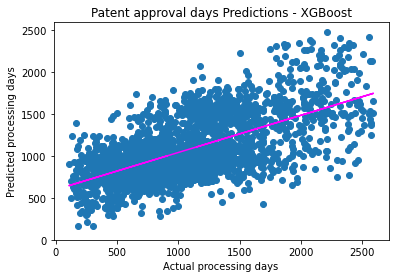

In [ ]:
%matplotlib inline

plt.scatter(y_test, y_pred_XGB)
plt.xlabel('Actual processing days')
plt.ylabel('Predicted processing days')
plt.title('Patent approval days Predictions - XGBoost')
plt.ylim(ymin=0)
# overlay the regression line
z = np.polyfit(y_test,y_pred_XGB, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## 8.5. Optimum Model <a class="anchor" id="XGBoost_optimum"></a>

### 8.5.1. GridSearch <a class="anchor" id="Gridsearch"></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

In [ ]:
## Define Grid 
grid = { 
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
    'max_depth' : [3,4,5,6,7, 8, 9,10],
    'max_leaves': [0,1,2,3,4,5],
    'learning_rate' : [ 0.001, 0.01,0.05,0.1,0.2,0.3],
    'subsample':[0.6,0.7,0.8,1],
    'colsample_bytree': [0.5,0.6,0.7,0.8,0.9,1] }  

mse = make_scorer(mean_squared_error,greater_is_better=False)
## Grid Search function
CV_GBreg = RandomizedSearchCV(xg.XGBRegressor(random_state=42), grid, n_iter=10000, verbose = 3, cv= 3, n_jobs=-1,refit=False, scoring=mse)
CV_GBreg.fit(X_train, y_train)
print(CV_GBreg.best_params_)


Fitting 3 folds for each of 10000 candidates, totalling 30000 fits
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, max_leaves=2, n_estimators=700, subsample=0.7;, score=-166884.547 total time=   7.3s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=1000, subsample=0.6;, score=-344375.807 total time=  14.1s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=9, max_leaves=4, n_estimators=100, subsample=0.6;, score=-160755.344 total time=   3.2s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=8, max_leaves=0, n_estimators=200, subsample=1;, score=-1044580.124 total time=   4.9s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, max_leaves=5, n_estimators=900, subsample=1;, score=-195313.357 total time=  13.4s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, max_leaves=1, n_estimators=700, subsample=1;, score=-152450.768 total time=  10.2s
[CV 1/3] END colsample

[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, max_leaves=2, n_estimators=700, subsample=0.7;, score=-157470.922 total time=   7.4s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, max_leaves=2, n_estimators=300, subsample=0.8;, score=-201361.695 total time=   5.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, max_leaves=2, n_estimators=300, subsample=0.8;, score=-198631.292 total time=   5.3s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=9, max_leaves=4, n_estimators=100, subsample=0.6;, score=-173098.694 total time=   3.7s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=8, max_leaves=0, n_estimators=200, subsample=0.8;, score=-180225.540 total time=   6.2s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=8, max_leaves=0, n_estimators=200, subsample=1;, score=-999872.895 total time=   4.4s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, max_leaves=1, n_estimato

[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=6, max_leaves=4, n_estimators=500, subsample=0.7;, score=-155452.582 total time=   5.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, max_leaves=3, n_estimators=900, subsample=0.6;, score=-181780.375 total time=  22.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.001, max_depth=9, max_leaves=2, n_estimators=900, subsample=0.8;, score=-364026.764 total time=  26.8s
[CV 1/3] END colsample_bytree=1, learning_rate=0.3, max_depth=7, max_leaves=1, n_estimators=100, subsample=0.6;, score=-194315.833 total time=   2.4s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, max_leaves=1, n_estimators=500, subsample=1;, score=-160751.813 total time=   6.1s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=8, max_leaves=2, n_estimators=800, subsample=0.8;, score=-432175.756 total time=  14.1s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, max_leaves=3, n_est

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=8, max_leaves=2, n_estimators=300, subsample=0.6;, score=-889293.265 total time=   6.7s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=6, max_leaves=5, n_estimators=500, subsample=0.7;, score=-188300.917 total time=   9.7s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=7, max_leaves=2, n_estimators=1000, subsample=0.8;, score=-201020.729 total time=  23.0s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, max_leaves=1, n_estimators=200, subsample=0.8;, score=-190852.308 total time=   3.6s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=6, max_leaves=4, n_estimators=900, subsample=1;, score=-193668.520 total time=  15.4s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, max_leaves=3, n_estimators=1000, subsample=0.7;, score=-175749.568 total time=  13.0s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, max_leaves=5, n_estimat

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, max_leaves=2, n_estimators=700, subsample=0.7;, score=-168733.723 total time=   7.3s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=1000, subsample=0.6;, score=-343266.830 total time=  14.2s
[CV 1/3] END colsample_bytree=1, learning_rate=0.2, max_depth=8, max_leaves=0, n_estimators=200, subsample=0.8;, score=-185195.187 total time=   6.2s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=8, max_leaves=0, n_estimators=200, subsample=1;, score=-1003008.878 total time=   4.4s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, max_leaves=5, n_estimators=900, subsample=1;, score=-187229.349 total time=  13.6s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, max_leaves=1, n_estimators=1000, subsample=0.7;, score=-183028.428 total time=  20.7s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, max_leaves=1, n_esti

[CV 2/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, max_leaves=5, n_estimators=300, subsample=0.6;, score=-166185.878 total time=   3.4s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, max_leaves=5, n_estimators=300, subsample=0.6;, score=-163908.966 total time=   3.4s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, max_leaves=1, n_estimators=100, subsample=0.6;, score=-1231869.442 total time=   1.3s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, max_leaves=1, n_estimators=100, subsample=0.6;, score=-1187305.390 total time=   1.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, max_leaves=1, n_estimators=100, subsample=0.6;, score=-1183987.706 total time=   1.4s
[CV 1/3] END colsample_bytree=1, learning_rate=0.2, max_depth=7, max_leaves=1, n_estimators=500, subsample=0.8;, score=-191137.991 total time=  11.4s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, max_leaves=

[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, max_leaves=5, n_estimators=900, subsample=0.7;, score=-368882.790 total time=  17.9s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, max_leaves=4, n_estimators=300, subsample=1;, score=-163431.801 total time=   3.5s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, max_leaves=4, n_estimators=300, subsample=1;, score=-155043.605 total time=   3.5s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=4, max_leaves=0, n_estimators=300, subsample=0.6;, score=-863476.764 total time=   2.3s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, max_leaves=2, n_estimators=1000, subsample=1;, score=-194475.828 total time=  14.1s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=8, max_leaves=5, n_estimators=400, subsample=1;, score=-182863.956 total time=  10.8s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, max_leaves=1, n_estimator

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, max_leaves=1, n_estimators=200, subsample=0.8;, score=-183436.281 total time=   5.6s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, max_leaves=3, n_estimators=500, subsample=0.8;, score=-174264.913 total time=   3.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, max_leaves=3, n_estimators=500, subsample=0.8;, score=-174160.656 total time=   3.4s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, max_leaves=0, n_estimators=200, subsample=1;, score=-166337.312 total time=   4.5s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, max_leaves=5, n_estimators=200, subsample=0.6;, score=-185410.621 total time=   2.5s
[CV 1/3] END colsample_bytree=1, learning_rate=0.01, max_depth=8, max_leaves=2, n_estimators=500, subsample=0.7;, score=-158578.728 total time=  13.1s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, max_leaves=0, n_estima

[CV 1/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, max_leaves=2, n_estimators=300, subsample=1;, score=-183957.807 total time=   4.4s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, max_leaves=2, n_estimators=300, subsample=1;, score=-175941.895 total time=   4.3s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=4, max_leaves=4, n_estimators=800, subsample=0.8;, score=-423452.824 total time=   9.2s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, max_leaves=3, n_estimators=500, subsample=0.8;, score=-206963.455 total time=   9.8s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, max_leaves=0, n_estimators=200, subsample=1;, score=-169500.640 total time=   4.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, max_leaves=5, n_estimators=200, subsample=0.6;, score=-192821.042 total time=   2.7s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=8, max_leaves=3, n_estimators

[CV 1/3] END colsample_bytree=1, learning_rate=0.01, max_depth=6, max_leaves=2, n_estimators=400, subsample=0.7;, score=-158483.229 total time=   7.7s
[CV 3/3] END colsample_bytree=1, learning_rate=0.01, max_depth=6, max_leaves=2, n_estimators=400, subsample=0.7;, score=-151292.732 total time=   7.9s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, max_leaves=2, n_estimators=200, subsample=0.6;, score=-156721.406 total time=   3.0s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, max_leaves=3, n_estimators=400, subsample=0.7;, score=-153210.325 total time=  10.1s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, max_leaves=2, n_estimators=200, subsample=1;, score=-195158.434 total time=   2.9s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, max_leaves=2, n_estimators=200, subsample=1;, score=-184314.191 total time=   3.1s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, max_leaves=5, n_estima

[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, max_leaves=1, n_estimators=200, subsample=0.8;, score=-182335.360 total time=   5.0s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, max_leaves=1, n_estimators=200, subsample=0.8;, score=-181743.167 total time=   4.9s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, max_leaves=2, n_estimators=700, subsample=1;, score=-480145.901 total time=  15.8s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=600, subsample=0.7;, score=-158902.446 total time=   3.7s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=5, max_leaves=2, n_estimators=1000, subsample=0.8;, score=-170620.229 total time=  16.1s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, max_leaves=0, n_estimators=400, subsample=0.8;, score=-161629.261 total time=   4.9s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, max_leaves=4, n_es

[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, max_leaves=1, n_estimators=300, subsample=1;, score=-159637.032 total time=   2.3s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, max_leaves=5, n_estimators=100, subsample=0.6;, score=-172878.521 total time=   1.7s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=4, max_leaves=4, n_estimators=800, subsample=0.7;, score=-196752.056 total time=  10.2s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, max_leaves=3, n_estimators=300, subsample=1;, score=-175941.895 total time=   4.3s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, max_leaves=2, n_estimators=100, subsample=0.8;, score=-162801.834 total time=   1.2s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, max_leaves=2, n_estimators=100, subsample=0.8;, score=-159640.341 total time=   1.2s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, max_leaves=2, n_estimators

[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, max_leaves=2, n_estimators=100, subsample=1;, score=-342380.464 total time=   1.6s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, max_leaves=5, n_estimators=800, subsample=1;, score=-171876.940 total time=   9.2s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, max_leaves=5, n_estimators=800, subsample=1;, score=-171016.922 total time=   9.2s
[CV 3/3] END colsample_bytree=1, learning_rate=0.001, max_depth=6, max_leaves=0, n_estimators=600, subsample=0.6;, score=-535618.591 total time=  11.2s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, max_leaves=4, n_estimators=500, subsample=0.8;, score=-181018.842 total time=   9.8s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, max_leaves=4, n_estimators=500, subsample=0.8;, score=-176526.870 total time=   9.8s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, max_leaves=4, n_estimators

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, max_leaves=4, n_estimators=700, subsample=1;, score=-176144.734 total time=  11.0s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, max_leaves=4, n_estimators=300, subsample=0.7;, score=-168928.817 total time=   2.3s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=9, max_leaves=0, n_estimators=900, subsample=0.8;, score=-185694.854 total time=  16.2s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=4, n_estimators=300, subsample=0.8;, score=-887726.464 total time=   5.1s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=4, n_estimators=300, subsample=0.8;, score=-849895.319 total time=   5.1s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=4, n_estimators=300, subsample=0.8;, score=-848544.635 total time=   5.2s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=4, n_

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, max_leaves=5, n_estimators=200, subsample=1;, score=-1004132.167 total time=   1.7s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=4, max_leaves=5, n_estimators=200, subsample=0.6;, score=-187341.896 total time=   2.5s
[CV 3/3] END colsample_bytree=1, learning_rate=0.001, max_depth=5, max_leaves=5, n_estimators=700, subsample=0.8;, score=-470084.390 total time=  11.2s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, max_leaves=5, n_estimators=300, subsample=0.7;, score=-158844.153 total time=   2.4s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, max_leaves=0, n_estimators=600, subsample=0.8;, score=-165405.083 total time=   5.4s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=200, subsample=0.6;, score=-155727.207 total time=   2.6s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, max_leaves=3, n_esti

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=8, max_leaves=3, n_estimators=1000, subsample=0.8;, score=-206906.019 total time=  23.8s
[CV 1/3] END colsample_bytree=1, learning_rate=0.2, max_depth=10, max_leaves=5, n_estimators=400, subsample=1;, score=-179466.555 total time=  13.5s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=8, max_leaves=4, n_estimators=300, subsample=1;, score=-853787.876 total time=   5.8s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, max_leaves=4, n_estimators=900, subsample=1;, score=-172240.956 total time=  23.7s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=0, n_estimators=200, subsample=0.7;, score=-1001839.230 total time=   3.4s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=3, n_estimators=200, subsample=0.6;, score=-170475.351 total time=   3.9s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, max_leaves=4, n_e

[CV 3/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, max_leaves=1, n_estimators=1000, subsample=0.7;, score=-198431.931 total time=  19.1s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=700, subsample=0.8;, score=-155460.894 total time=   8.7s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, max_leaves=1, n_estimators=200, subsample=0.7;, score=-185219.822 total time=   3.4s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, max_leaves=1, n_estimators=200, subsample=0.7;, score=-183869.101 total time=   3.3s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, max_leaves=1, n_estimators=200, subsample=0.7;, score=-178088.377 total time=   3.5s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, max_leaves=4, n_estimators=700, subsample=0.6;, score=-490912.659 total time=  14.2s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, max_leaves=5, n

[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=400, subsample=0.6;, score=-159719.090 total time=   3.1s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=400, subsample=0.6;, score=-157867.803 total time=   3.0s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=400, subsample=0.6;, score=-155886.494 total time=   3.0s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, max_leaves=3, n_estimators=300, subsample=0.7;, score=-178431.275 total time=   2.5s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, max_leaves=3, n_estimators=300, subsample=0.7;, score=-174875.504 total time=   2.4s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, max_leaves=3, n_estimators=300, subsample=0.7;, score=-172072.437 total time=   2.4s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, max_leaves=3,

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=8, max_leaves=2, n_estimators=1000, subsample=0.7;, score=-377889.523 total time=  15.2s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=8, max_leaves=2, n_estimators=1000, subsample=0.7;, score=-353564.119 total time=  15.5s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=4, max_leaves=5, n_estimators=900, subsample=0.8;, score=-154811.825 total time=   8.7s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=400, subsample=0.8;, score=-162243.644 total time=   2.6s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=400, subsample=0.8;, score=-159193.144 total time=   2.5s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=400, subsample=0.8;, score=-155545.552 total time=   2.5s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, max_leaves=

[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=5, max_leaves=3, n_estimators=900, subsample=0.8;, score=-158632.199 total time=  14.4s
[CV 1/3] END colsample_bytree=1, learning_rate=0.2, max_depth=8, max_leaves=1, n_estimators=500, subsample=0.8;, score=-191756.901 total time=  13.3s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=300, subsample=0.8;, score=-153954.650 total time=   2.8s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, max_leaves=2, n_estimators=700, subsample=0.6;, score=-182057.905 total time=  15.5s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=6, max_leaves=5, n_estimators=200, subsample=0.6;, score=-1007817.643 total time=   2.7s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, max_leaves=5, n_estimators=500, subsample=0.7;, score=-166805.588 total time=   6.6s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=5, max_leaves=5, n_estim

[CV 1/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=500, subsample=1;, score=-660040.241 total time=   6.7s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=500, subsample=1;, score=-628159.457 total time=   6.6s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=9, max_leaves=4, n_estimators=400, subsample=0.6;, score=-162749.718 total time=   7.1s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=100, subsample=1;, score=-170693.062 total time=   0.6s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=100, subsample=1;, score=-169895.409 total time=   0.6s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=100, subsample=1;, score=-166614.864 total time=   0.6s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=5, max_leaves=4, n_estimator

[CV 2/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, max_leaves=2, n_estimators=100, subsample=1;, score=-169372.310 total time=   2.5s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, max_leaves=2, n_estimators=100, subsample=1;, score=-165652.051 total time=   2.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, max_leaves=3, n_estimators=300, subsample=0.8;, score=-155134.084 total time=   3.3s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=10, max_leaves=1, n_estimators=900, subsample=0.8;, score=-179707.652 total time=  31.1s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, max_leaves=3, n_estimators=800, subsample=0.6;, score=-434860.822 total time=  15.4s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, max_leaves=0, n_estimators=500, subsample=0.6;, score=-167982.917 total time=   8.3s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, max_leaves=0, n_estima

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, max_leaves=1, n_estimators=100, subsample=0.8;, score=-355404.209 total time=   1.4s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, max_leaves=1, n_estimators=100, subsample=0.8;, score=-336347.393 total time=   1.4s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, max_leaves=1, n_estimators=100, subsample=0.8;, score=-336020.846 total time=   1.4s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, max_leaves=3, n_estimators=600, subsample=0.6;, score=-158731.502 total time=  10.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=3, max_leaves=4, n_estimators=200, subsample=0.8;, score=-160334.197 total time=   2.0s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, max_leaves=2, n_estimators=800, subsample=0.7;, score=-188088.728 total time=  20.2s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, max_leaves=5, n_e

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=9, max_leaves=5, n_estimators=600, subsample=0.6;, score=-176606.117 total time=  10.6s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=8, max_leaves=1, n_estimators=500, subsample=0.8;, score=-185886.715 total time=  13.2s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, max_leaves=2, n_estimators=700, subsample=0.6;, score=-175085.311 total time=  15.5s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=3, max_leaves=1, n_estimators=200, subsample=1;, score=-159726.412 total time=   2.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=3, max_leaves=1, n_estimators=200, subsample=1;, score=-152563.068 total time=   2.1s
[CV 1/3] END colsample_bytree=1, learning_rate=0.05, max_depth=5, max_leaves=5, n_estimators=800, subsample=1;, score=-164304.790 total time=  13.1s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=800, 

[CV 2/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, max_leaves=0, n_estimators=500, subsample=0.6;, score=-641039.897 total time=   5.2s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=8, max_leaves=1, n_estimators=700, subsample=0.8;, score=-192334.894 total time=  18.7s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=8, max_leaves=1, n_estimators=500, subsample=1;, score=-192463.144 total time=  11.6s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, max_leaves=2, n_estimators=900, subsample=0.7;, score=-191319.508 total time=  20.1s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, max_leaves=0, n_estimators=900, subsample=0.8;, score=-396085.263 total time=  16.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, max_leaves=3, n_estimators=600, subsample=0.6;, score=-206755.598 total time=  14.5s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, max_leaves=4, n_estim

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, max_leaves=2, n_estimators=1000, subsample=0.7;, score=-167392.506 total time=   6.1s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=8, max_leaves=1, n_estimators=500, subsample=1;, score=-195158.088 total time=  11.7s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, max_leaves=2, n_estimators=900, subsample=0.7;, score=-186890.401 total time=  20.2s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, max_leaves=3, n_estimators=600, subsample=0.6;, score=-212926.248 total time=  14.7s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, max_leaves=0, n_estimators=300, subsample=1;, score=-162129.525 total time=   4.5s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=7, max_leaves=2, n_estimators=300, subsample=1;, score=-904365.883 total time=   4.1s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=7, max_leaves=2, n_estima

[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, max_leaves=4, n_estimators=700, subsample=0.8;, score=-173769.390 total time=  11.1s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, max_leaves=1, n_estimators=600, subsample=0.8;, score=-201362.322 total time=  12.2s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, max_leaves=2, n_estimators=200, subsample=0.6;, score=-210575.807 total time=   5.0s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, max_leaves=1, n_estimators=500, subsample=0.7;, score=-194277.776 total time=  10.2s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, max_leaves=1, n_estimators=300, subsample=1;, score=-151068.098 total time=   3.8s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, max_leaves=4, n_estimators=600, subsample=0.6;, score=-589959.202 total time=   4.0s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, max_leaves=4, n_e

[CV 1/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, max_leaves=1, n_estimators=400, subsample=0.6;, score=-769805.806 total time=   3.3s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, max_leaves=0, n_estimators=500, subsample=0.6;, score=-672451.775 total time=   5.2s
[CV 2/3] END colsample_bytree=1, learning_rate=0.3, max_depth=8, max_leaves=1, n_estimators=700, subsample=0.8;, score=-199533.552 total time=  18.6s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, max_leaves=2, n_estimators=1000, subsample=0.7;, score=-158273.274 total time=   6.2s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, max_leaves=2, n_estimators=900, subsample=0.7;, score=-194838.563 total time=  20.2s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, max_leaves=2, n_estimators=200, subsample=0.7;, score=-182171.666 total time=   4.8s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, max_leaves=5, n_

[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, max_leaves=1, n_estimators=200, subsample=0.7;, score=-184802.611 total time=   3.9s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, max_leaves=4, n_estimators=600, subsample=0.6;, score=-150063.691 total time=  10.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=7, max_leaves=0, n_estimators=800, subsample=0.8;, score=-182055.698 total time=  18.7s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, max_leaves=5, n_estimators=1000, subsample=0.6;, score=-171509.394 total time=  13.5s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=7, max_leaves=2, n_estimators=600, subsample=1;, score=-158477.161 total time=  13.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, max_leaves=4, n_estimators=700, subsample=0.8;, score=-168443.976 total time=   9.5s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=7, max_leaves=3, n_estimat

[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, max_leaves=3, n_estimators=100, subsample=1;, score=-150088.637 total time=   2.1s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, max_leaves=0, n_estimators=900, subsample=0.8;, score=-173402.766 total time=   6.9s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, max_leaves=5, n_estimators=800, subsample=0.6;, score=-158863.002 total time=   5.9s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=3, max_leaves=0, n_estimators=600, subsample=0.7;, score=-164340.701 total time=   5.9s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=3, max_leaves=0, n_estimators=600, subsample=0.7;, score=-159715.061 total time=   5.8s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, max_leaves=4, n_estimators=900, subsample=0.7;, score=-176852.456 total time=  10.7s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, max_leaves=0, n_estimator

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, max_leaves=2, n_estimators=600, subsample=0.6;, score=-150274.794 total time=  11.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=5, max_leaves=5, n_estimators=1000, subsample=0.7;, score=-181858.551 total time=  15.9s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=7, max_leaves=4, n_estimators=900, subsample=0.7;, score=-393625.448 total time=  11.9s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=5, max_leaves=5, n_estimators=1000, subsample=0.8;, score=-159700.291 total time=  16.1s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, max_leaves=2, n_estimators=900, subsample=0.6;, score=-163328.183 total time=   7.8s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, max_leaves=2, n_estimators=900, subsample=0.6;, score=-160014.247 total time=   7.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=8, max_leaves=5, n

[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, max_leaves=3, n_estimators=300, subsample=0.7;, score=-165506.412 total time=   4.7s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, max_leaves=3, n_estimators=300, subsample=0.7;, score=-160706.241 total time=   4.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=8, max_leaves=5, n_estimators=800, subsample=0.6;, score=-467694.539 total time=  11.8s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=8, max_leaves=5, n_estimators=800, subsample=0.6;, score=-441497.852 total time=  11.8s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=6, max_leaves=1, n_estimators=500, subsample=1;, score=-151912.430 total time=   9.8s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, max_leaves=0, n_estimators=900, subsample=1;, score=-179181.164 total time=  19.9s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, max_leaves=5, n_esti

[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, max_leaves=5, n_estimators=1000, subsample=0.8;, score=-182346.586 total time=  13.1s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, max_leaves=5, n_estimators=1000, subsample=0.8;, score=-179671.880 total time=  13.0s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, max_leaves=1, n_estimators=100, subsample=0.7;, score=-340044.590 total time=   1.7s
[CV 1/3] END colsample_bytree=1, learning_rate=0.05, max_depth=7, max_leaves=2, n_estimators=900, subsample=0.8;, score=-173238.348 total time=  20.5s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=3, max_leaves=3, n_estimators=900, subsample=0.7;, score=-157525.805 total time=   8.8s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, max_leaves=4, n_estimators=200, subsample=0.7;, score=-166176.906 total time=   5.3s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=9, max_leaves=3, n_estima

[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, max_leaves=1, n_estimators=600, subsample=0.7;, score=-166348.966 total time=   9.4s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, max_leaves=1, n_estimators=600, subsample=0.7;, score=-161744.524 total time=   9.4s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, max_leaves=1, n_estimators=600, subsample=0.7;, score=-156693.473 total time=   9.4s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, max_leaves=0, n_estimators=500, subsample=0.6;, score=-184933.482 total time=   9.7s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=8, max_leaves=0, n_estimators=800, subsample=0.6;, score=-201735.754 total time=  14.1s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, max_leaves=0, n_estimators=300, subsample=0.8;, score=-170284.864 total time=   3.2s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, max_leaves=5, n_es

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=10, max_leaves=1, n_estimators=800, subsample=0.6;, score=-215177.041 total time=  16.2s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, max_leaves=3, n_estimators=1000, subsample=0.8;, score=-173549.189 total time=  14.4s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=7, max_leaves=3, n_estimators=900, subsample=1;, score=-183996.512 total time=  20.6s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=8, max_leaves=4, n_estimators=900, subsample=0.7;, score=-369134.329 total time=  20.7s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, max_leaves=1, n_estimators=1000, subsample=0.8;, score=-177566.111 total time=  22.4s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, max_leaves=5, n_estimators=500, subsample=0.7;, score=-198915.533 total time=   9.8s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=4, max_leaves=3, n_es

[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, max_leaves=1, n_estimators=400, subsample=1;, score=-159515.036 total time=   5.4s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=600, subsample=0.6;, score=-164947.370 total time=   8.3s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, max_leaves=5, n_estimators=600, subsample=0.7;, score=-154550.719 total time=   9.2s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, max_leaves=2, n_estimators=900, subsample=1;, score=-176523.539 total time=  19.2s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, max_leaves=2, n_estimators=1000, subsample=0.8;, score=-187760.251 total time=   9.0s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, max_leaves=2, n_estimators=1000, subsample=0.8;, score=-183174.726 total time=   9.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.3, max_depth=9, max_leaves=1, n_estimat

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=8, max_leaves=5, n_estimators=600, subsample=0.6;, score=-545921.875 total time=  12.3s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, max_leaves=3, n_estimators=400, subsample=0.7;, score=-166884.817 total time=   9.1s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, max_leaves=5, n_estimators=100, subsample=0.8;, score=-372071.924 total time=   1.3s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, max_leaves=5, n_estimators=100, subsample=0.8;, score=-350143.640 total time=   1.3s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, max_leaves=5, n_estimators=100, subsample=0.8;, score=-349063.898 total time=   1.3s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, max_leaves=4, n_estimators=100, subsample=1;, score=-358433.302 total time=   1.1s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, max_leaves=4, 

[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, max_leaves=5, n_estimators=800, subsample=0.8;, score=-178454.442 total time=  11.6s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, max_leaves=5, n_estimators=800, subsample=0.8;, score=-175736.730 total time=  11.5s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=10, max_leaves=3, n_estimators=400, subsample=0.7;, score=-203783.476 total time=   8.2s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, max_leaves=1, n_estimators=400, subsample=1;, score=-731317.588 total time=   9.2s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, max_leaves=2, n_estimators=600, subsample=0.7;, score=-559461.552 total time=  13.0s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, max_leaves=3, n_estimators=400, subsample=1;, score=-184230.921 total time=   9.0s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, max_leaves=4, n_es

[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=200, subsample=1;, score=-156035.396 total time=   2.0s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, max_leaves=3, n_estimators=1000, subsample=1;, score=-369004.642 total time=  22.6s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, max_leaves=5, n_estimators=500, subsample=0.6;, score=-189895.659 total time=  11.0s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, max_leaves=5, n_estimators=500, subsample=0.8;, score=-163330.281 total time=  11.5s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, max_leaves=0, n_estimators=500, subsample=0.8;, score=-635652.646 total time=   5.9s
[CV 1/3] END colsample_bytree=1, learning_rate=0.3, max_depth=6, max_leaves=5, n_estimators=900, subsample=1;, score=-198649.454 total time=  17.5s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, max_leaves=0, n_estim

[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, max_leaves=5, n_estimators=600, subsample=0.7;, score=-159053.117 total time=   9.1s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=9, max_leaves=0, n_estimators=200, subsample=0.6;, score=-176866.073 total time=   5.9s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, max_leaves=2, n_estimators=900, subsample=1;, score=-177219.724 total time=  19.1s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=8, max_leaves=2, n_estimators=1000, subsample=1;, score=-158188.751 total time=  26.6s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=9, max_leaves=1, n_estimators=800, subsample=0.6;, score=-203275.892 total time=  24.0s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=1, n_estimators=700, subsample=0.7;, score=-499102.564 total time=  11.8s
[CV 1/3] END colsample_bytree=1, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, max_leaves=2, n_estimators=800, subsample=0.8;, score=-171878.402 total time=  17.4s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, max_leaves=4, n_estimators=400, subsample=1;, score=-152372.752 total time=   3.7s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=6, max_leaves=2, n_estimators=1000, subsample=1;, score=-360148.552 total time=  14.8s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=8, max_leaves=3, n_estimators=500, subsample=1;, score=-182428.613 total time=  13.1s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=6, max_leaves=5, n_estimators=700, subsample=1;, score=-473488.646 total time=  11.2s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, max_leaves=4, n_estimators=100, subsample=0.8;, score=-167596.961 total time=   0.8s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, max_leaves=4, n_estimato

[CV 3/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=10, max_leaves=0, n_estimators=200, subsample=1;, score=-1010671.681 total time=   3.5s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, max_leaves=2, n_estimators=400, subsample=0.8;, score=-181084.561 total time=  12.1s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=8, max_leaves=2, n_estimators=200, subsample=0.7;, score=-1004897.309 total time=   3.7s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, max_leaves=1, n_estimators=1000, subsample=1;, score=-177999.265 total time=  13.2s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, max_leaves=0, n_estimators=400, subsample=0.6;, score=-165970.468 total time=   3.2s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, max_leaves=4, n_estimators=200, subsample=1;, score=-1042756.604 total time=   1.8s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, max_leaves=4,

[CV 3/3] END colsample_bytree=1, learning_rate=0.2, max_depth=7, max_leaves=2, n_estimators=300, subsample=1;, score=-170080.342 total time=   6.9s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=100, subsample=0.7;, score=-1230424.442 total time=   1.4s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=100, subsample=0.7;, score=-1185929.884 total time=   1.4s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=100, subsample=0.7;, score=-1182791.044 total time=   1.4s
[CV 1/3] END colsample_bytree=1, learning_rate=0.3, max_depth=7, max_leaves=1, n_estimators=100, subsample=1;, score=-177478.252 total time=   2.3s
[CV 2/3] END colsample_bytree=1, learning_rate=0.3, max_depth=7, max_leaves=1, n_estimators=100, subsample=1;, score=-171812.894 total time=   2.3s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=7, max_leaves=1, n_estimators

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, max_leaves=2, n_estimators=800, subsample=0.7;, score=-153873.931 total time=  22.3s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, max_leaves=0, n_estimators=100, subsample=1;, score=-175414.285 total time=   1.9s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, max_leaves=0, n_estimators=100, subsample=1;, score=-171552.287 total time=   1.9s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=5, max_leaves=2, n_estimators=300, subsample=0.6;, score=-903958.492 total time=   2.8s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=5, max_leaves=2, n_estimators=300, subsample=0.6;, score=-862830.073 total time=   2.9s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, max_leaves=4, n_estimators=300, subsample=0.8;, score=-171784.733 total time=   4.3s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, max_leaves=5, n_estim

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, max_leaves=2, n_estimators=700, subsample=1;, score=-166695.606 total time=   9.4s
[CV 2/3] END colsample_bytree=1, learning_rate=0.001, max_depth=4, max_leaves=2, n_estimators=900, subsample=0.8;, score=-372751.115 total time=  11.5s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=8, max_leaves=1, n_estimators=1000, subsample=0.8;, score=-174813.546 total time=  26.4s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, max_leaves=5, n_estimators=300, subsample=1;, score=-157345.439 total time=   5.2s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, max_leaves=4, n_estimators=700, subsample=1;, score=-159339.493 total time=  14.2s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, max_leaves=1, n_estimators=800, subsample=1;, score=-415914.926 total time=  24.7s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=7, max_leaves=2, n_estimators

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, max_leaves=1, n_estimators=200, subsample=1;, score=-182878.059 total time=   4.8s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, max_leaves=1, n_estimators=200, subsample=0.6;, score=-166487.769 total time=   3.1s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, max_leaves=1, n_estimators=200, subsample=0.6;, score=-165070.751 total time=   1.4s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, max_leaves=1, n_estimators=100, subsample=0.7;, score=-1187335.817 total time=   1.8s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, max_leaves=0, n_estimators=200, subsample=0.7;, score=-159009.435 total time=   2.8s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, max_leaves=0, n_estimators=200, subsample=0.7;, score=-155073.232 total time=   2.9s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, max_leaves=0, n_e

[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, max_leaves=5, n_estimators=400, subsample=0.7;, score=-156746.698 total time=   6.1s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, max_leaves=3, n_estimators=900, subsample=0.7;, score=-158980.189 total time=   8.2s
[CV 2/3] END colsample_bytree=1, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=500, subsample=0.6;, score=-157696.400 total time=   6.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, max_leaves=5, n_estimators=700, subsample=0.8;, score=-153990.420 total time=  23.1s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, max_leaves=5, n_estimators=1000, subsample=0.7;, score=-349037.755 total time=  24.5s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=6, max_leaves=0, n_estimators=100, subsample=0.7;, score=-185725.388 total time=   1.9s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=6, max_leaves=0, n

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, max_leaves=1, n_estimators=500, subsample=0.6;, score=-635893.142 total time=   4.1s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, max_leaves=2, n_estimators=600, subsample=0.6;, score=-161983.889 total time=  14.8s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, max_leaves=2, n_estimators=800, subsample=0.7;, score=-166668.024 total time=   9.5s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, max_leaves=4, n_estimators=400, subsample=0.8;, score=-154454.198 total time=   3.5s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, max_leaves=2, n_estimators=600, subsample=0.6;, score=-178228.870 total time=  17.9s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, max_leaves=1, n_estimators=700, subsample=0.6;, score=-198955.981 total time=   8.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.3, max_depth=3, max_leaves=4, n_e

[CV 3/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, max_leaves=1, n_estimators=100, subsample=1;, score=-325995.926 total time=   3.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.2, max_depth=3, max_leaves=3, n_estimators=1000, subsample=0.8;, score=-170260.069 total time=  11.2s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, max_leaves=1, n_estimators=600, subsample=0.7;, score=-172130.191 total time=  17.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, max_leaves=1, n_estimators=900, subsample=0.7;, score=-150523.573 total time=  14.4s
[CV 2/3] END colsample_bytree=1, learning_rate=0.001, max_depth=5, max_leaves=1, n_estimators=900, subsample=0.8;, score=-367582.657 total time=  17.5s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, max_leaves=3, n_estimators=800, subsample=0.8;, score=-197923.543 total time=  13.7s
[CV 1/3] END colsample_bytree=1, learning_rate=0.001, max_depth=5, max_leaves=1, n_estim

[CV 1/3] END colsample_bytree=1, learning_rate=0.001, max_depth=8, max_leaves=0, n_estimators=700, subsample=0.8;, score=-491272.610 total time=  26.8s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=7, max_leaves=2, n_estimators=500, subsample=1;, score=-173626.279 total time=   7.2s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, max_leaves=5, n_estimators=500, subsample=0.7;, score=-171141.285 total time=   9.5s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, max_leaves=0, n_estimators=200, subsample=0.6;, score=-1043440.437 total time=   4.8s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, max_leaves=0, n_estimators=200, subsample=0.6;, score=-1001019.961 total time=  15.2s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=2, n_estimators=900, subsample=0.7;, score=-161707.209 total time=  22.1s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=2, n

[CV 1/3] END colsample_bytree=1, learning_rate=0.3, max_depth=10, max_leaves=5, n_estimators=1000, subsample=0.7;, score=-202539.143 total time=  41.1s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=10, max_leaves=5, n_estimators=1000, subsample=0.7;, score=-192340.552 total time=  28.4s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, max_leaves=1, n_estimators=800, subsample=0.7;, score=-191296.209 total time=  22.6s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=4, max_leaves=0, n_estimators=1000, subsample=0.7;, score=-379048.037 total time=  10.2s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=6, max_leaves=2, n_estimators=600, subsample=0.6;, score=-175970.860 total time=  14.6s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, max_leaves=0, n_estimators=300, subsample=0.8;, score=-151163.516 total time=   5.3s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, max_leaves=3, n_est

[CV 2/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=900, subsample=0.7;, score=-162872.972 total time=  12.3s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=4, max_leaves=3, n_estimators=800, subsample=0.8;, score=-192935.863 total time=   8.7s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, max_leaves=1, n_estimators=900, subsample=0.6;, score=-404462.351 total time=   8.9s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=6, max_leaves=2, n_estimators=300, subsample=0.7;, score=-861251.091 total time=   7.2s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=3, n_estimators=600, subsample=0.7;, score=-178291.114 total time=  21.0s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, max_leaves=0, n_estimators=600, subsample=1;, score=-175147.167 total time=  26.2s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, max_leaves=3, 

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=10, max_leaves=3, n_estimators=600, subsample=1;, score=-190546.035 total time=  13.0s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, max_leaves=0, n_estimators=900, subsample=0.7;, score=-369053.138 total time=  19.5s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, max_leaves=0, n_estimators=1000, subsample=0.8;, score=-185685.092 total time=  21.1s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, max_leaves=1, n_estimators=1000, subsample=0.6;, score=-183208.465 total time=   8.1s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, max_leaves=1, n_estimators=700, subsample=1;, score=-523916.227 total time=   4.6s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, max_leaves=2, n_estimators=1000, subsample=0.8;, score=-207466.659 total time=  17.2s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=9, max_leaves=5, n_es

[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, max_leaves=5, n_estimators=200, subsample=0.8;, score=-1000209.021 total time=   6.3s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, max_leaves=0, n_estimators=800, subsample=0.7;, score=-164212.768 total time=  26.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, max_leaves=5, n_estimators=1000, subsample=0.8;, score=-197260.822 total time=  21.9s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, max_leaves=3, n_estimators=400, subsample=0.7;, score=-162574.021 total time=   4.6s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=4, n_estimators=700, subsample=1;, score=-172945.785 total time=  15.3s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, max_leaves=4, n_estimators=500, subsample=0.6;, score=-180259.799 total time=  14.2s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, max_leaves=5

[CV 3/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, max_leaves=1, n_estimators=800, subsample=0.7;, score=-195578.559 total time=  19.9s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=8, max_leaves=1, n_estimators=300, subsample=0.7;, score=-208945.009 total time=   7.6s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=8, max_leaves=1, n_estimators=300, subsample=0.7;, score=-202704.831 total time=   7.7s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, max_leaves=3, n_estimators=500, subsample=0.8;, score=-151799.686 total time=  12.3s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, max_leaves=0, n_estimators=900, subsample=0.7;, score=-391763.151 total time=  19.6s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, max_leaves=0, n_estimators=1000, subsample=0.8;, score=-193029.212 total time=  30.3s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=7, max_leaves=0, n_e

[CV 3/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, max_leaves=1, n_estimators=200, subsample=1;, score=-164671.034 total time=   4.6s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, max_leaves=2, n_estimators=200, subsample=0.7;, score=-162111.734 total time=   6.4s
[CV 2/3] END colsample_bytree=1, learning_rate=0.05, max_depth=3, max_leaves=0, n_estimators=500, subsample=0.8;, score=-155727.329 total time=   6.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.001, max_depth=10, max_leaves=5, n_estimators=900, subsample=0.7;, score=-366830.279 total time=  34.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, max_leaves=2, n_estimators=100, subsample=0.8;, score=-163817.917 total time=   2.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=2, n_estimators=500, subsample=1;, score=-160442.150 total time=   3.2s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, max_leaves=2, n_estima

[CV 2/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, max_leaves=2, n_estimators=500, subsample=0.7;, score=-158749.297 total time=   3.8s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, max_leaves=2, n_estimators=500, subsample=0.7;, score=-154032.608 total time=   3.8s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, max_leaves=5, n_estimators=500, subsample=0.8;, score=-165057.686 total time=  14.5s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, max_leaves=0, n_estimators=500, subsample=1;, score=-161944.546 total time=  14.4s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, max_leaves=1, n_estimators=100, subsample=0.7;, score=-168078.896 total time=   0.9s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, max_leaves=1, n_estimators=100, subsample=0.7;, score=-165357.277 total time=   0.9s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, max_leaves=1, n_

[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=9, max_leaves=4, n_estimators=300, subsample=0.7;, score=-181749.431 total time=   9.8s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=9, max_leaves=4, n_estimators=300, subsample=0.7;, score=-168549.912 total time=   9.7s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=6, max_leaves=1, n_estimators=100, subsample=1;, score=-165450.145 total time=   1.2s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=6, max_leaves=1, n_estimators=100, subsample=1;, score=-160285.940 total time=   1.3s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=6, max_leaves=1, n_estimators=100, subsample=1;, score=-154666.409 total time=   1.3s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, max_leaves=3, n_estimators=900, subsample=0.6;, score=-400112.692 total time=   8.6s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=6, max_leaves=1, n_estimators=600

[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, max_leaves=5, n_estimators=700, subsample=1;, score=-162295.447 total time=  10.4s
[CV 3/3] END colsample_bytree=1, learning_rate=0.2, max_depth=5, max_leaves=3, n_estimators=800, subsample=0.7;, score=-188536.356 total time=  15.7s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, max_leaves=1, n_estimators=600, subsample=1;, score=-159005.427 total time=  15.2s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=6, max_leaves=5, n_estimators=900, subsample=0.7;, score=-202781.217 total time=  13.2s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, max_leaves=5, n_estimators=600, subsample=0.7;, score=-552046.030 total time=   8.4s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=6, max_leaves=0, n_estimators=300, subsample=0.6;, score=-187474.664 total time=   9.8s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, max_leaves=5, n_estima

[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, max_leaves=3, n_estimators=700, subsample=1;, score=-470149.962 total time=  19.2s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=0, n_estimators=600, subsample=0.6;, score=-178921.702 total time=  11.9s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=5, max_leaves=1, n_estimators=800, subsample=0.7;, score=-153154.276 total time=  12.8s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, max_leaves=2, n_estimators=900, subsample=0.8;, score=-171464.079 total time=  23.0s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=0, n_estimators=200, subsample=0.8;, score=-999253.553 total time=   3.4s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=6, max_leaves=3, n_estimators=800, subsample=0.6;, score=-220392.383 total time=  13.7s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=6, max_leaves=3, n_e

[CV 3/3] END colsample_bytree=1, learning_rate=0.2, max_depth=3, max_leaves=3, n_estimators=200, subsample=0.8;, score=-156763.234 total time=   2.1s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, max_leaves=4, n_estimators=1000, subsample=0.7;, score=-159848.327 total time=  18.0s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, max_leaves=0, n_estimators=500, subsample=0.8;, score=-184464.037 total time=  11.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.01, max_depth=5, max_leaves=4, n_estimators=300, subsample=0.8;, score=-157589.649 total time=   5.1s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, max_leaves=5, n_estimators=100, subsample=0.7;, score=-372223.406 total time=   1.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, max_leaves=5, n_estimators=100, subsample=0.7;, score=-350745.361 total time=   1.3s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, max_leaves=5, n_est

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, max_leaves=5, n_estimators=300, subsample=0.7;, score=-181698.513 total time=   3.5s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, max_leaves=5, n_estimators=300, subsample=0.7;, score=-171827.585 total time=   3.4s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, max_leaves=3, n_estimators=500, subsample=0.7;, score=-155655.001 total time=   6.6s
[CV 3/3] END colsample_bytree=1, learning_rate=0.2, max_depth=9, max_leaves=3, n_estimators=900, subsample=0.8;, score=-180092.095 total time=  27.4s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, max_leaves=3, n_estimators=500, subsample=0.7;, score=-172101.662 total time=   9.7s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, max_leaves=3, n_estimators=500, subsample=0.7;, score=-161674.526 total time=   9.7s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, max_leaves=3, n_est

[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, max_leaves=2, n_estimators=100, subsample=0.7;, score=-165524.640 total time=   0.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, max_leaves=2, n_estimators=100, subsample=0.7;, score=-164784.308 total time=   0.8s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=4, max_leaves=0, n_estimators=700, subsample=1;, score=-515031.589 total time=   6.1s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, max_leaves=1, n_estimators=1000, subsample=0.6;, score=-154415.550 total time=  14.3s
[CV 2/3] END colsample_bytree=1, learning_rate=0.001, max_depth=9, max_leaves=5, n_estimators=100, subsample=0.7;, score=-1181740.779 total time=   2.8s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=5, max_leaves=5, n_estimators=300, subsample=0.6;, score=-866028.696 total time=   2.8s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=10, max_leaves=1, n

[CV 1/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, max_leaves=1, n_estimators=1000, subsample=0.7;, score=-159848.327 total time=  16.9s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, max_leaves=5, n_estimators=700, subsample=1;, score=-193223.499 total time=   9.4s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=4, max_leaves=0, n_estimators=800, subsample=0.8;, score=-423452.824 total time=   9.2s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, max_leaves=2, n_estimators=900, subsample=0.8;, score=-184997.934 total time=  20.7s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, max_leaves=2, n_estimators=400, subsample=0.8;, score=-159165.051 total time=   8.7s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, max_leaves=4, n_estimators=400, subsample=0.8;, score=-190019.907 total time=   6.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, max_leaves=0, n_

[CV 2/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, max_leaves=4, n_estimators=100, subsample=0.8;, score=-156613.787 total time=   2.1s
[CV 1/3] END colsample_bytree=1, learning_rate=0.01, max_depth=3, max_leaves=0, n_estimators=800, subsample=1;, score=-160702.612 total time=   8.2s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, max_leaves=4, n_estimators=500, subsample=0.6;, score=-207394.038 total time=  11.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, max_leaves=0, n_estimators=900, subsample=0.7;, score=-202448.181 total time=  14.4s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, max_leaves=2, n_estimators=1000, subsample=0.8;, score=-203835.552 total time=  27.9s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, max_leaves=0, n_estimators=500, subsample=0.6;, score=-201115.382 total time=  12.5s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, max_leaves=5, n_estima

[CV 3/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, max_leaves=2, n_estimators=300, subsample=0.6;, score=-188853.842 total time=   6.0s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, max_leaves=3, n_estimators=1000, subsample=1;, score=-169254.961 total time=  17.5s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=8, max_leaves=1, n_estimators=1000, subsample=0.8;, score=-155198.118 total time=  18.1s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, max_leaves=3, n_estimators=700, subsample=0.7;, score=-171970.436 total time=  19.4s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, max_leaves=4, n_estimators=900, subsample=0.7;, score=-381474.593 total time=  22.2s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, max_leaves=4, n_estimators=400, subsample=0.8;, score=-154347.267 total time=   8.8s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, max_leaves=0

[CV 2/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, max_leaves=1, n_estimators=100, subsample=0.7;, score=-162828.738 total time=   0.6s
[CV 1/3] END colsample_bytree=1, learning_rate=0.001, max_depth=7, max_leaves=0, n_estimators=900, subsample=0.7;, score=-385105.426 total time=  20.8s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=600, subsample=0.7;, score=-558053.143 total time=   6.4s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, max_leaves=3, n_estimators=600, subsample=1;, score=-151803.872 total time=   6.6s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=4, max_leaves=1, n_estimators=1000, subsample=0.7;, score=-204055.801 total time=   8.9s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=4, max_leaves=1, n_estimators=1000, subsample=0.7;, score=-197056.845 total time=   8.8s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, max_leaves=1, n_es

[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=5, n_estimators=800, subsample=1;, score=-413936.147 total time=  15.1s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, max_leaves=2, n_estimators=900, subsample=0.6;, score=-213294.259 total time=  26.7s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, max_leaves=1, n_estimators=900, subsample=0.7;, score=-151859.520 total time=  24.5s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, max_leaves=4, n_estimators=900, subsample=0.7;, score=-170707.156 total time=  13.7s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, max_leaves=1, n_estimators=700, subsample=0.7;, score=-163444.974 total time=  12.6s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, max_leaves=1, n_estimators=500, subsample=0.8;, score=-183097.359 total time=  11.3s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, max_leaves=3, n_e

[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=4, max_leaves=2, n_estimators=200, subsample=1;, score=-1007922.293 total time=   2.0s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, max_leaves=3, n_estimators=1000, subsample=0.6;, score=-179812.007 total time=  24.0s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=8, max_leaves=4, n_estimators=800, subsample=0.6;, score=-425703.274 total time=  15.1s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, max_leaves=0, n_estimators=700, subsample=0.8;, score=-179326.341 total time=  13.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, max_leaves=4, n_estimators=400, subsample=0.8;, score=-187129.825 total time=   8.8s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, max_leaves=5, n_estimators=600, subsample=1;, score=-553032.342 total time=  12.0s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, max_leaves=0, n

[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, max_leaves=2, n_estimators=300, subsample=0.7;, score=-169626.532 total time=   6.7s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, max_leaves=2, n_estimators=800, subsample=0.7;, score=-194650.283 total time=  14.9s
[CV 1/3] END colsample_bytree=1, learning_rate=0.001, max_depth=4, max_leaves=2, n_estimators=600, subsample=0.7;, score=-566662.231 total time=   7.7s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, max_leaves=2, n_estimators=400, subsample=0.8;, score=-164494.511 total time=   3.2s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=7, max_leaves=1, n_estimators=300, subsample=0.8;, score=-172559.067 total time=   6.9s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, max_leaves=5, n_estimators=500, subsample=1;, score=-630081.766 total time=   6.6s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=8, max_leaves=4, n_estimat

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=1000, subsample=0.8;, score=-161153.294 total time=   9.7s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=1000, subsample=0.8;, score=-158215.463 total time=   9.6s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, max_leaves=2, n_estimators=600, subsample=0.7;, score=-159404.723 total time=  15.3s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, max_leaves=3, n_estimators=400, subsample=0.7;, score=-151518.644 total time=   7.9s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, max_leaves=4, n_estimators=500, subsample=0.6;, score=-223296.264 total time=  10.9s
[CV 3/3] END colsample_bytree=1, learning_rate=0.001, max_depth=9, max_leaves=5, n_estimators=100, subsample=0.6;, score=-1178951.654 total time=   2.8s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, max_leaves=0, 

[CV 1/3] END colsample_bytree=1, learning_rate=0.3, max_depth=4, max_leaves=1, n_estimators=300, subsample=0.7;, score=-182396.091 total time=   4.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.3, max_depth=4, max_leaves=1, n_estimators=300, subsample=0.7;, score=-181018.997 total time=   4.2s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=4, max_leaves=1, n_estimators=300, subsample=0.7;, score=-176410.793 total time=   4.0s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, max_leaves=5, n_estimators=700, subsample=0.7;, score=-159880.954 total time=  14.6s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, max_leaves=5, n_estimators=700, subsample=1;, score=-169294.456 total time=  12.7s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=8, max_leaves=2, n_estimators=600, subsample=0.8;, score=-548598.264 total time=  12.2s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, max_leaves=4, n_estimators

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, max_leaves=0, n_estimators=700, subsample=0.7;, score=-184727.904 total time=  17.5s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, max_leaves=5, n_estimators=500, subsample=0.7;, score=-186159.586 total time=   7.1s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, max_leaves=5, n_estimators=500, subsample=0.7;, score=-177123.327 total time=   6.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, max_leaves=4, n_estimators=700, subsample=0.7;, score=-168733.723 total time=   6.0s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, max_leaves=4, n_estimators=700, subsample=0.7;, score=-157470.922 total time=   5.9s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, max_leaves=1, n_estimators=1000, subsample=1;, score=-157652.367 total time=   6.5s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, max_leaves=2, n_estim

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, max_leaves=3, n_estimators=600, subsample=0.6;, score=-195076.518 total time=   5.6s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, max_leaves=3, n_estimators=600, subsample=0.6;, score=-191299.715 total time=   6.4s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, max_leaves=3, n_estimators=600, subsample=0.6;, score=-186178.384 total time=   5.0s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=10, max_leaves=0, n_estimators=600, subsample=0.7;, score=-205390.633 total time=  15.1s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, max_leaves=3, n_estimators=300, subsample=0.8;, score=-201163.878 total time=   6.8s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=4, max_leaves=2, n_estimators=500, subsample=0.8;, score=-164064.057 total time=   6.1s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, max_leaves=4, n_e

[CV 1/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, max_leaves=0, n_estimators=900, subsample=0.8;, score=-203833.436 total time=  25.5s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, max_leaves=0, n_estimators=100, subsample=0.6;, score=-162397.750 total time=   2.3s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, max_leaves=0, n_estimators=100, subsample=0.6;, score=-156256.725 total time=   2.2s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, max_leaves=3, n_estimators=300, subsample=0.6;, score=-171787.129 total time=   8.3s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, max_leaves=1, n_estimators=900, subsample=0.6;, score=-201855.961 total time=  18.7s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, max_leaves=5, n_estimators=700, subsample=1;, score=-171034.226 total time=  21.5s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, max_leaves=3, n

[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=4, max_leaves=4, n_estimators=400, subsample=0.8;, score=-167475.376 total time=   4.9s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=4, max_leaves=4, n_estimators=400, subsample=0.8;, score=-164969.331 total time=   4.5s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=4, max_leaves=4, n_estimators=400, subsample=0.8;, score=-161803.560 total time=   5.1s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, max_leaves=0, n_estimators=700, subsample=0.7;, score=-172673.254 total time=   7.1s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, max_leaves=4, n_estimators=100, subsample=0.7;, score=-198762.085 total time=   2.6s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, max_leaves=4, n_estimators=100, subsample=0.7;, score=-190029.815 total time=   2.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, max_leaves=0, n_es

[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, max_leaves=1, n_estimators=200, subsample=0.8;, score=-157211.861 total time=   1.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, max_leaves=1, n_estimators=800, subsample=1;, score=-162619.626 total time=   8.6s
[CV 3/3] END colsample_bytree=1, learning_rate=0.2, max_depth=8, max_leaves=0, n_estimators=700, subsample=1;, score=-178641.763 total time=  18.5s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, max_leaves=2, n_estimators=400, subsample=1;, score=-759637.505 total time=  12.1s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, max_leaves=2, n_estimators=400, subsample=1;, score=-723099.812 total time=  11.9s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, max_leaves=2, n_estimators=100, subsample=0.8;, score=-181402.675 total time=   2.6s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, max_leaves=2, n_estim

[CV 1/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, max_leaves=5, n_estimators=600, subsample=0.7;, score=-199832.868 total time=   6.6s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, max_leaves=5, n_estimators=600, subsample=0.7;, score=-205103.594 total time=   6.7s
[CV 2/3] END colsample_bytree=1, learning_rate=0.3, max_depth=3, max_leaves=1, n_estimators=600, subsample=0.8;, score=-173685.285 total time=   6.1s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, max_leaves=1, n_estimators=700, subsample=0.8;, score=-155089.366 total time=   6.4s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, max_leaves=5, n_estimators=300, subsample=0.7;, score=-191824.377 total time=   6.0s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, max_leaves=5, n_estimators=300, subsample=0.7;, score=-188619.682 total time=   6.1s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, max_leaves=5, n_estimat

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, max_leaves=1, n_estimators=700, subsample=0.8;, score=-163638.502 total time=   6.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, max_leaves=2, n_estimators=800, subsample=1;, score=-176040.636 total time=  18.2s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, max_leaves=4, n_estimators=200, subsample=0.8;, score=-186810.782 total time=   5.3s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, max_leaves=2, n_estimators=1000, subsample=1;, score=-163995.510 total time=  14.5s
[CV 2/3] END colsample_bytree=1, learning_rate=0.3, max_depth=9, max_leaves=5, n_estimators=500, subsample=0.7;, score=-197674.156 total time=  15.5s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, max_leaves=3, n_estimators=800, subsample=0.6;, score=-187776.121 total time=  12.6s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, max_leaves=2, n_estimato

[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, max_leaves=3, n_estimators=200, subsample=0.7;, score=-192095.009 total time=   4.7s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, max_leaves=3, n_estimators=200, subsample=0.7;, score=-191050.917 total time=   4.7s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, max_leaves=5, n_estimators=1000, subsample=1;, score=-196494.704 total time=  14.4s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=7, max_leaves=5, n_estimators=600, subsample=0.7;, score=-179140.063 total time=  14.7s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, max_leaves=3, n_estimators=700, subsample=0.7;, score=-185583.206 total time=  13.0s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, max_leaves=5, n_estimators=1000, subsample=0.8;, score=-157532.369 total time=  18.5s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, max_leaves=0, n_es

[CV 2/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, max_leaves=1, n_estimators=700, subsample=0.7;, score=-179526.320 total time=  11.0s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, max_leaves=3, n_estimators=700, subsample=0.7;, score=-158528.214 total time=  11.3s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=4, max_leaves=2, n_estimators=600, subsample=0.8;, score=-165477.009 total time=   5.9s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, max_leaves=1, n_estimators=600, subsample=0.8;, score=-167086.427 total time=  11.8s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, max_leaves=5, n_estimators=100, subsample=0.6;, score=-173415.700 total time=   1.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, max_leaves=5, n_estimators=1000, subsample=0.6;, score=-335519.859 total time=  18.3s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=4, max_leaves=5, n

[CV 3/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, max_leaves=5, n_estimators=800, subsample=0.8;, score=-179786.049 total time=   7.9s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, max_leaves=2, n_estimators=1000, subsample=0.8;, score=-178148.798 total time=  11.7s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=10, max_leaves=0, n_estimators=600, subsample=0.8;, score=-179581.992 total time=  20.8s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=10, max_leaves=0, n_estimators=600, subsample=0.8;, score=-172943.739 total time=  20.7s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, max_leaves=5, n_estimators=600, subsample=1;, score=-183392.729 total time=  16.0s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=10, max_leaves=1, n_estimators=500, subsample=1;, score=-678379.707 total time=   9.5s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=5, max_leaves=2, n_estimator

[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, max_leaves=5, n_estimators=600, subsample=1;, score=-164037.498 total time=   9.5s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=5, n_estimators=400, subsample=0.8;, score=-168367.293 total time=   8.2s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, max_leaves=3, n_estimators=800, subsample=0.6;, score=-203717.002 total time=  16.5s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, max_leaves=5, n_estimators=900, subsample=0.8;, score=-156829.931 total time=   9.8s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, max_leaves=4, n_estimators=500, subsample=0.6;, score=-176228.911 total time=  13.3s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, max_leaves=1, n_estimators=900, subsample=0.7;, score=-182465.574 total time=  27.6s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, max_leaves=1, n_e

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=5, n_estimators=1000, subsample=0.6;, score=-181502.821 total time=  20.1s
[CV 3/3] END colsample_bytree=1, learning_rate=0.01, max_depth=3, max_leaves=4, n_estimators=500, subsample=0.8;, score=-161085.401 total time=   5.0s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, max_leaves=3, n_estimators=600, subsample=0.6;, score=-189492.582 total time=   9.4s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=5, n_estimators=400, subsample=0.8;, score=-173172.331 total time=   8.2s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=5, n_estimators=400, subsample=0.8;, score=-165272.189 total time=   8.3s
[CV 1/3] END colsample_bytree=1, learning_rate=0.05, max_depth=3, max_leaves=5, n_estimators=1000, subsample=0.8;, score=-161397.450 total time=  10.2s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, max_leaves=5, 

[CV 3/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, max_leaves=0, n_estimators=1000, subsample=1;, score=-179632.212 total time=  19.9s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, max_leaves=5, n_estimators=1000, subsample=0.6;, score=-176652.119 total time=  20.1s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, max_leaves=3, n_estimators=600, subsample=0.6;, score=-197991.382 total time=   9.4s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, max_leaves=5, n_estimators=600, subsample=1;, score=-154263.529 total time=   9.6s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, max_leaves=3, n_estimators=800, subsample=0.6;, score=-211328.882 total time=  16.5s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=3, max_leaves=5, n_estimators=1000, subsample=0.8;, score=-154369.759 total time=  10.1s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, max_leaves=4, n_esti

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, max_leaves=4, n_estimators=300, subsample=1;, score=-175357.392 total time=   8.3s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, max_leaves=3, n_estimators=500, subsample=0.7;, score=-191159.644 total time=  15.2s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, max_leaves=1, n_estimators=800, subsample=1;, score=-153389.624 total time=  11.9s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, max_leaves=1, n_estimators=900, subsample=0.8;, score=-190616.378 total time=  12.7s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, max_leaves=5, n_estimators=1000, subsample=1;, score=-194307.155 total time=  19.9s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, max_leaves=0, n_estimators=200, subsample=0.7;, score=-153568.793 total time=   5.4s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=10, max_leaves=3, n_esti

[CV 3/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, max_leaves=0, n_estimators=500, subsample=0.8;, score=-165057.686 total time=  16.8s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=4, max_leaves=1, n_estimators=1000, subsample=0.6;, score=-188340.586 total time=  16.4s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, max_leaves=5, n_estimators=1000, subsample=1;, score=-180110.779 total time=  14.9s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, max_leaves=1, n_estimators=600, subsample=0.6;, score=-164947.370 total time=  10.6s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, max_leaves=4, n_estimators=800, subsample=0.6;, score=-161320.880 total time=   9.6s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=8, max_leaves=0, n_estimators=500, subsample=0.6;, score=-193284.268 total time=  16.3s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=8, max_leaves=5, n_estim

[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, max_leaves=5, n_estimators=1000, subsample=0.6;, score=-184825.320 total time=  29.4s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, max_leaves=1, n_estimators=1000, subsample=0.7;, score=-158616.609 total time=  14.1s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, max_leaves=4, n_estimators=500, subsample=0.7;, score=-153657.152 total time=   7.4s
[CV 1/3] END colsample_bytree=1, learning_rate=0.05, max_depth=4, max_leaves=5, n_estimators=100, subsample=0.6;, score=-160138.357 total time=   1.3s
[CV 2/3] END colsample_bytree=1, learning_rate=0.05, max_depth=4, max_leaves=5, n_estimators=100, subsample=0.6;, score=-158628.956 total time=   1.4s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=4, max_leaves=5, n_estimators=100, subsample=0.6;, score=-155469.970 total time=   1.4s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, max_leaves=3, n_e

[CV 1/3] END colsample_bytree=1, learning_rate=0.2, max_depth=7, max_leaves=4, n_estimators=800, subsample=0.8;, score=-193479.473 total time=  18.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, max_leaves=5, n_estimators=1000, subsample=1;, score=-179006.605 total time=  17.6s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, max_leaves=3, n_estimators=1000, subsample=1;, score=-179442.407 total time=  21.7s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, max_leaves=2, n_estimators=400, subsample=0.6;, score=-735386.202 total time=   6.5s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, max_leaves=1, n_estimators=500, subsample=0.6;, score=-201791.119 total time=   5.4s
[CV 1/3] END colsample_bytree=1, learning_rate=0.001, max_depth=8, max_leaves=3, n_estimators=500, subsample=1;, score=-647881.406 total time=  13.3s
[CV 1/3] END colsample_bytree=1, learning_rate=0.2, max_depth=6, max_leaves=5, n_estimators=

[CV 3/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, max_leaves=3, n_estimators=900, subsample=0.6;, score=-180715.732 total time=  21.0s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, max_leaves=1, n_estimators=1000, subsample=1;, score=-167397.673 total time=  11.6s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, max_leaves=4, n_estimators=1000, subsample=0.7;, score=-175493.109 total time=  23.4s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=6, max_leaves=5, n_estimators=500, subsample=0.6;, score=-193508.955 total time=   7.1s
[CV 3/3] END colsample_bytree=1, learning_rate=0.3, max_depth=6, max_leaves=4, n_estimators=500, subsample=0.7;, score=-198558.598 total time=   9.6s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, max_leaves=4, n_estimators=700, subsample=0.7;, score=-485021.699 total time=  16.6s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=6, max_leaves=5, n_es

[CV 3/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, max_leaves=2, n_estimators=500, subsample=0.6;, score=-646259.997 total time=   3.2s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, max_leaves=3, n_estimators=900, subsample=0.6;, score=-179815.163 total time=  27.5s
[CV 3/3] END colsample_bytree=1, learning_rate=0.001, max_depth=9, max_leaves=3, n_estimators=400, subsample=0.8;, score=-718333.167 total time=  15.5s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, max_leaves=3, n_estimators=800, subsample=0.6;, score=-190068.433 total time=  21.0s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, max_leaves=1, n_estimators=300, subsample=0.8;, score=-174057.486 total time=   5.1s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, max_leaves=1, n_estimators=300, subsample=0.8;, score=-163897.641 total time=   6.6s
[CV 2/3] END colsample_bytree=1, learning_rate=0.001, max_depth=7, max_leaves=0, n

[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, max_leaves=3, n_estimators=700, subsample=0.8;, score=-183153.205 total time=  12.4s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.001, max_depth=7, max_leaves=4, n_estimators=200, subsample=0.7;, score=-1013389.432 total time=   2.9s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=300, subsample=1;, score=-159688.688 total time=   5.1s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=300, subsample=1;, score=-150702.340 total time=   5.7s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=6, max_leaves=0, n_estimators=600, subsample=0.8;, score=-579575.616 total time=  11.3s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.001, max_depth=6, max_leaves=0, n_estimators=600, subsample=0.8;, score=-549913.072 total time=   9.8s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, max_leaves=4, n

[CV 2/3] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, max_leaves=2, n_estimators=400, subsample=0.6;, score=-182322.070 total time=   6.3s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, max_leaves=4, n_estimators=100, subsample=0.6;, score=-196525.492 total time=   3.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, max_leaves=2, n_estimators=200, subsample=0.8;, score=-160029.974 total time=   4.8s
[CV 3/3] END colsample_bytree=1, learning_rate=0.05, max_depth=3, max_leaves=3, n_estimators=600, subsample=0.8;, score=-152993.890 total time=   6.7s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, max_leaves=2, n_estimators=700, subsample=0.8;, score=-187802.630 total time=  20.0s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, max_leaves=3, n_estimators=600, subsample=0.7;, score=-168851.286 total time=   5.6s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, max_leaves=3, n_es

{'subsample': 0.8, 'n_estimators': 700, 'max_leaves': 2, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1}


In [ ]:
print(CV_GBreg.best_params_)

{'subsample': 0.8, 'n_estimators': 700, 'max_leaves': 2, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1}


In [ ]:
CV_GBreg.best_score_ 

-153052.31708987558

### 8.5.2. Optimized XGBoost<a class="anchor" id="Optimumxgb"></a>

In [ ]:
XGBreg = xg.XGBRegressor(random_state=42,subsample = 0.8, n_estimators= 700, max_leaves=2, max_depth= 6, learning_rate= 0.01, colsample_bytree=1)
XGBreg .fit(X_train, y_train)
y_pred_XGB = XGBreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred_XGB)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred_XGB)
print("R2:", r2)

MSE: 150348.56689095014
RMSE: 387.74807142131624
R2: 0.4400498963138332


In [ ]:
print('The Training Accuracy is: ', XGBreg.score(X_train, y_train))
print('The Validation Accuracy is: ', XGBreg.score(X_test, y_test))

The Training Accuracy is:  0.5523700839893275
The Validation Accuracy is:  0.4400498963138332


### 8.5.3. Feature Importance<a class="anchor" id="Feature_Imp"></a>

In [ ]:
# get importance of features
importance_df = pd.DataFrame({'Importance of features': XGBreg.feature_importances_}, index = X_train.columns)
importance_df.sort_values('Importance of features', ascending = False).head(10)

Importance of features
filing_type                                           0.39
n_applicants                                          0.18
patent_detail_desc_length                             0.04
ipcr_section_C                                        0.04
ipcr_section_E                                        0.03
ipcr_counter                                          0.03
ipcr_section_H                                        0.03
ipcr_section_G                                        0.03
patent_num_foreign_documents_cited                    0.02
ipcr_section_A                                        0.02

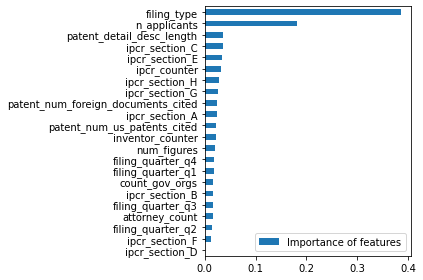

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# plot the importance of features
importance_df.sort_values('Importance of features', ascending = True).plot.barh()
plt.tight_layout()
plt.show()

### 8.5.4. Save Model<a class="anchor" id="Save_Model"></a>

In [ ]:
import joblib

# Save the model as a pickle file
filename = './patent_model.pkl'
joblib.dump(XGBreg, filename)

['./patent_model.pkl']

In [ ]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample


# Get a prediction
pred = model.predict(X_test)

print('The average predicted processing day in train set is {}'.format(np.mean( XGBreg.predict(X_train))))
print('The average actual processing day in train set is {}'.format(np.mean(y_train)))

print('The average predicted processing day in test set is {}'.format(np.mean(pred)))
print('The average actual processing day in test set is {}'.format(np.mean(y_test)))



The average predicted processing day in train set is 1073.7205810546875
The average actual processing day in train set is 1074.9150839111646
The average predicted processing day in test set is 1078.7725830078125
The average actual processing day in test set is 1080.9541800643087
